In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# X후보
### Country.of.Origin, Altitude, Year, PM
# Y후보
### Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean.Cup, Sweetness, #cupperpoint,Total.Cup.Points,Moisture, COD, Quaker, color, CTD,  


In [2]:
#altitude 값이 제각기 정돈 안되어있어 수기로 수정한 버전의 cooffee bean 데이터 csv 파일
data=pd.read_csv("coffeebean__Altitude_changed.csv")
data

Species Country.of.Origin  Altitude Harvest.Year         Grading.Date  \
0     Arabica          Ethiopia    2100.0         2014      April 4th, 2015   
1     Arabica          Ethiopia    2100.0         2014      April 4th, 2015   
2     Arabica         Guatemala    1700.0          NaN       May 31st, 2010   
3     Arabica          Ethiopia     200.0         2014     March 26th, 2015   
4     Arabica          Ethiopia    2100.0         2014      April 4th, 2015   
...       ...               ...       ...          ...                  ...   
1334  Robusta           Ecuador       NaN         2016   January 19th, 2016   
1335  Robusta           Ecuador      40.0         2016   January 19th, 2016   
1336  Robusta     United States     795.0         2014  December 23rd, 2014   
1337  Robusta             India       NaN         2013    August 25th, 2014   
1338  Robusta           Vietnam       NaN         2013    August 25th, 2014   

     Processing.Method  Aroma  Flavor  Aftertaste  Acidity  ...  \
0         Washed / Wet   8.67    8.83        8.67     8.75  ...   
1         Washed / Wet   8.75    8.67        8.50     8.58  ...   
2                  NaN   8.42    8.50        8.42     8.42  ...   
3        Natural / Dry   8.17    8.58        8.42     8.42  ...   
4         Washed / Wet   8.25    8.50        8.25     8.50  ...   
...                ...    ...     ...         ...      ...  ...   
1334               NaN   7.75    7.58        7.33     7.58  ...   
1335               NaN   7.50    7.67        7.75     7.75  ...   
1336     Natural / Dry   7.33    7.33        7.17     7.42  ...   
1337     Natural / Dry   7.42    6.83        6.75     7.17  ...   
1338     Natural / Dry   6.75    6.67        6.50     6.83  ...   

      Total.Cup.Points  Moisture  Category.One.Defects  Quakers       Color  \
0                90.58      0.12                     0      0.0       Green   
1                89.92      0.12                     0      0.0       Green   
2                89.75      0.00                     0      0.0         NaN   
3                89.00      0.11                     0      0.0       Green   
4                88.83      0.12                     0      0.0       Green   
...                ...       ...                   ...      ...         ...   
1334             78.75      0.00                     0      0.0  Blue-Green   
1335             78.08      0.00                     0      0.0  Blue-Green   
1336             77.17      0.00                     0      0.0         NaN   
1337             75.08      0.10                    20      0.0       Green   
1338             73.75      0.12                    63      0.0        None   

      Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
0                        0                    m               1950.0   
1                        1                    m               1950.0   
2                        0                    m               1600.0   
3                        2                    m               1800.0   
4                        2                    m               1950.0   
...                    ...                  ...                  ...   
1334                     1                    m                  NaN   
1335                     0                    m                 40.0   
1336                     6                    m                795.0   
1337                     1                    m                  NaN   
1338                     9                    m                  NaN   

      altitude_high_meters  altitude_mean_meters  
0                   2200.0                2075.0  
1                   2200.0                2075.0  
2                   1800.0                1700.0  
3                   2200.0                2000.0  
4                   2200.0                2075.0  
...                    ...                   ...  
1334                   NaN                   NaN  
1335                  40.0    

In [3]:
index_ft=data[data.unit_of_measurement=='ft'].index

In [4]:
#Altitude는 수기 수정 과정에서 각나라의 해석 불가한 단위로 되어있는 경우가 많았기 때문에 데이터 신뢰성 보장X. altitude_ooo_meters변수를
#사용하기로 결정. 
#ft단위로 측정된 altitude측정값들 meter단위로 번경


data.iloc[index_ft,23]=data.iloc[index_ft,23]*0.3048
data.iloc[index_ft,24]=data.iloc[index_ft,24]*0.3048
data.iloc[index_ft,25]=data.iloc[index_ft,25]*0.3048

In [5]:
#논리적으로 말안되는 고도 행 삭제
data.drop(data[data.altitude_low_meters>4000].index,axis=0,inplace=True)

In [6]:
#결측치 확인
data.isna().sum()

Species                   0
Country.of.Origin         1
Altitude                239
Harvest.Year             47
Grading.Date              0
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   218
Category.Two.Defects      0
unit_of_measurement       0
altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1338
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1333 non-null   object 
 1   Country.of.Origin     1332 non-null   object 
 2   Altitude              1094 non-null   float64
 3   Harvest.Year          1286 non-null   object 
 4   Grading.Date          1333 non-null   object 
 5   Processing.Method     1163 non-null   object 
 6   Aroma                 1333 non-null   float64
 7   Flavor                1333 non-null   float64
 8   Aftertaste            1333 non-null   float64
 9   Acidity               1333 non-null   float64
 10  Body                  1333 non-null   float64
 11  Balance               1333 non-null   float64
 12  Uniformity            1333 non-null   float64
 13  Clean.Cup             1333 non-null   float64
 14  Sweetness             1333 non-null   float64
 15  Cupper.Points        

In [8]:
data[np.isnan(data.Quakers)]

Species Country.of.Origin  Altitude Harvest.Year    Grading.Date  \
366  Arabica          Colombia       NaN         2013  May 24th, 2013   

    Processing.Method  Aroma  Flavor  Aftertaste  Acidity  ...  \
366      Washed / Wet   7.58    7.67        7.58     7.75  ...   

     Total.Cup.Points  Moisture  Category.One.Defects  Quakers  Color  \
366              83.5      0.11                     0      NaN  Green   

     Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
366                     2                    m               1750.0   

     altitude_high_meters  altitude_mean_meters  
366                1750.0                1750.0  

[1 rows x 26 columns]

In [9]:
#나라 이름 결측은 대체할수 없다고 판단, 행 삭제
index_del_coo=data[data['Country.of.Origin'].isnull()].index
data.drop(index_del_coo,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin  Altitude Harvest.Year         Grading.Date  \
0     Arabica          Ethiopia    2100.0         2014      April 4th, 2015   
1     Arabica          Ethiopia    2100.0         2014      April 4th, 2015   
2     Arabica         Guatemala    1700.0          NaN       May 31st, 2010   
3     Arabica          Ethiopia     200.0         2014     March 26th, 2015   
4     Arabica          Ethiopia    2100.0         2014      April 4th, 2015   
...       ...               ...       ...          ...                  ...   
1327  Robusta           Ecuador       NaN         2016   January 19th, 2016   
1328  Robusta           Ecuador      40.0         2016   January 19th, 2016   
1329  Robusta     United States     795.0         2014  December 23rd, 2014   
1330  Robusta             India       NaN         2013    August 25th, 2014   
1331  Robusta           Vietnam       NaN         2013    August 25th, 2014   

     Processing.Method  Aroma  Flavor  Aftertaste  Acidity  ...  \
0         Washed / Wet   8.67    8.83        8.67     8.75  ...   
1         Washed / Wet   8.75    8.67        8.50     8.58  ...   
2                  NaN   8.42    8.50        8.42     8.42  ...   
3        Natural / Dry   8.17    8.58        8.42     8.42  ...   
4         Washed / Wet   8.25    8.50        8.25     8.50  ...   
...                ...    ...     ...         ...      ...  ...   
1327               NaN   7.75    7.58        7.33     7.58  ...   
1328               NaN   7.50    7.67        7.75     7.75  ...   
1329     Natural / Dry   7.33    7.33        7.17     7.42  ...   
1330     Natural / Dry   7.42    6.83        6.75     7.17  ...   
1331     Natural / Dry   6.75    6.67        6.50     6.83  ...   

      Total.Cup.Points  Moisture  Category.One.Defects  Quakers       Color  \
0                90.58      0.12                     0      0.0       Green   
1                89.92      0.12                     0      0.0       Green   
2                89.75      0.00                     0      0.0         NaN   
3                89.00      0.11                     0      0.0       Green   
4                88.83      0.12                     0      0.0       Green   
...                ...       ...                   ...      ...         ...   
1327             78.75      0.00                     0      0.0  Blue-Green   
1328             78.08      0.00                     0      0.0  Blue-Green   
1329             77.17      0.00                     0      0.0         NaN   
1330             75.08      0.10                    20      0.0       Green   
1331             73.75      0.12                    63      0.0        None   

      Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
0                        0                    m               1950.0   
1                        1                    m               1950.0   
2                        0                    m               1600.0   
3                        2                    m               1800.0   
4                        2                    m               1950.0   
...                    ...                  ...                  ...   
1327                     1                    m                  NaN   
1328                     0                    m                 40.0   
1329                     6                    m                795.0   
1330                     1                    m                  NaN   
1331                     9                    m                  NaN   

      altitude_high_meters  altitude_mean_meters  
0                   2200.0                2075.0  
1                   2200.0                2075.0  
2                   1800.0                1700.0  
3                   2200.0                2000.0  
4                   2200.0                2075.0  
...                    ...                   ...  
1327                   NaN                   NaN  
1328                  40.0    

### 생산고도 결측치 처리에 관한 탐색
https://www.stokedroasters.com/blogs/news/coffee-guide-altitudes-affect-on-beans
생산고도가 높을수록 산도가 올라가며(above 1300m), 과일(베리)향이 첨가되는 효과가 있기도 하다
-> Acidity와 Altutude의 상관성 있다면 결측치 처리 가능할 것으로 예상됨

In [10]:
data[['altitude_mean_meters','Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance']].corr()

altitude_mean_meters     Aroma    Flavor  Aftertaste  \
altitude_mean_meters              1.000000  0.116263  0.124138    0.148326   
Aroma                             0.116263  1.000000  0.813444    0.777115   
Flavor                            0.124138  0.813444  1.000000    0.895476   
Aftertaste                        0.148326  0.777115  0.895476    1.000000   
Acidity                           0.099912  0.724209  0.816210    0.791895   
Body                              0.123146  0.675418  0.736986    0.736237   
Balance                           0.120764  0.710397  0.793550    0.811412   

                       Acidity      Body   Balance  
altitude_mean_meters  0.099912  0.123146  0.120764  
Aroma                 0.724209  0.675418  0.710397  
Flavor                0.816210  0.736986  0.793550  
Aftertaste            0.791895  0.736237  0.811412  
Acidity               1.000000  0.707286  0.733962  
Body                  0.707286  1.000000  0.757465  
Balance               0.733962  0.757465  1.000000

In [11]:
#단순한 접근으로는 amm처리 불가능 하다고 판단

In [12]:
#Altitude 변수 삭제
data.drop(['Altitude'],axis=1,inplace=True)

In [13]:
data

Species Country.of.Origin Harvest.Year         Grading.Date  \
0     Arabica          Ethiopia         2014      April 4th, 2015   
1     Arabica          Ethiopia         2014      April 4th, 2015   
2     Arabica         Guatemala          NaN       May 31st, 2010   
3     Arabica          Ethiopia         2014     March 26th, 2015   
4     Arabica          Ethiopia         2014      April 4th, 2015   
...       ...               ...          ...                  ...   
1327  Robusta           Ecuador         2016   January 19th, 2016   
1328  Robusta           Ecuador         2016   January 19th, 2016   
1329  Robusta     United States         2014  December 23rd, 2014   
1330  Robusta             India         2013    August 25th, 2014   
1331  Robusta           Vietnam         2013    August 25th, 2014   

     Processing.Method  Aroma  Flavor  Aftertaste  Acidity  Body  ...  \
0         Washed / Wet   8.67    8.83        8.67     8.75  8.50  ...   
1         Washed / Wet   8.75    8.67        8.50     8.58  8.42  ...   
2                  NaN   8.42    8.50        8.42     8.42  8.33  ...   
3        Natural / Dry   8.17    8.58        8.42     8.42  8.50  ...   
4         Washed / Wet   8.25    8.50        8.25     8.50  8.42  ...   
...                ...    ...     ...         ...      ...   ...  ...   
1327               NaN   7.75    7.58        7.33     7.58  5.08  ...   
1328               NaN   7.50    7.67        7.75     7.75  5.17  ...   
1329     Natural / Dry   7.33    7.33        7.17     7.42  7.50  ...   
1330     Natural / Dry   7.42    6.83        6.75     7.17  7.25  ...   
1331     Natural / Dry   6.75    6.67        6.50     6.83  6.92  ...   

      Total.Cup.Points  Moisture  Category.One.Defects  Quakers       Color  \
0                90.58      0.12                     0      0.0       Green   
1                89.92      0.12                     0      0.0       Green   
2                89.75      0.00                     0      0.0         NaN   
3                89.00      0.11                     0      0.0       Green   
4                88.83      0.12                     0      0.0       Green   
...                ...       ...                   ...      ...         ...   
1327             78.75      0.00                     0      0.0  Blue-Green   
1328             78.08      0.00                     0      0.0  Blue-Green   
1329             77.17      0.00                     0      0.0         NaN   
1330             75.08      0.10                    20      0.0       Green   
1331             73.75      0.12                    63      0.0        None   

      Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
0                        0                    m               1950.0   
1                        1                    m               1950.0   
2                        0                    m               1600.0   
3                        2                    m               1800.0   
4                        2                    m               1950.0   
...                    ...                  ...                  ...   
1327                     1                    m                  NaN   
1328                     0                    m                 40.0   
1329                     6                    m                795.0   
1330                     1                    m                  NaN   
1331                     9                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
0                   2200.0               2075.0  
1                   2200.0               2075.0  
2                   1800.0               1700.0  
3                   2200.0               2000.0  
4                   2200.0               2075.0  
...                    ...                  ...  
1327                   NaN                  NaN  
1328                  40.0                 40.0  
1329                 795.0          

### processing 관련 웹사이트
https://www.baristainstitute.com/blog/jori-korhonen/january-2020/coffee-processing-methods-drying-washing-or-honey

In [14]:
#PM값 경향 탐색위해 data 복사 data1생성
data1=data.copy()

In [15]:
data1['Processing.Method'].fillna('NA',inplace=True)

[Text(0, 0, 'Ethiopia'),
 Text(1, 0, 'Guatemala'),
 Text(2, 0, 'Brazil'),
 Text(3, 0, 'Peru'),
 Text(4, 0, 'United States'),
 Text(5, 0, 'United States (Hawaii)'),
 Text(6, 0, 'Indonesia'),
 Text(7, 0, 'China'),
 Text(8, 0, 'Costa Rica'),
 Text(9, 0, 'Mexico'),
 Text(10, 0, 'Uganda'),
 Text(11, 0, 'Honduras'),
 Text(12, 0, 'Taiwan'),
 Text(13, 0, 'Nicaragua'),
 Text(14, 0, 'Tanzania, United Republic Of'),
 Text(15, 0, 'Kenya'),
 Text(16, 0, 'Thailand'),
 Text(17, 0, 'Colombia'),
 Text(18, 0, 'Panama'),
 Text(19, 0, 'Papua New Guinea'),
 Text(20, 0, 'El Salvador'),
 Text(21, 0, 'Japan'),
 Text(22, 0, 'Ecuador'),
 Text(23, 0, 'United States (Puerto Rico)'),
 Text(24, 0, 'Haiti'),
 Text(25, 0, 'Burundi'),
 Text(26, 0, 'Vietnam'),
 Text(27, 0, 'Philippines'),
 Text(28, 0, 'Rwanda'),
 Text(29, 0, 'Malawi'),
 Text(30, 0, 'Laos'),
 Text(31, 0, 'Zambia'),
 Text(32, 0, 'Myanmar'),
 Text(33, 0, 'Mauritius'),
 Text(34, 0, 'Cote d?Ivoire'),
 Text(35, 0, 'India')]

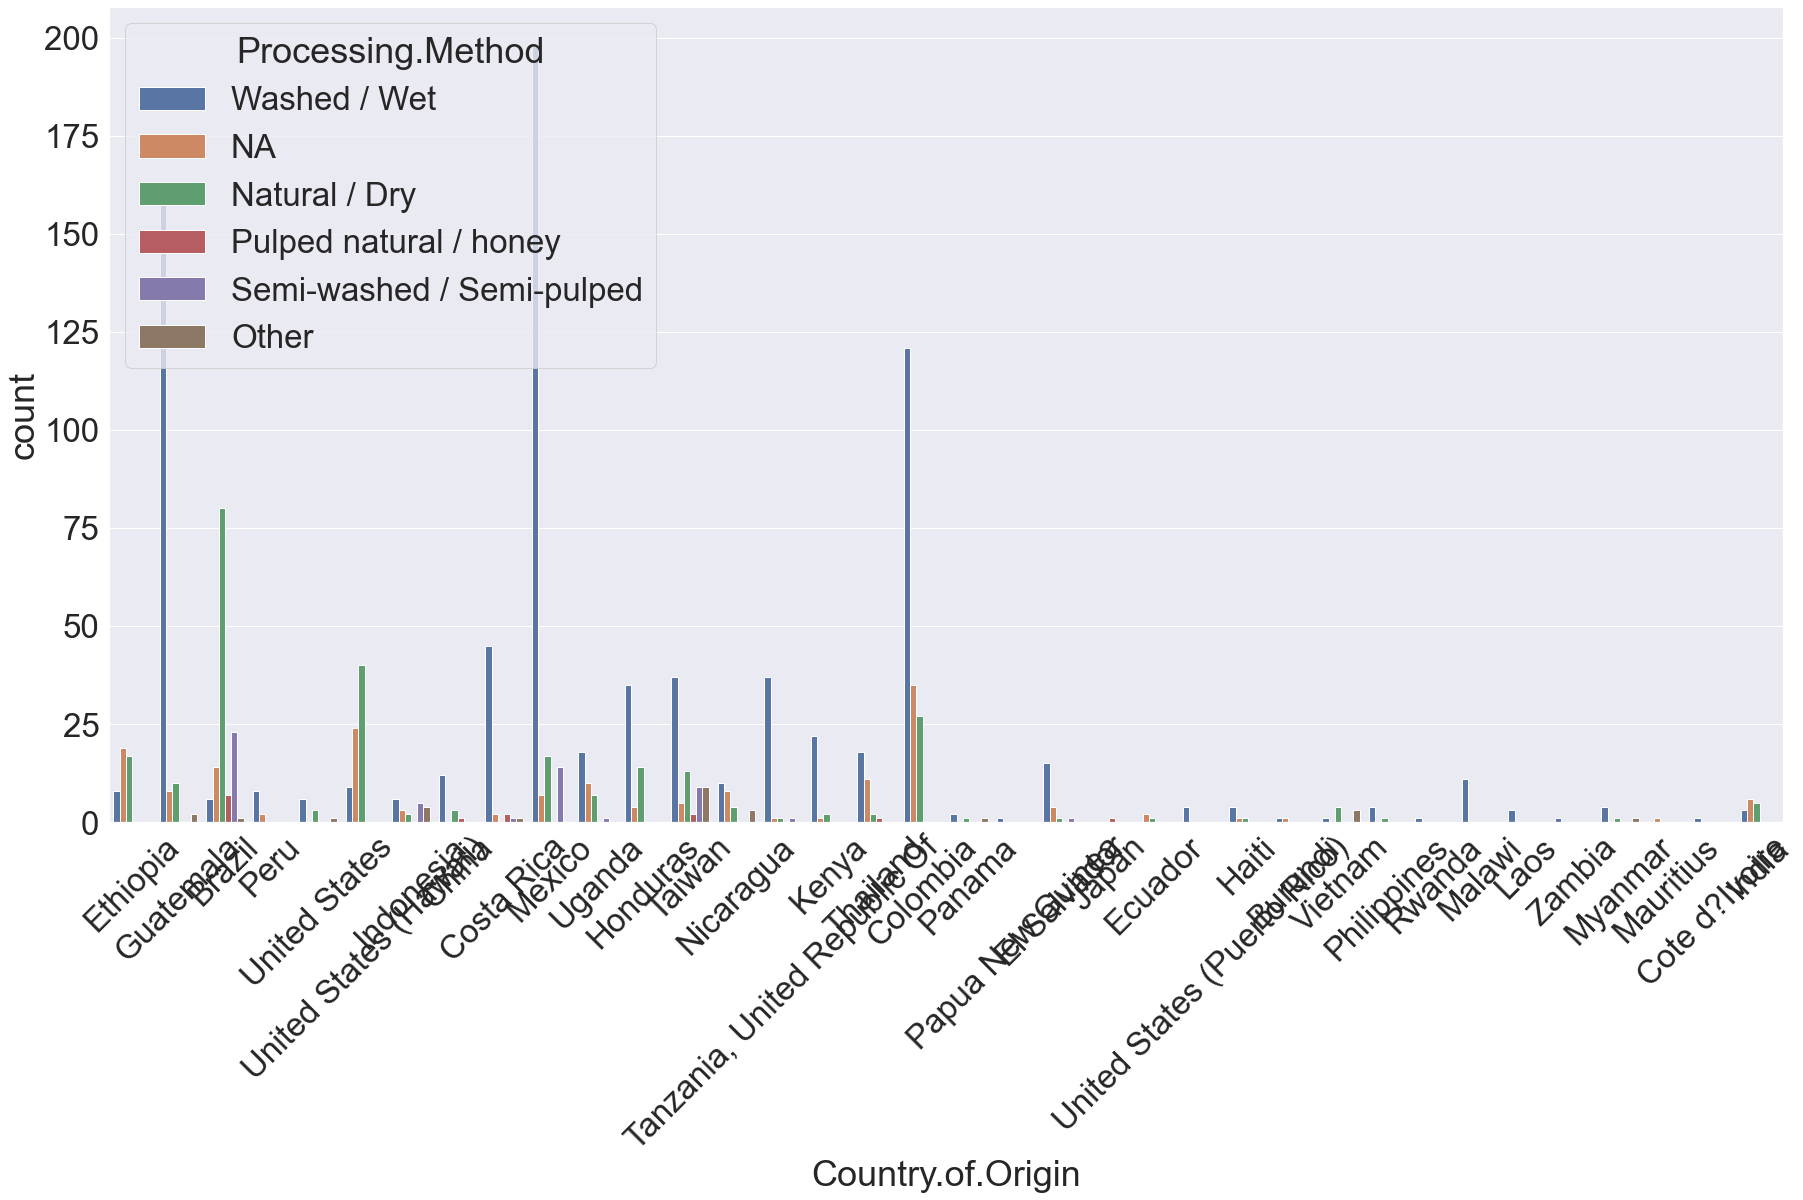

In [16]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

[Text(0, 0, 'Ethiopia')]

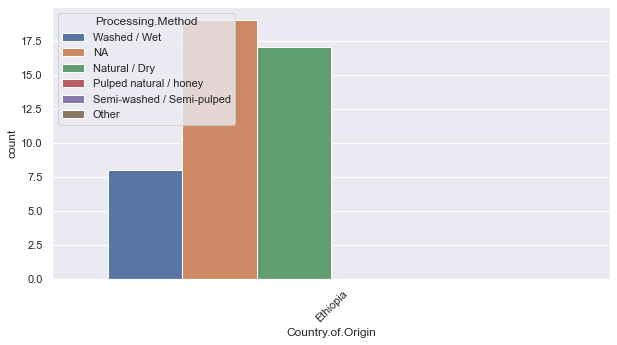

In [17]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Ethiopia']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

[Text(0, 0, 'Washed / Wet'), Text(1, 0, 'Natural / Dry'), Text(2, 0, 'NA')]

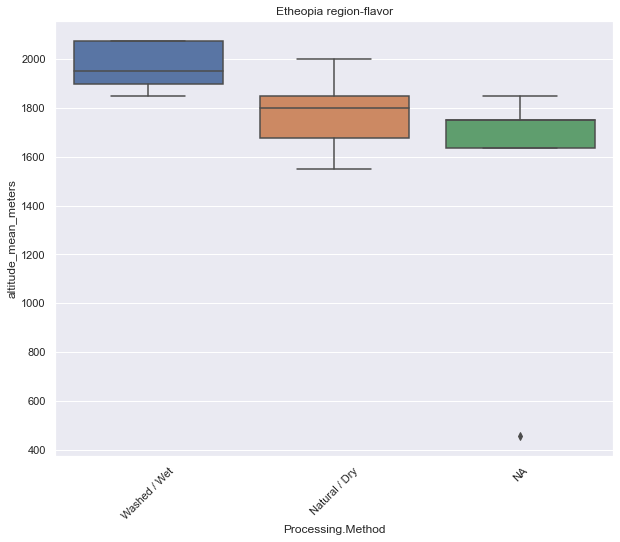

In [18]:
plt.figure(figsize=(10,8))
plt.title('Etheopia region-flavor')
sns.set(font_scale=1)
ax=sns.boxplot(y=data1[data1['Country.of.Origin']=='Ethiopia'].altitude_mean_meters,x=data1[data1['Country.of.Origin']=='Ethiopia']['Processing.Method'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [19]:
#에티오피아 PM 경향 사전조사: 
#https://www.researchgate.net/publication/228470404_Primary_coffee_processing_in_Ethiopia_patterns_constrains_and_determinants
#에티오피아 PM결측치는 국가경향, amm경향으로 전부 ND 대체 결정
#data.loc[data['Processing.Method'] != data['Processing.Method'], 'Processing.Method'] = 'Natural / Dry'
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Ethiopia') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Natural / Dry'

In [20]:
data1[data1['Country.of.Origin']=='Ethiopia'].isnull().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             1
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                   26
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters     14
altitude_high_meters    14
altitude_mean_meters    14
dtype: int64

[Text(0, 0, 'Guatemala')]

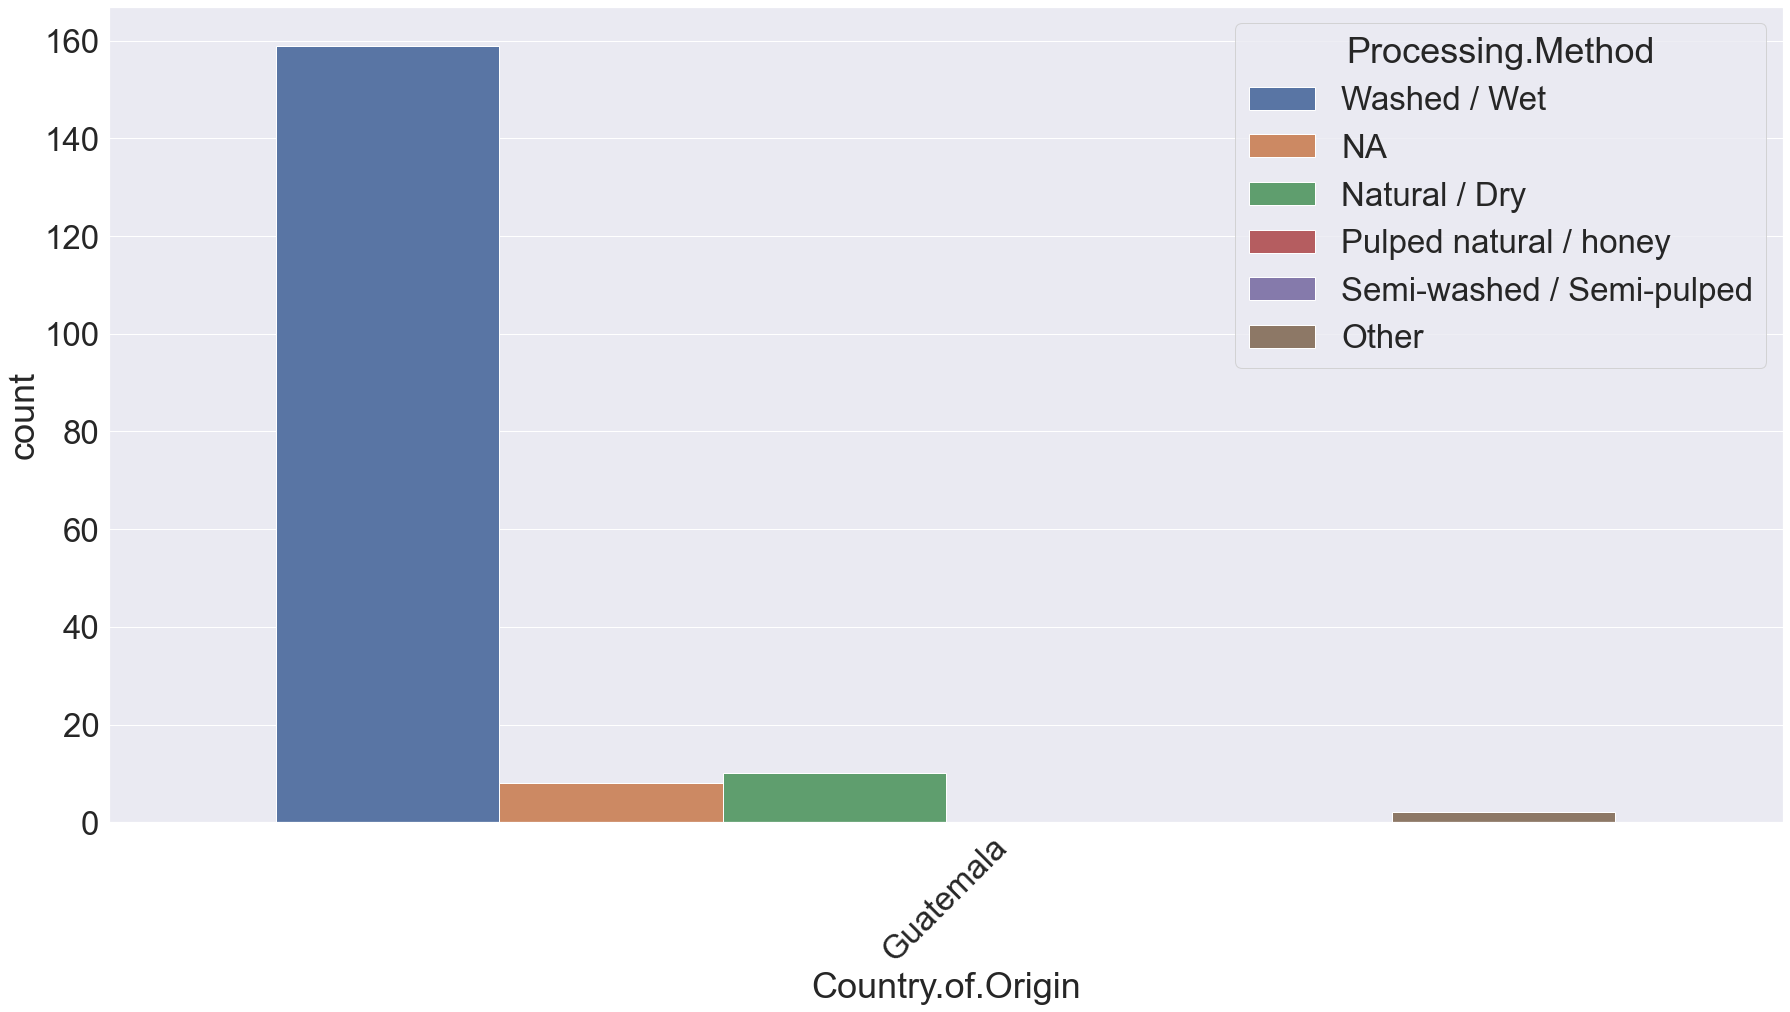

In [21]:
#과테말라 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Guatemala']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [22]:
#과테말라 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Guatemala') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Guatemala'].isna().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             4
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                   11
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters     25
altitude_high_meters    25
altitude_mean_meters    25
dtype: int64

[Text(0, 0, 'Brazil')]

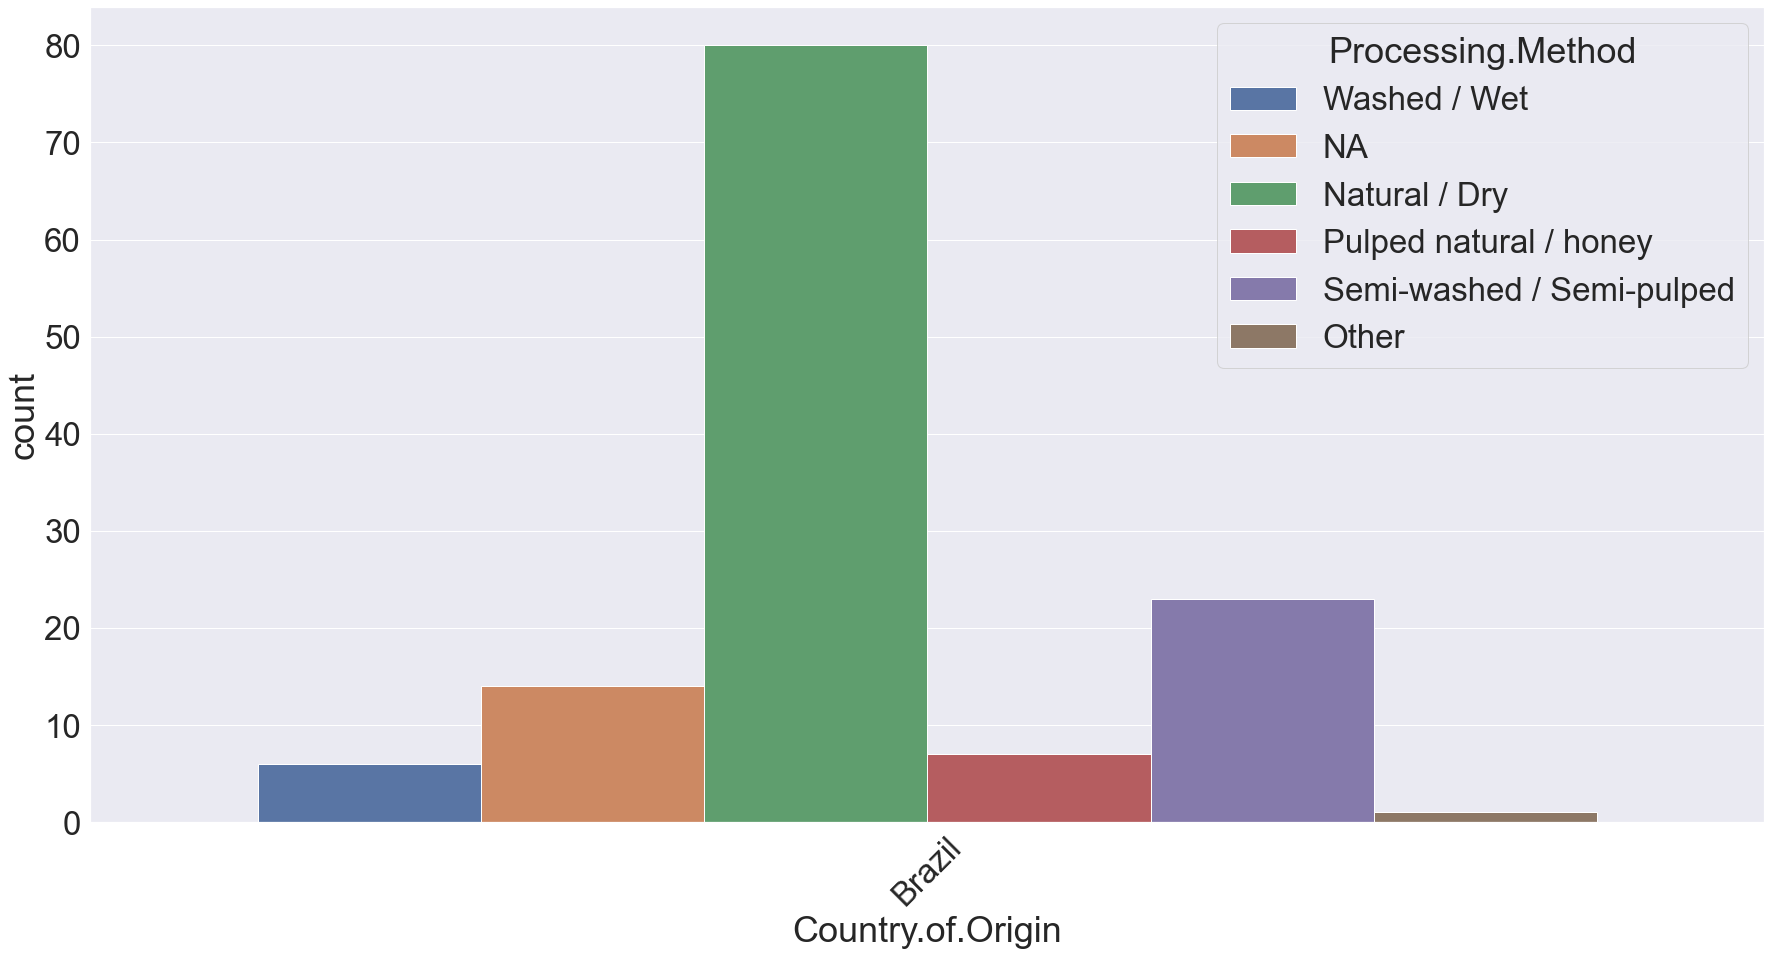

In [23]:
#브라질 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Brazil']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [24]:
#브라질 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Brazil') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Natural / Dry'

data[data['Country.of.Origin']=='Brazil'].isna().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             3
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                   12
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters     27
altitude_high_meters    27
altitude_mean_meters    27
dtype: int64

[Text(0, 0, 'Peru')]

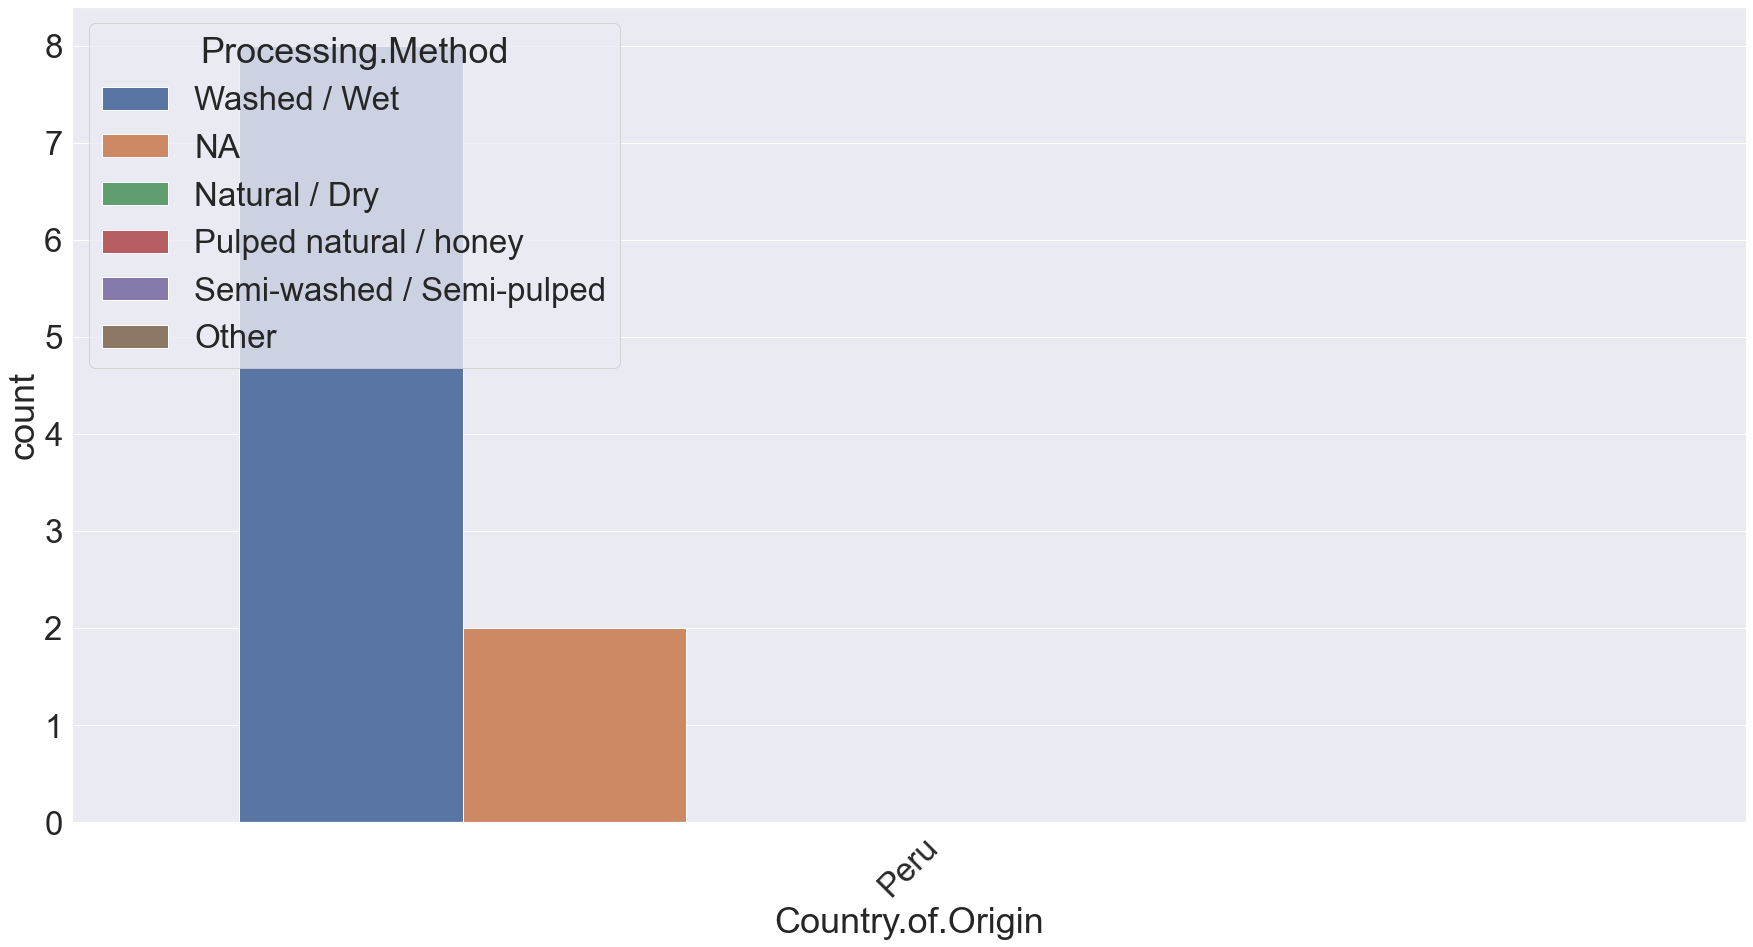

In [25]:
#페루 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Peru']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [26]:
#페루 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Peru') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Peru'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            1
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   2
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     8
altitude_high_meters    8
altitude_mean_meters    8
dtype: int64

[Text(0, 0, 'United States (Hawaii)')]

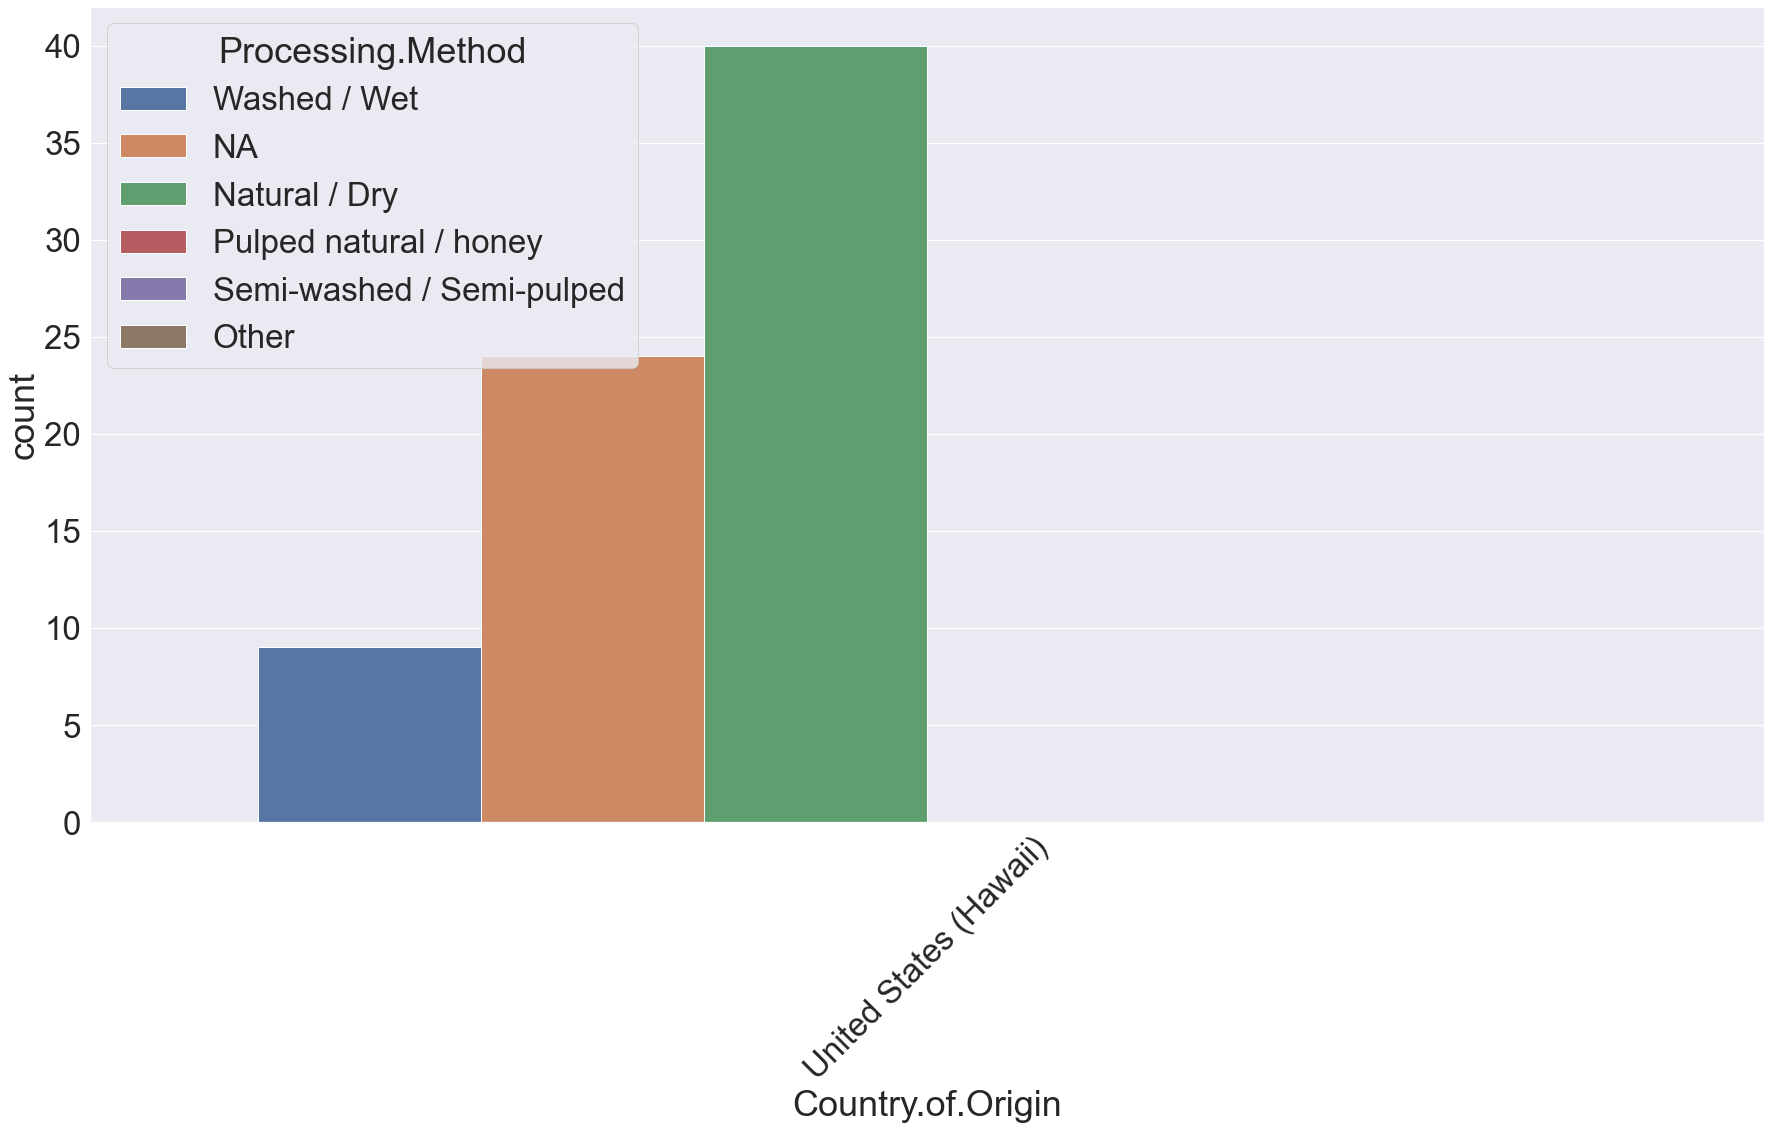

In [27]:
#하와이 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='United States (Hawaii)']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [28]:
#하와이 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='United States (Hawaii)') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Natural / Dry'

data[data['Country.of.Origin']=='United States (Hawaii)'].isna().sum()

Species                  0
Country.of.Origin        0
Harvest.Year            19
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                   30
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters     71
altitude_high_meters    71
altitude_mean_meters    71
dtype: int64

[Text(0, 0, 'Indonesia')]

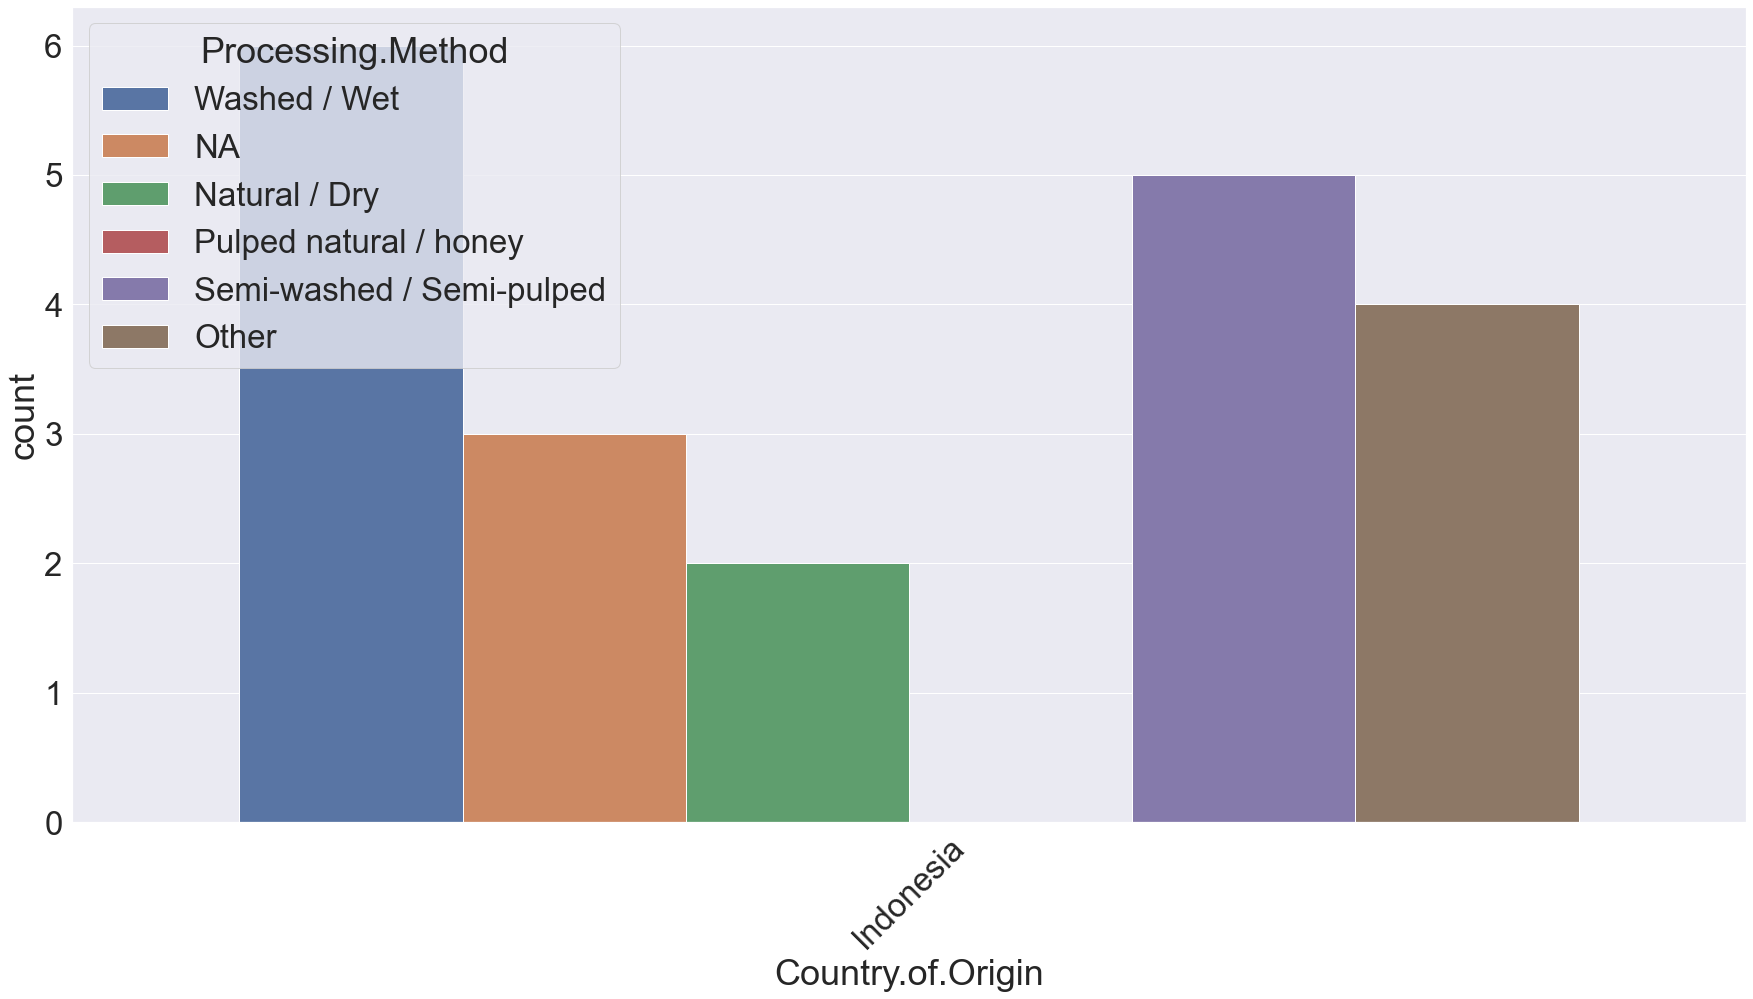

In [29]:
#인도네시아 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Indonesia']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [30]:
#인도네시아 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Indonesia') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Indonesia'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   5
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     2
altitude_high_meters    2
altitude_mean_meters    2
dtype: int64

[Text(0, 0, 'Costa Rica')]

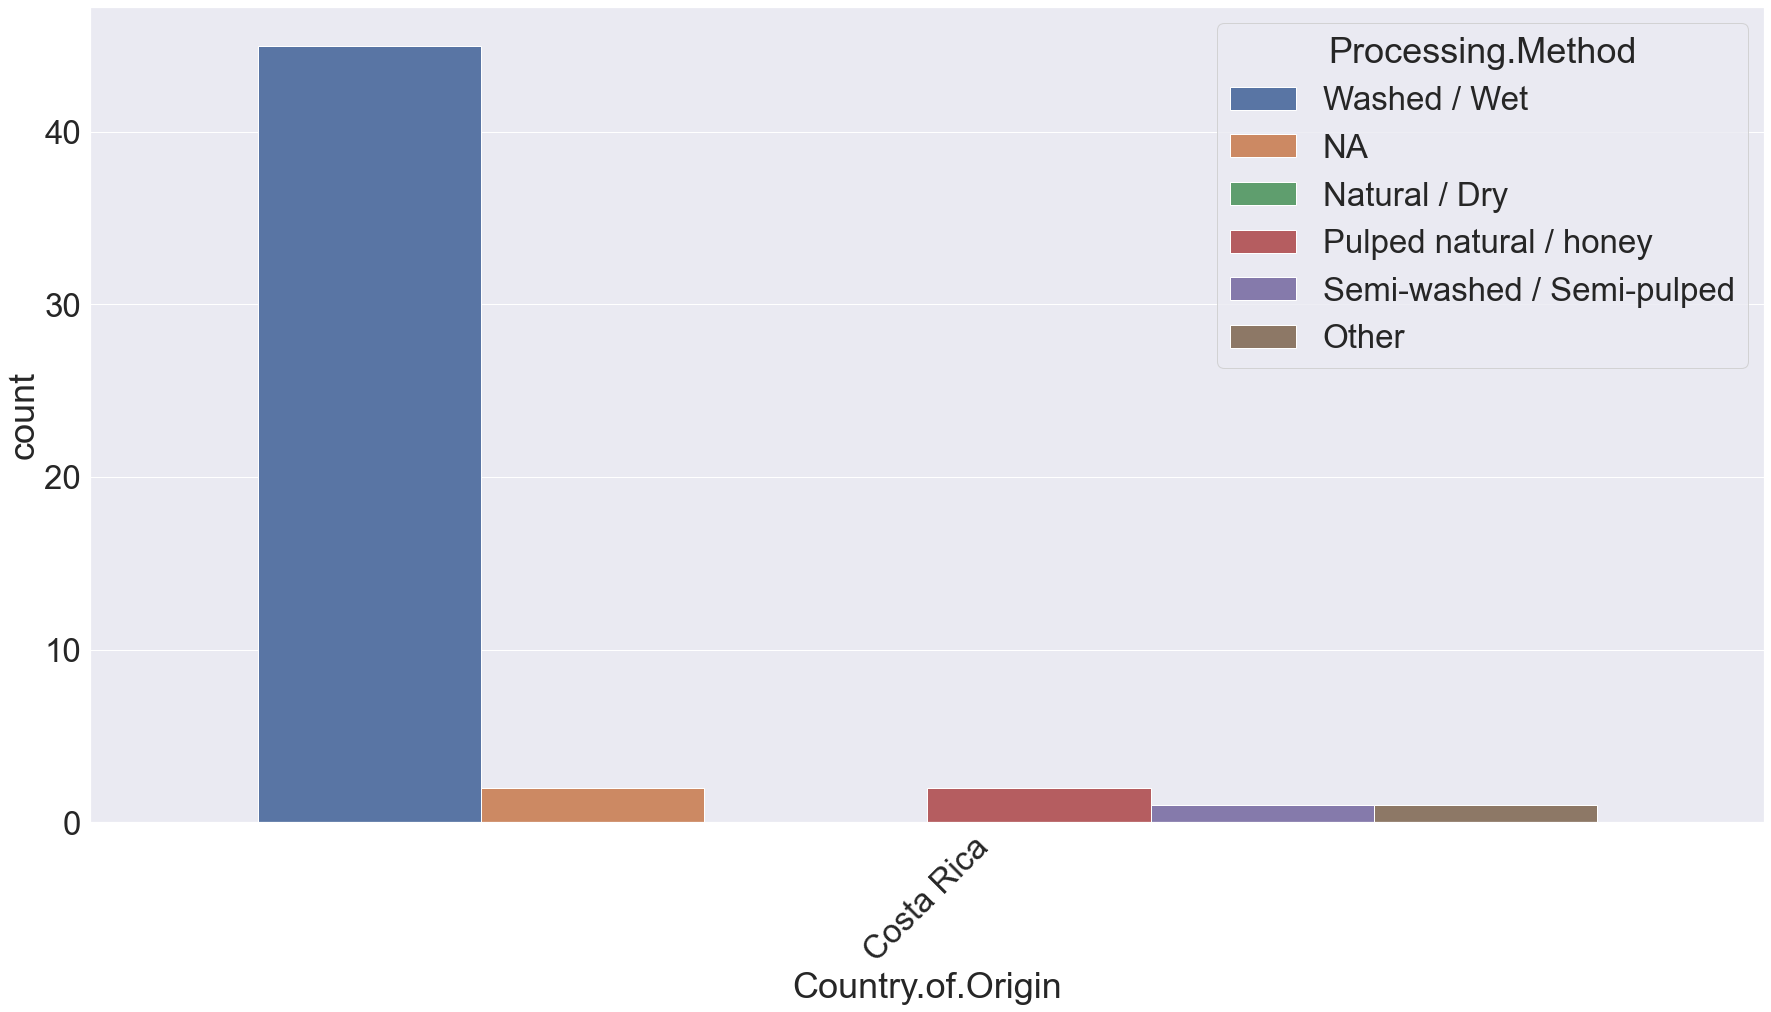

In [31]:
#코스타키라 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Costa Rica']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [32]:
#코스타리카 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Costa Rica') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Costa Rica'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            2
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   2
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     5
altitude_high_meters    5
altitude_mean_meters    5
dtype: int64

[Text(0, 0, 'Mexico')]

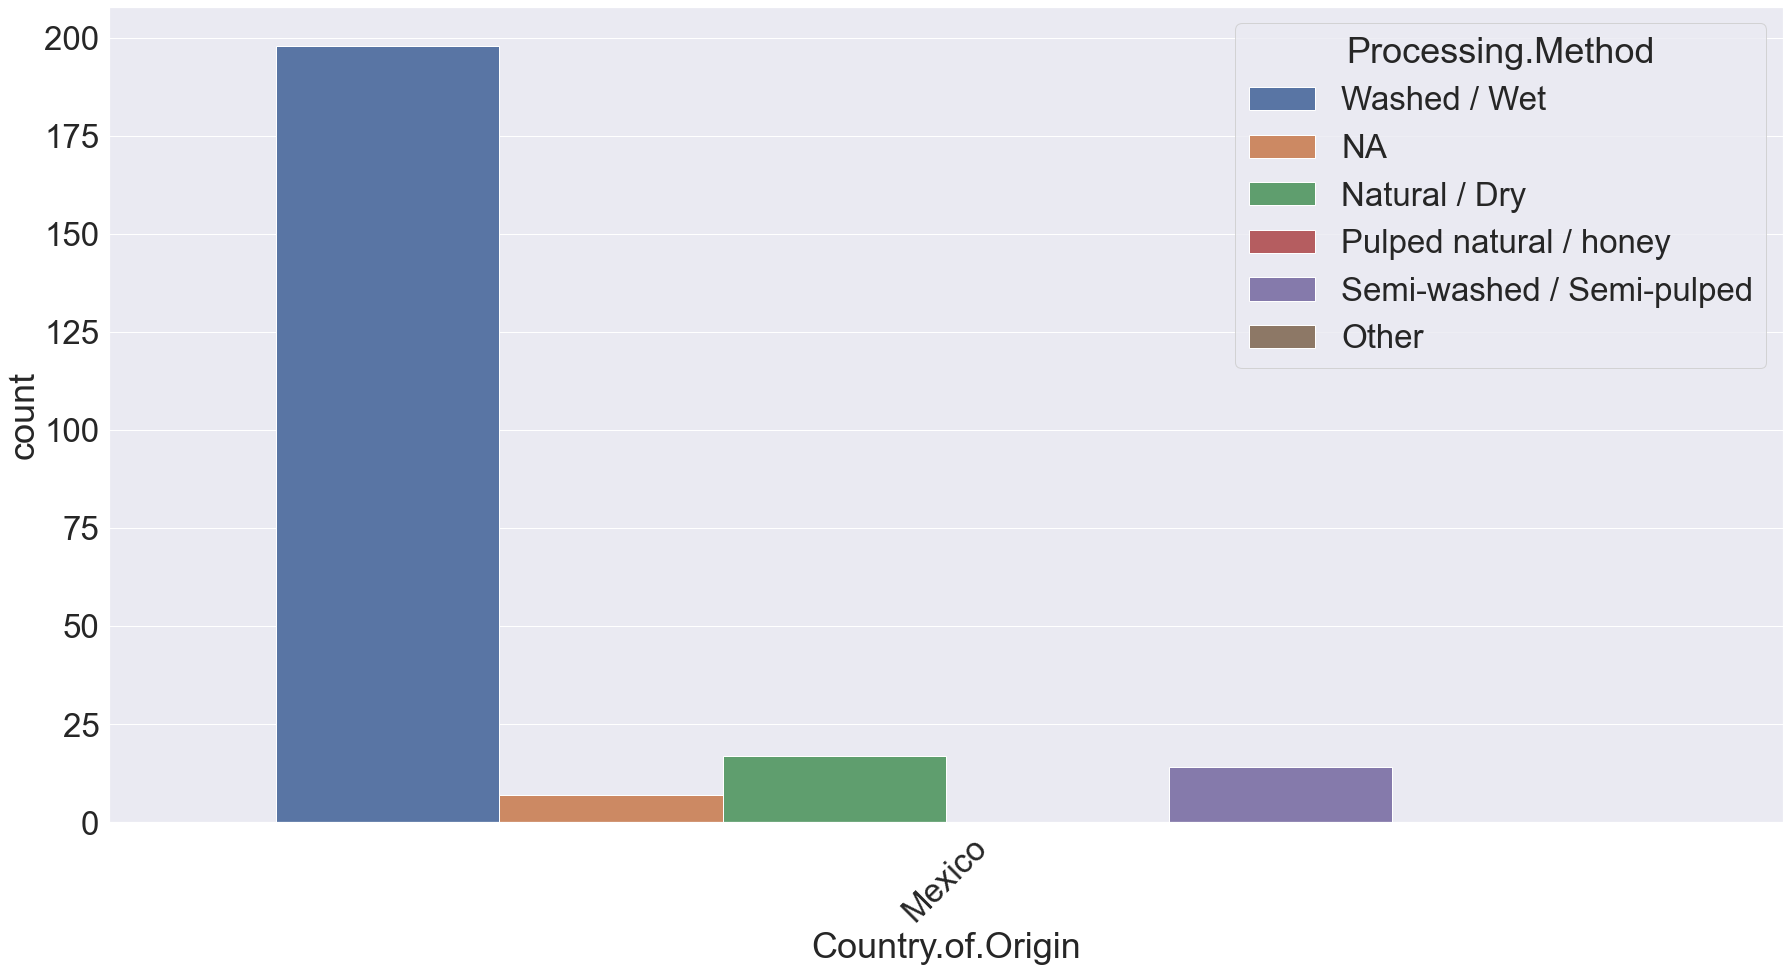

In [33]:
#멕시코 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Mexico']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [34]:
#멕시코 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Mexico') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Mexico'].isna().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             0
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                   32
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters      4
altitude_high_meters     4
altitude_mean_meters     4
dtype: int64

[Text(0, 0, 'Uganda')]

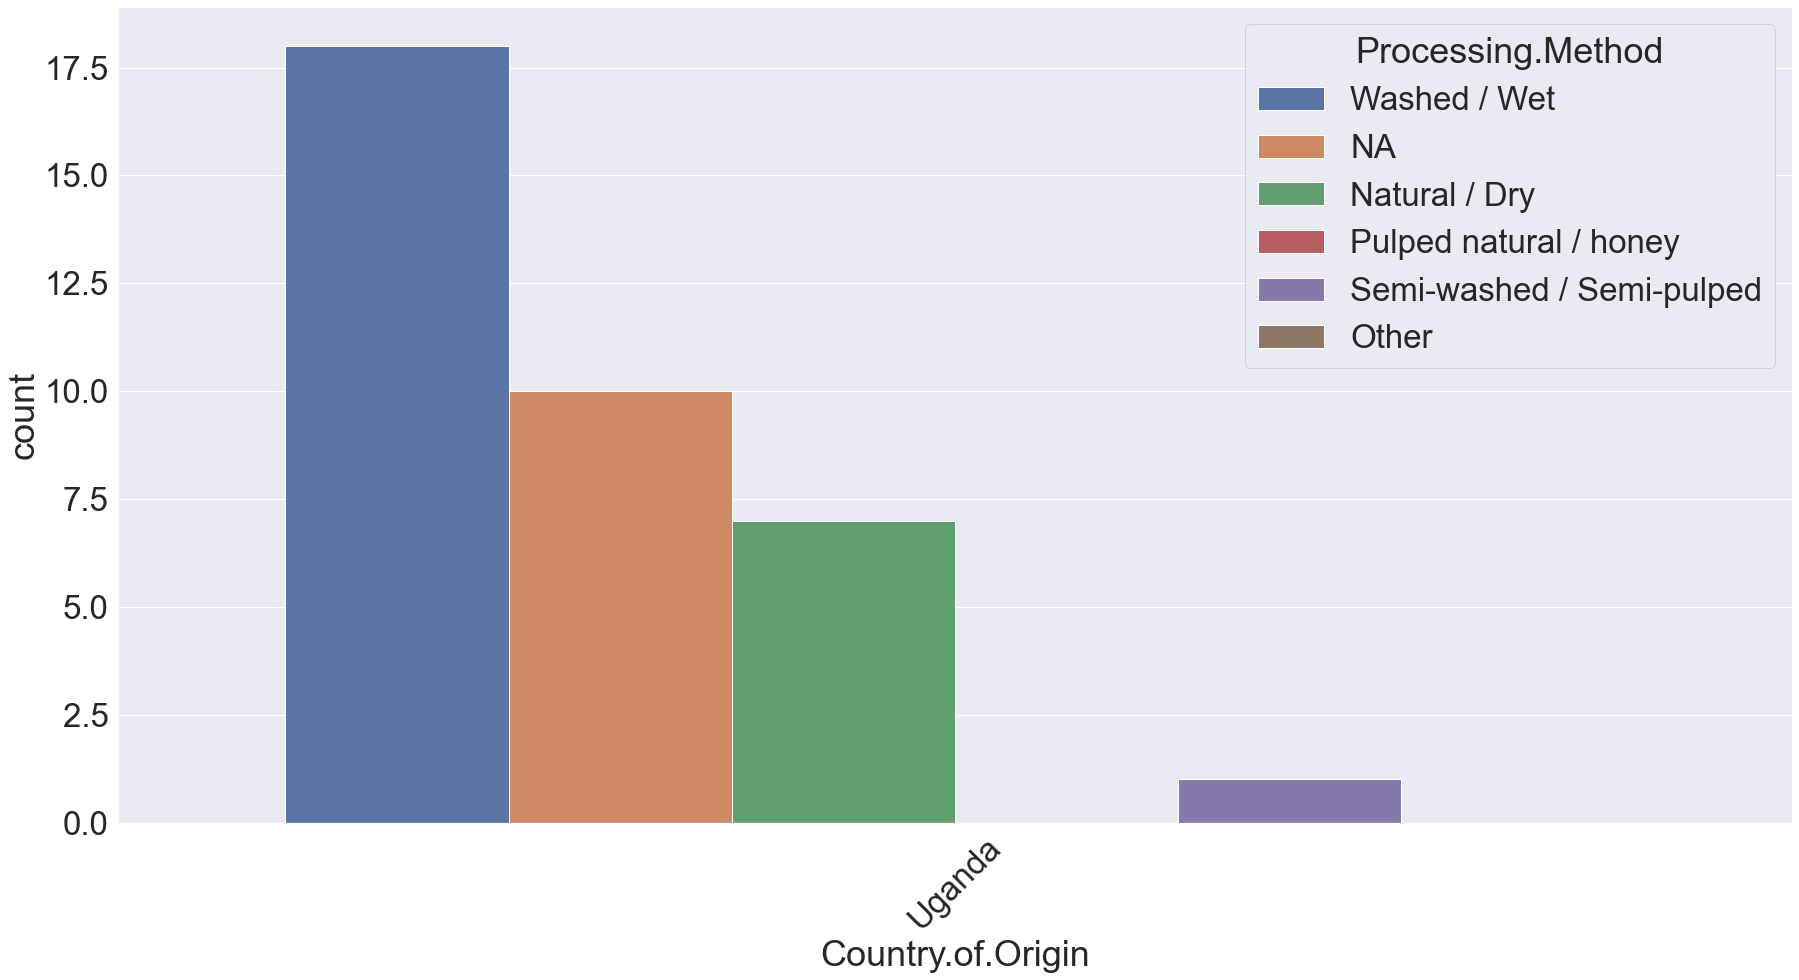

In [35]:
#우간다 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Uganda']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [36]:
#우간다 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Uganda') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Uganda'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   1
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     2
altitude_high_meters    2
altitude_mean_meters    2
dtype: int64

[Text(0, 0, 'Honduras')]

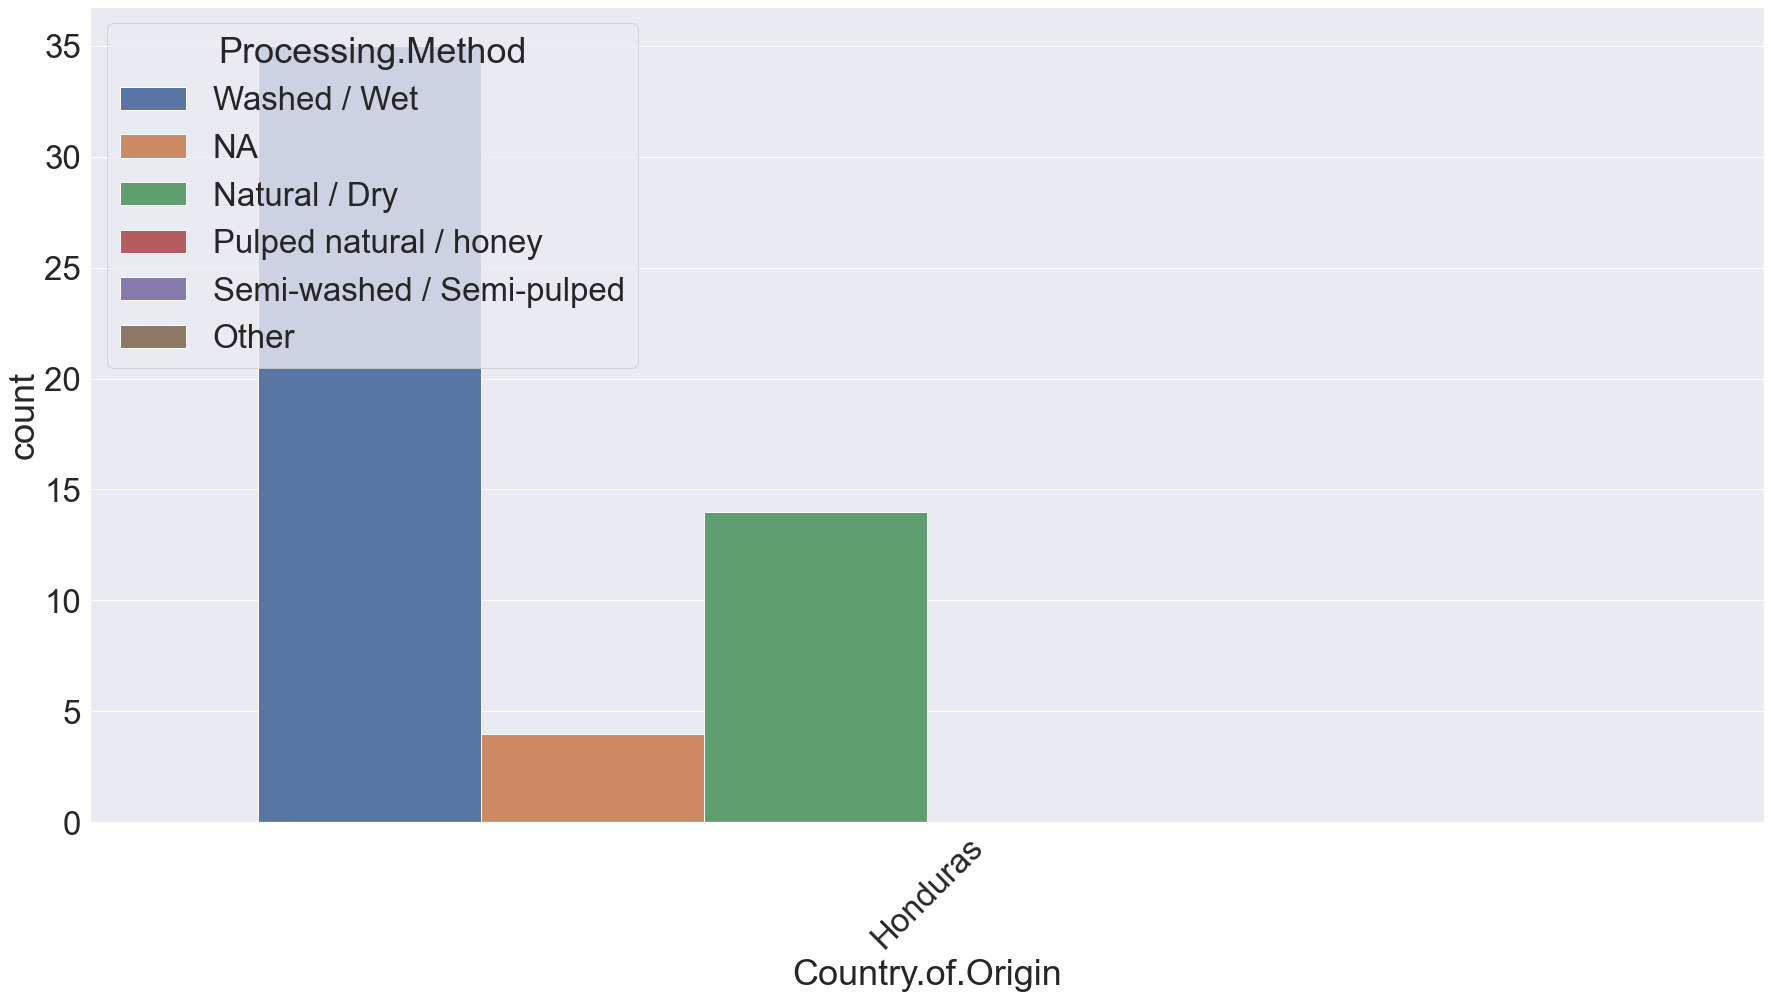

In [37]:
#온두라스 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Honduras']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [38]:
#온두라스 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Honduras') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Honduras'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   0
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     2
altitude_high_meters    2
altitude_mean_meters    2
dtype: int64

[Text(0, 0, 'Taiwan')]

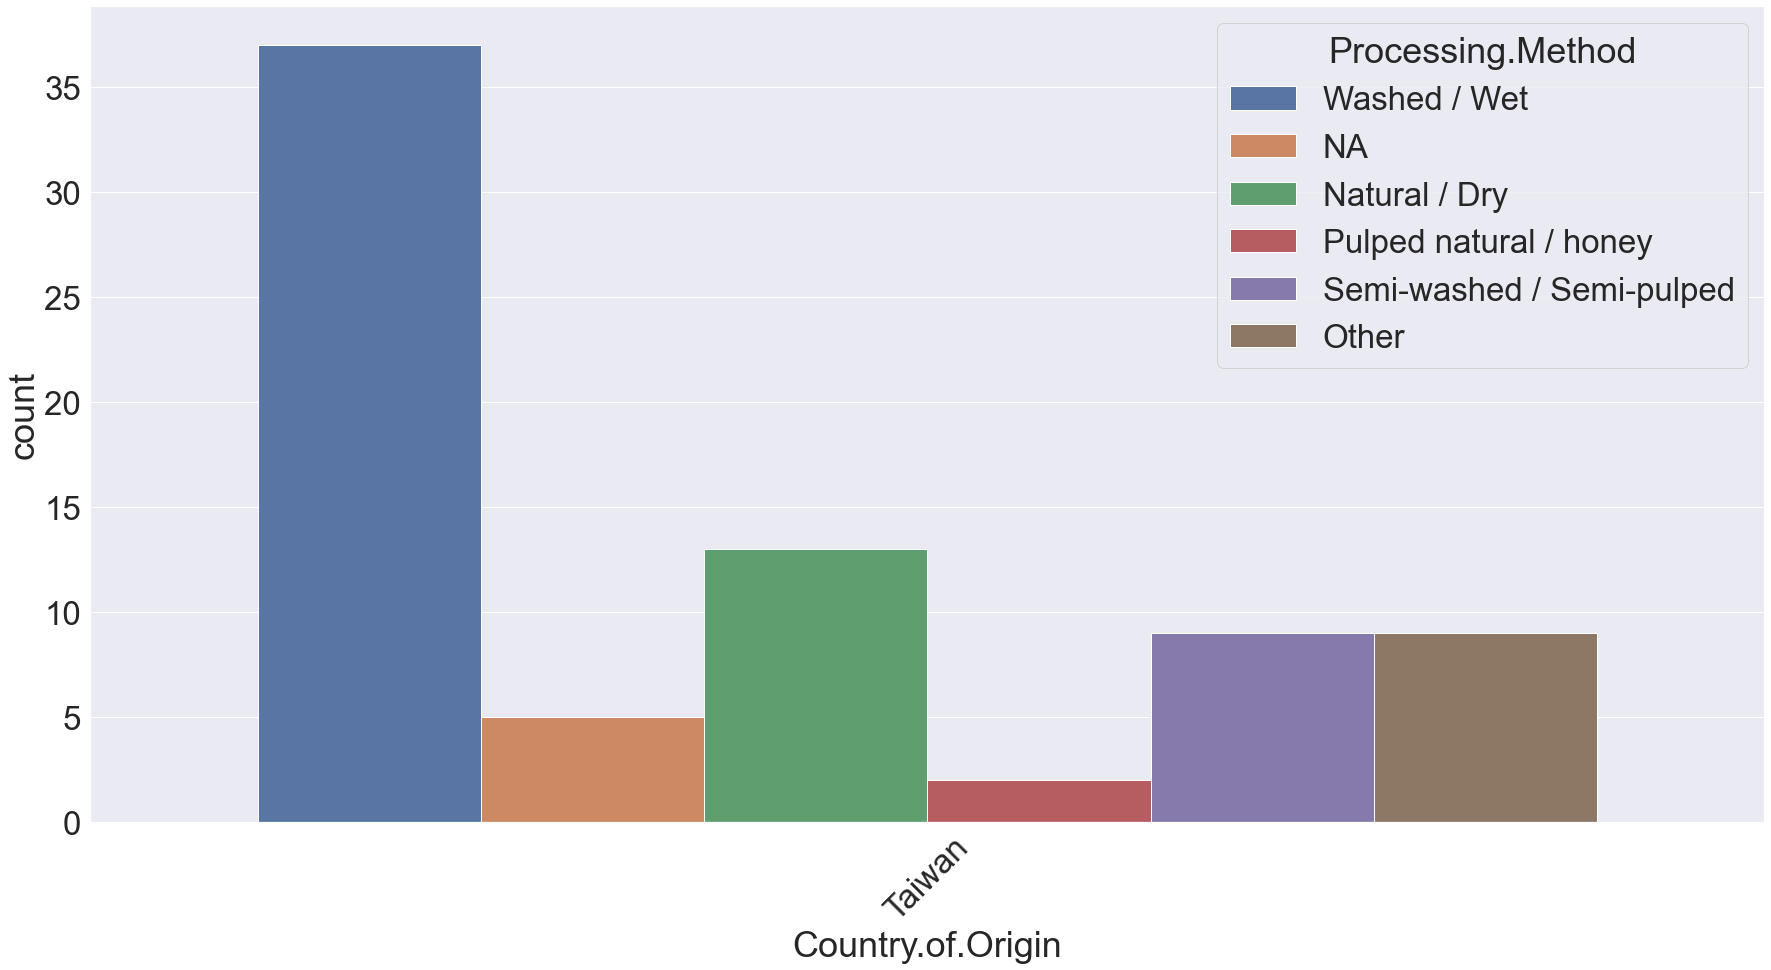

In [39]:
#대만 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Taiwan']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [40]:
#타이완 PM결측치는 국가경향, 전부 ND 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Taiwan') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Taiwan'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   6
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     5
altitude_high_meters    5
altitude_mean_meters    5
dtype: int64

[Text(0, 0, 'Nicaragua')]

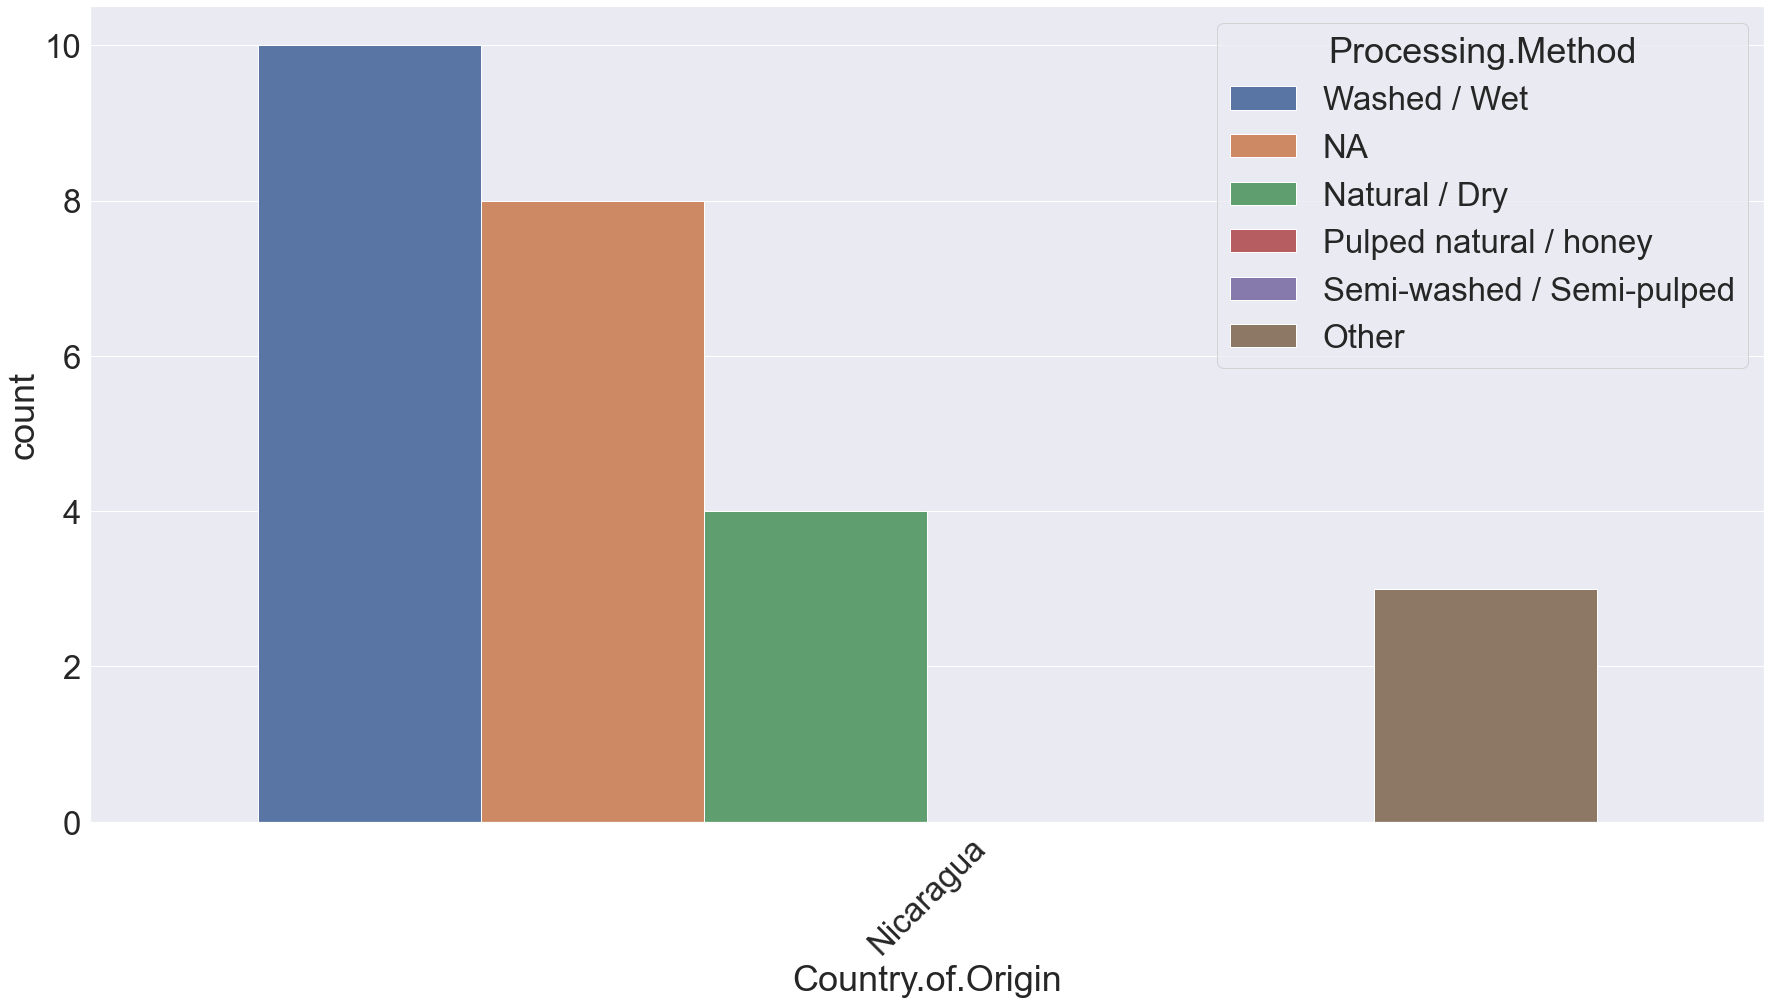

In [41]:
#니카라과 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Nicaragua']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [42]:
#니카라과 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Nicaragua') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Nicaragua'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            3
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   5
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     8
altitude_high_meters    8
altitude_mean_meters    8
dtype: int64

[Text(0, 0, 'Tanzania, United Republic Of')]

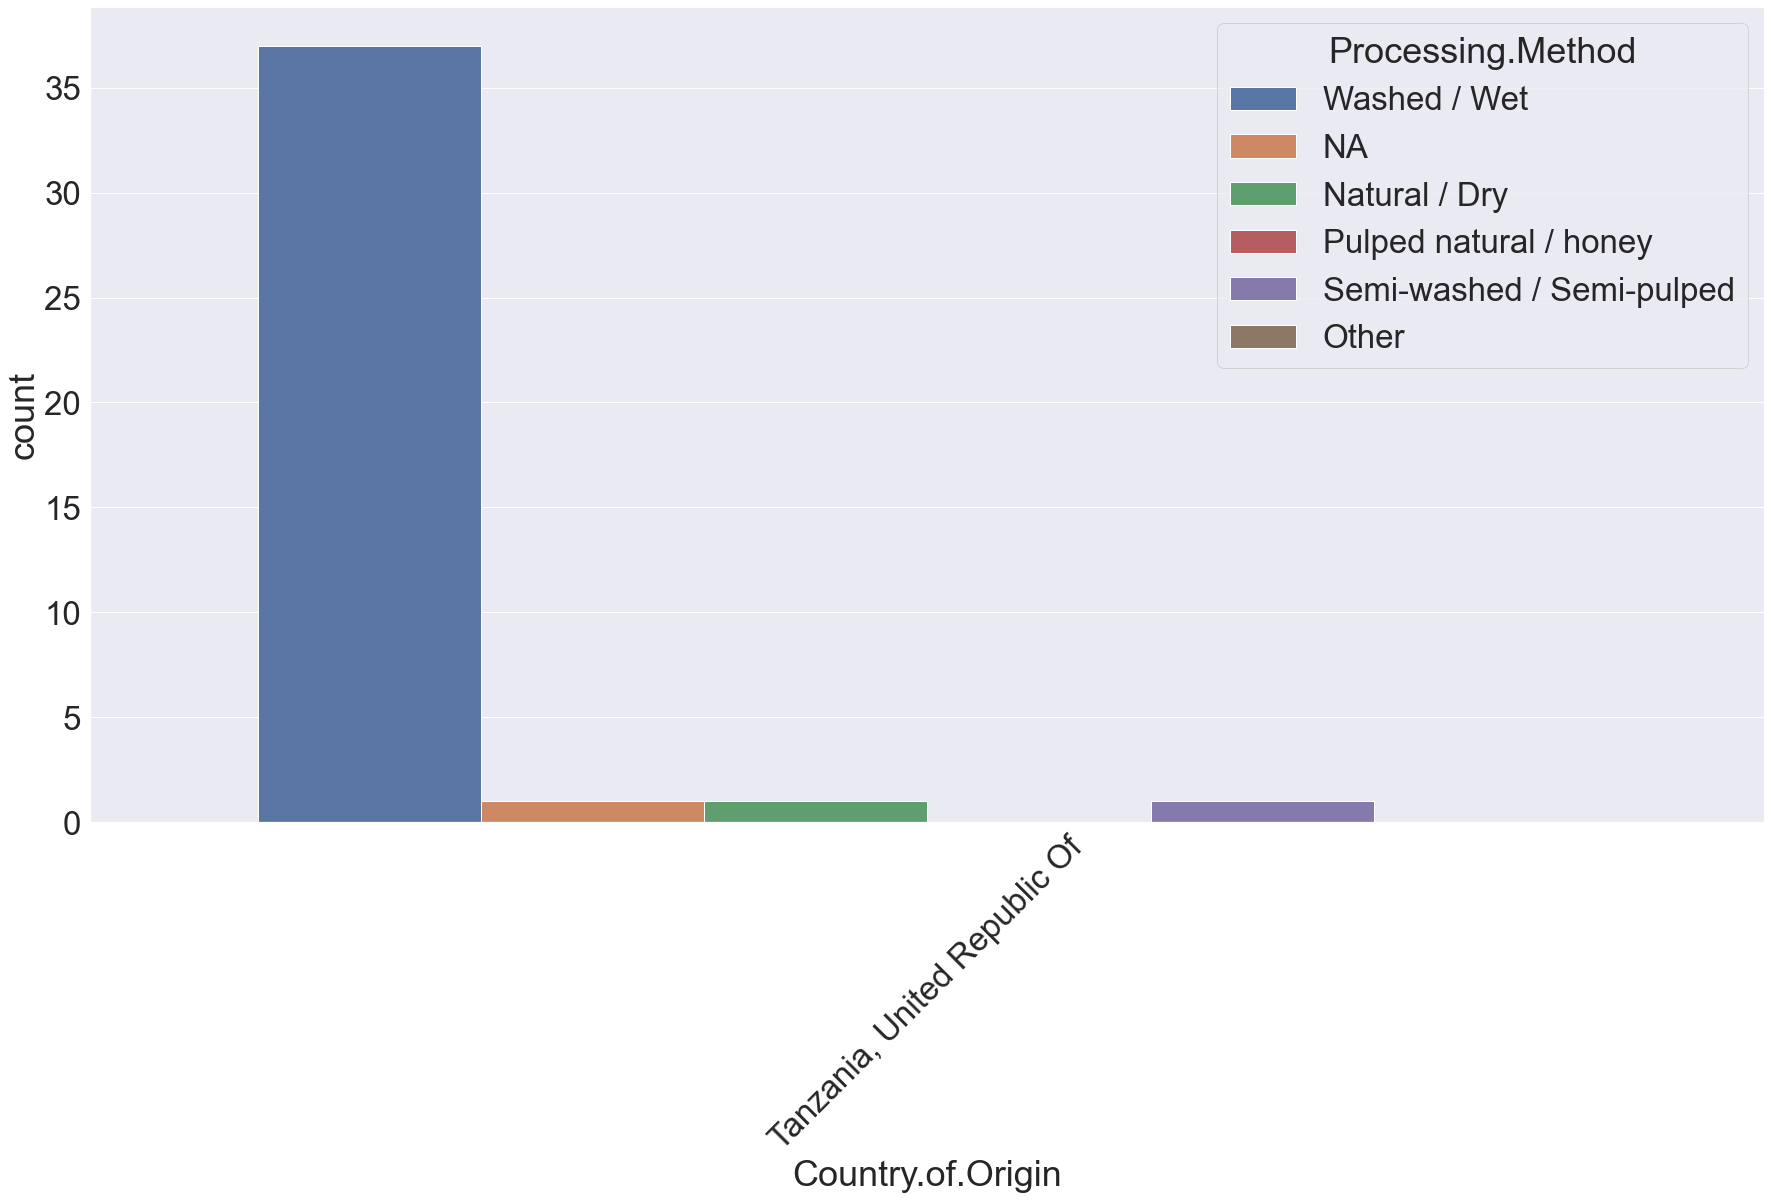

In [43]:
#탄자니아 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Tanzania, United Republic Of']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [44]:
#탄자니아 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Tanzania, United Republic Of') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Tanzania, United Republic Of'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   1
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     3
altitude_high_meters    3
altitude_mean_meters    3
dtype: int64

[Text(0, 0, 'Kenya')]

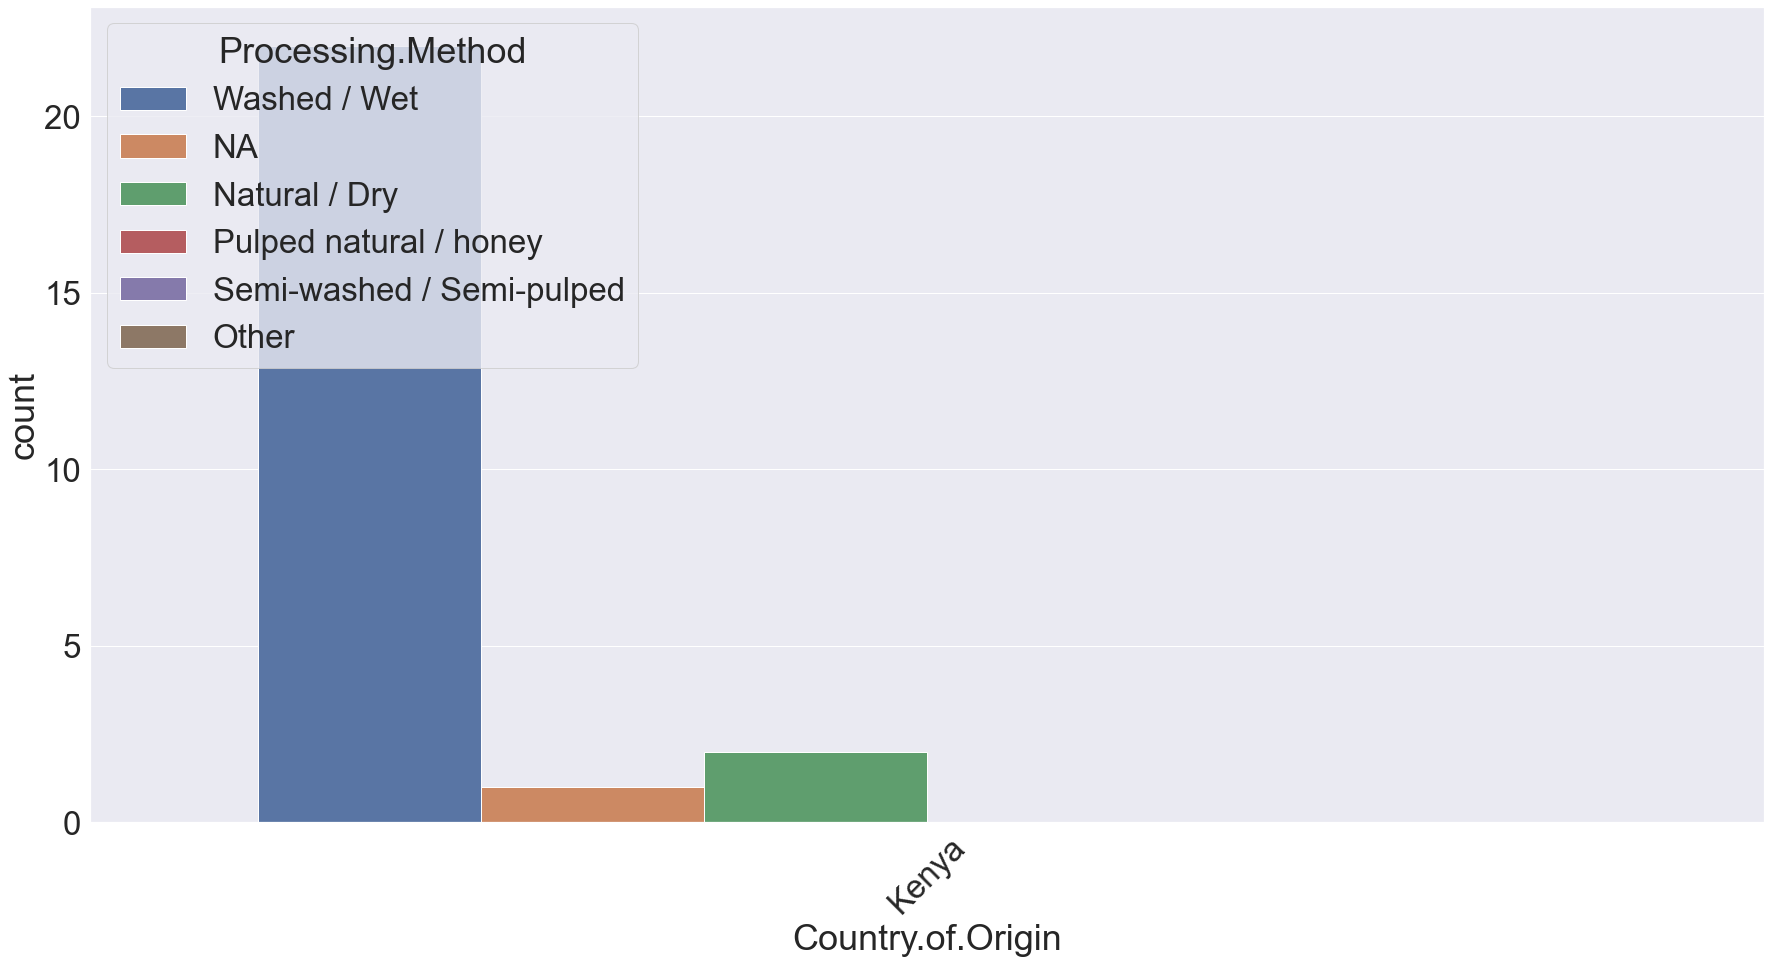

In [45]:
#케냐 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Kenya']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [46]:
#케냐 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Kenya') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Kenya'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            2
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   2
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     2
altitude_high_meters    2
altitude_mean_meters    2
dtype: int64

[Text(0, 0, 'Thailand')]

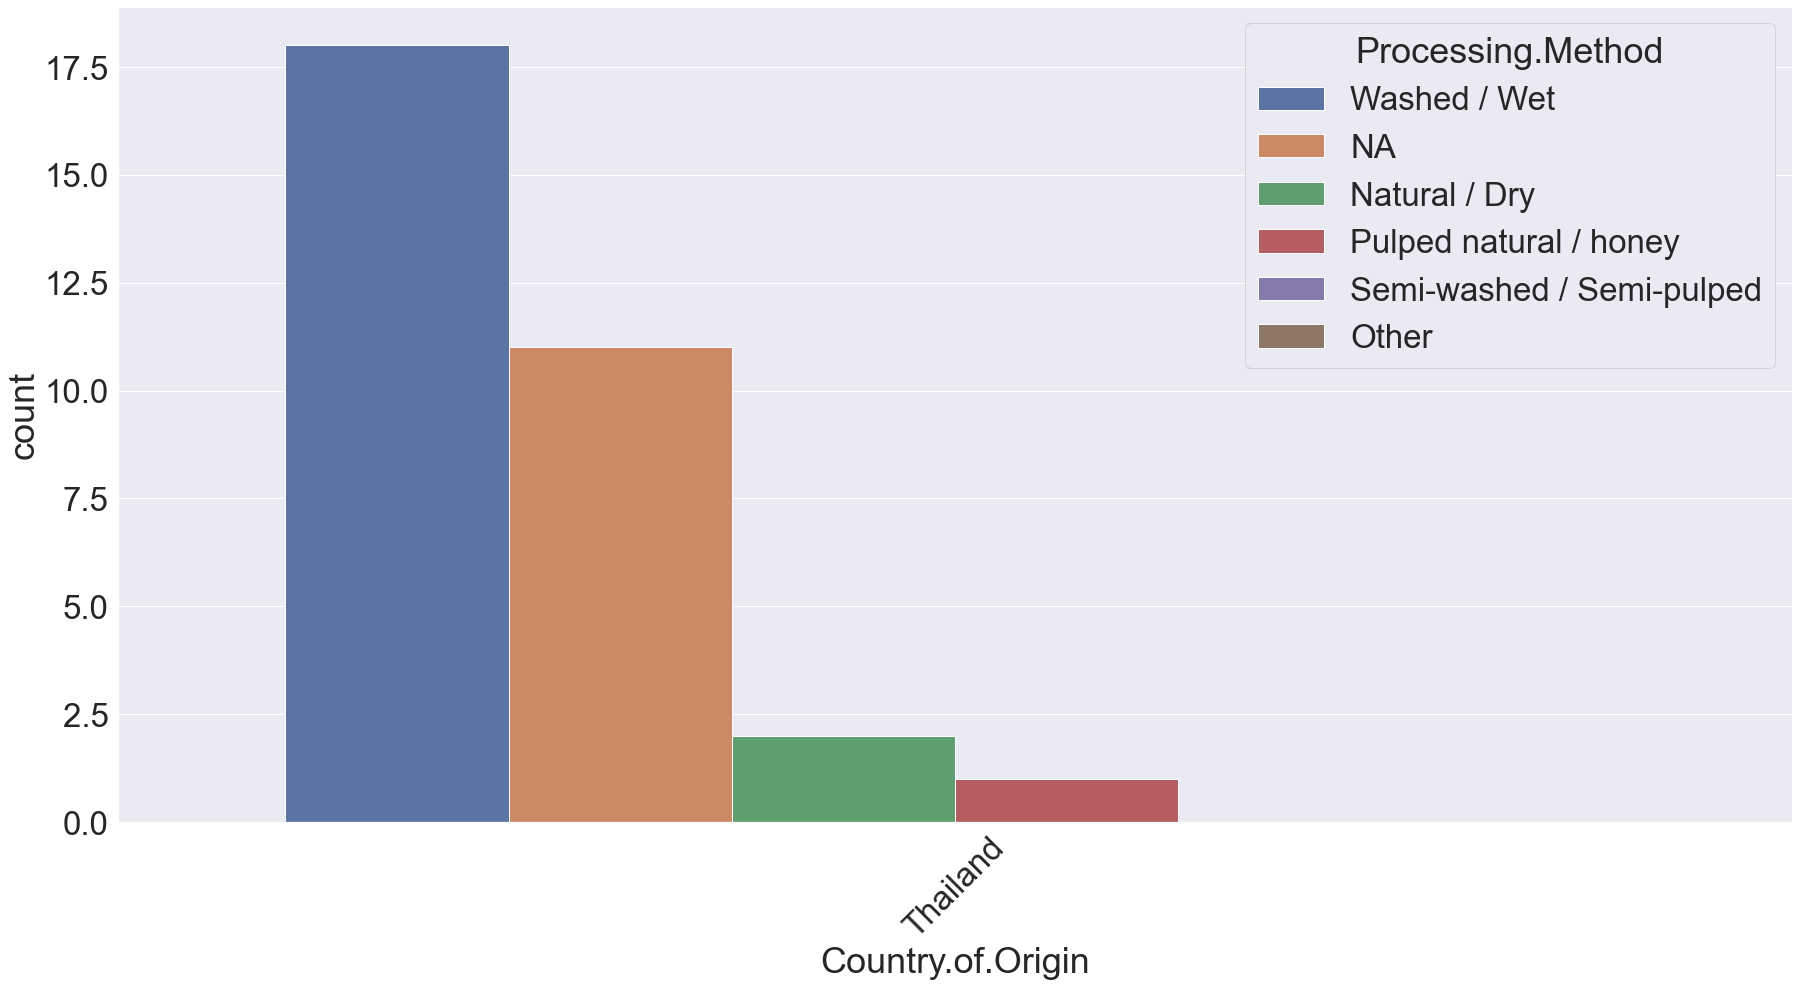

In [47]:
#태국 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Thailand']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [48]:
#태국 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Thailand') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Thailand'].isna().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             5
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                   12
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters     12
altitude_high_meters    12
altitude_mean_meters    12
dtype: int64

[Text(0, 0, 'Colombia')]

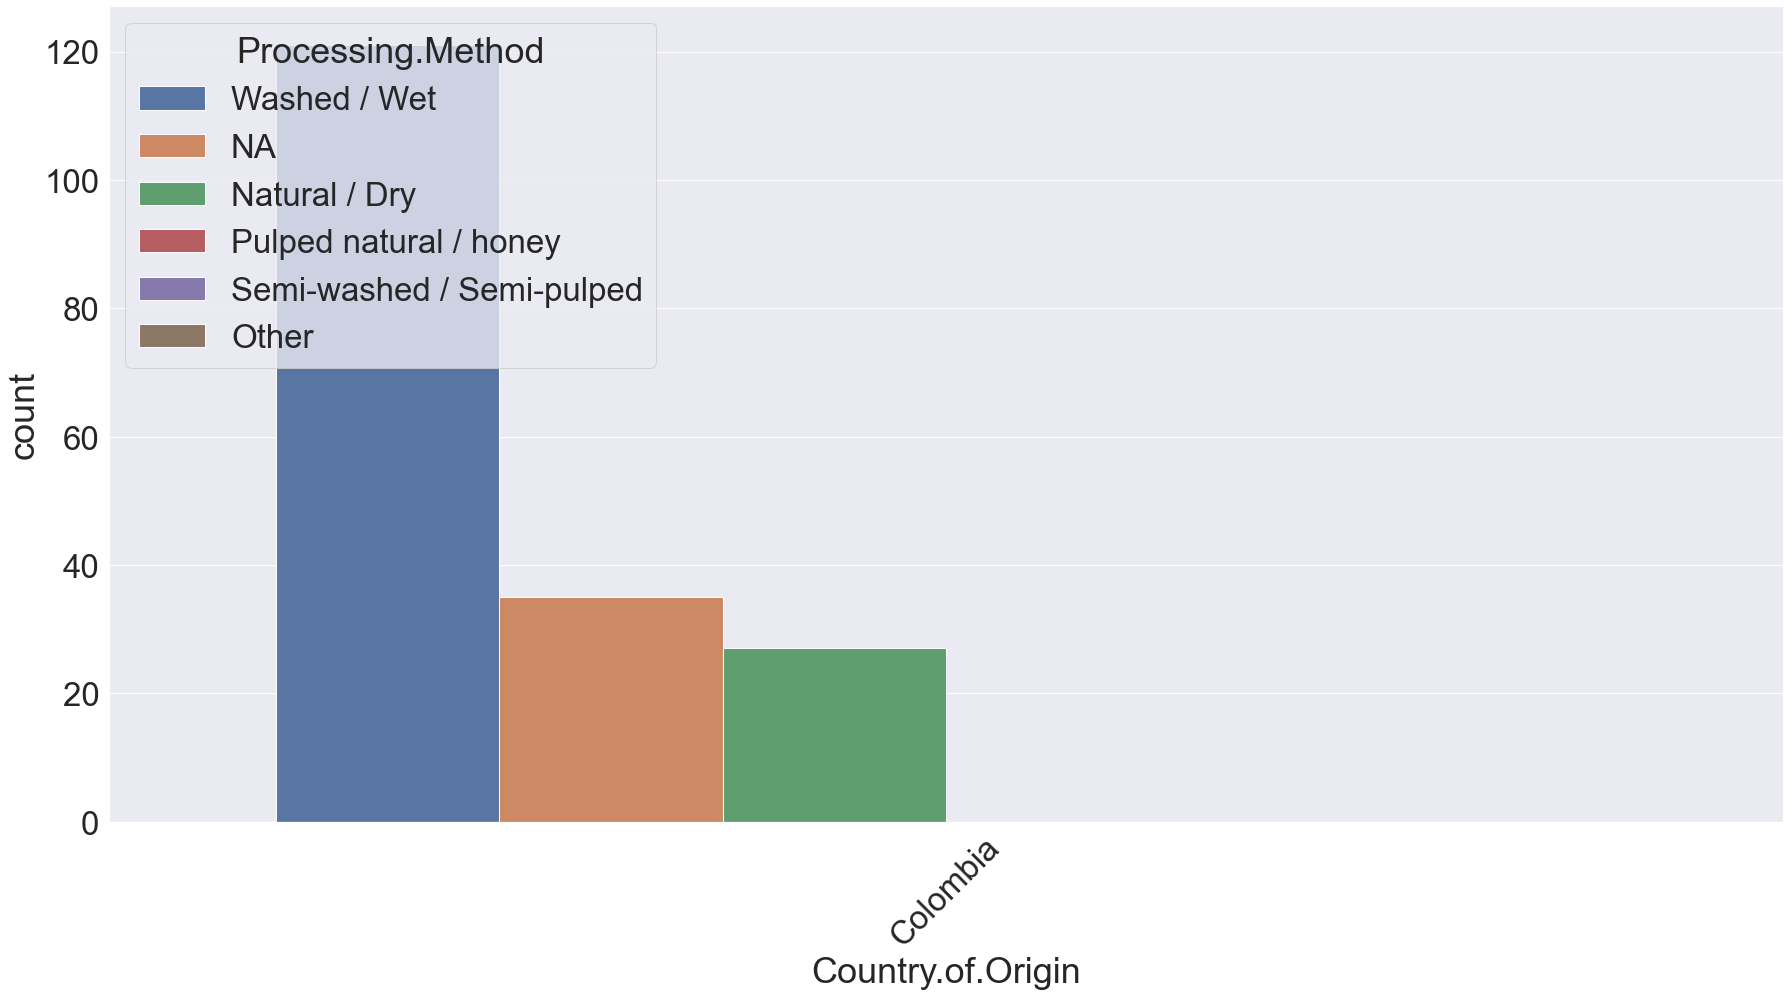

In [49]:
#콜롬비아 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Colombia']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [50]:
#콜롬비아 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='Colombia') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Colombia'].isna().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             5
Grading.Date             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  1
Color                   48
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters     33
altitude_high_meters    33
altitude_mean_meters    33
dtype: int64

[Text(0, 0, 'El Salvador')]

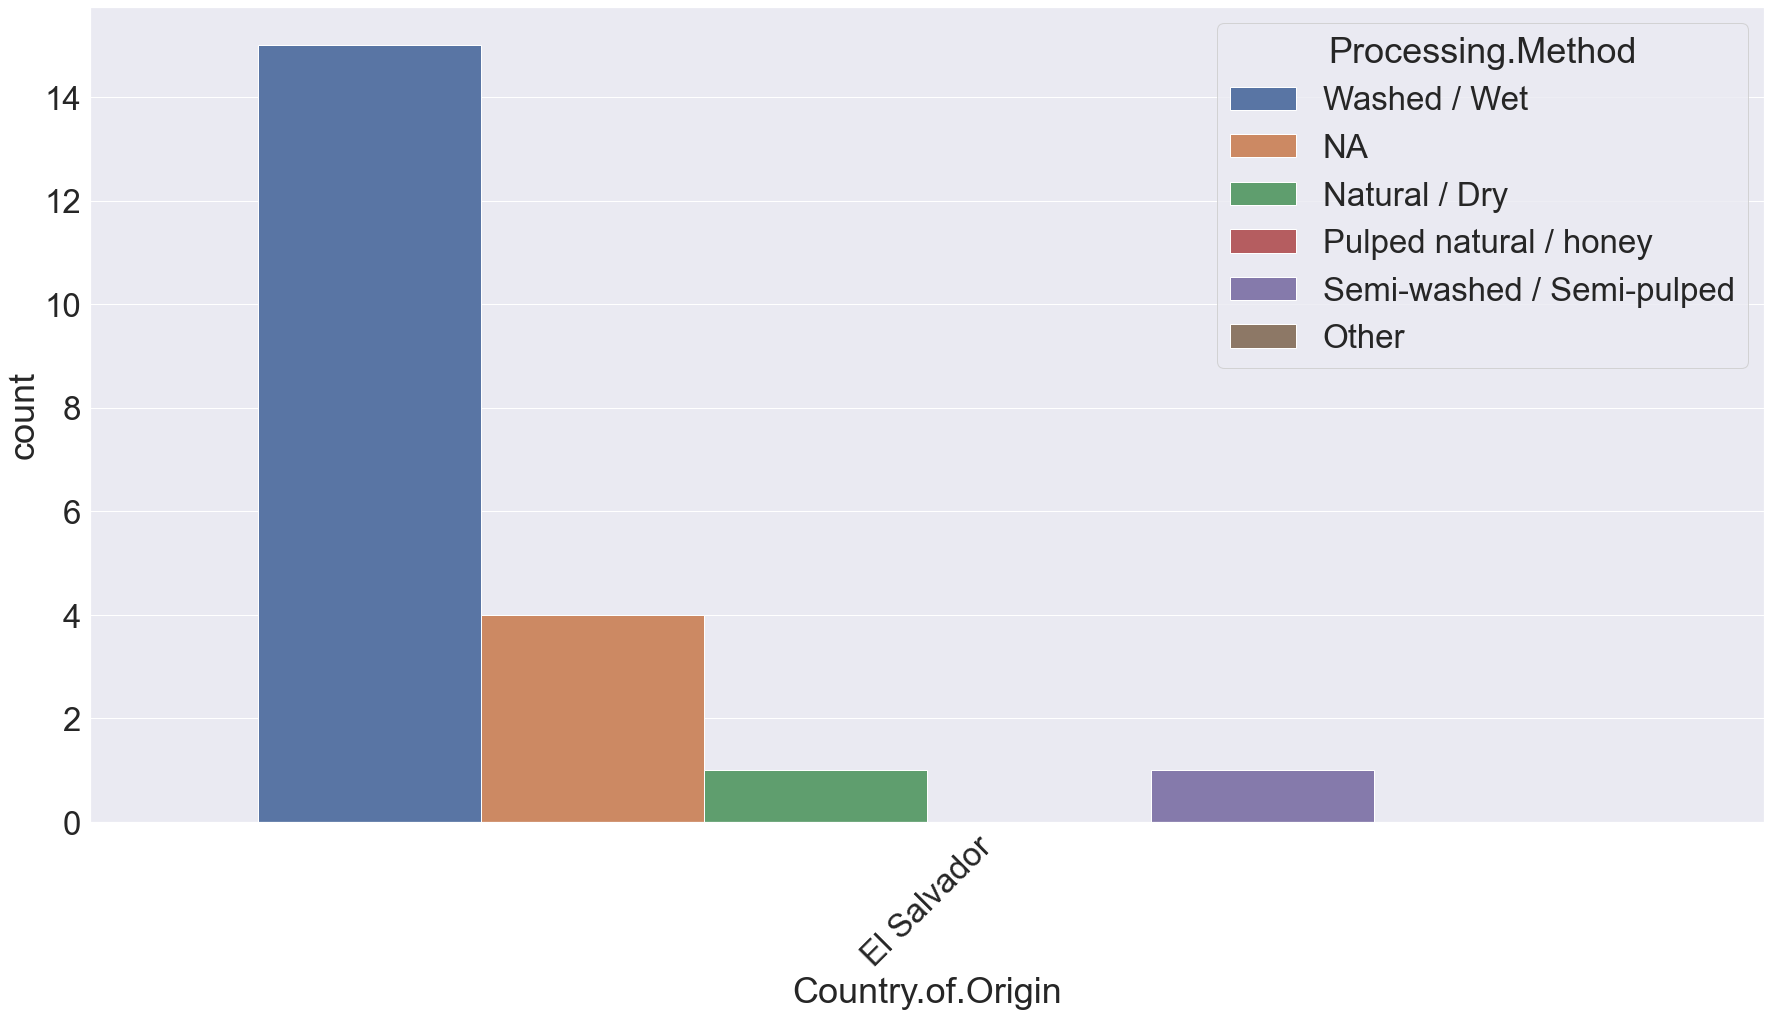

In [51]:
#엘살바도르 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='El Salvador']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [52]:
#엘살바도르 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1332):
    if ( (data1.iloc[i,1]=='El Salvador') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='El Salvador'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   6
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     2
altitude_high_meters    2
altitude_mean_meters    2
dtype: int64

[Text(0, 0, 'Ecuador')]

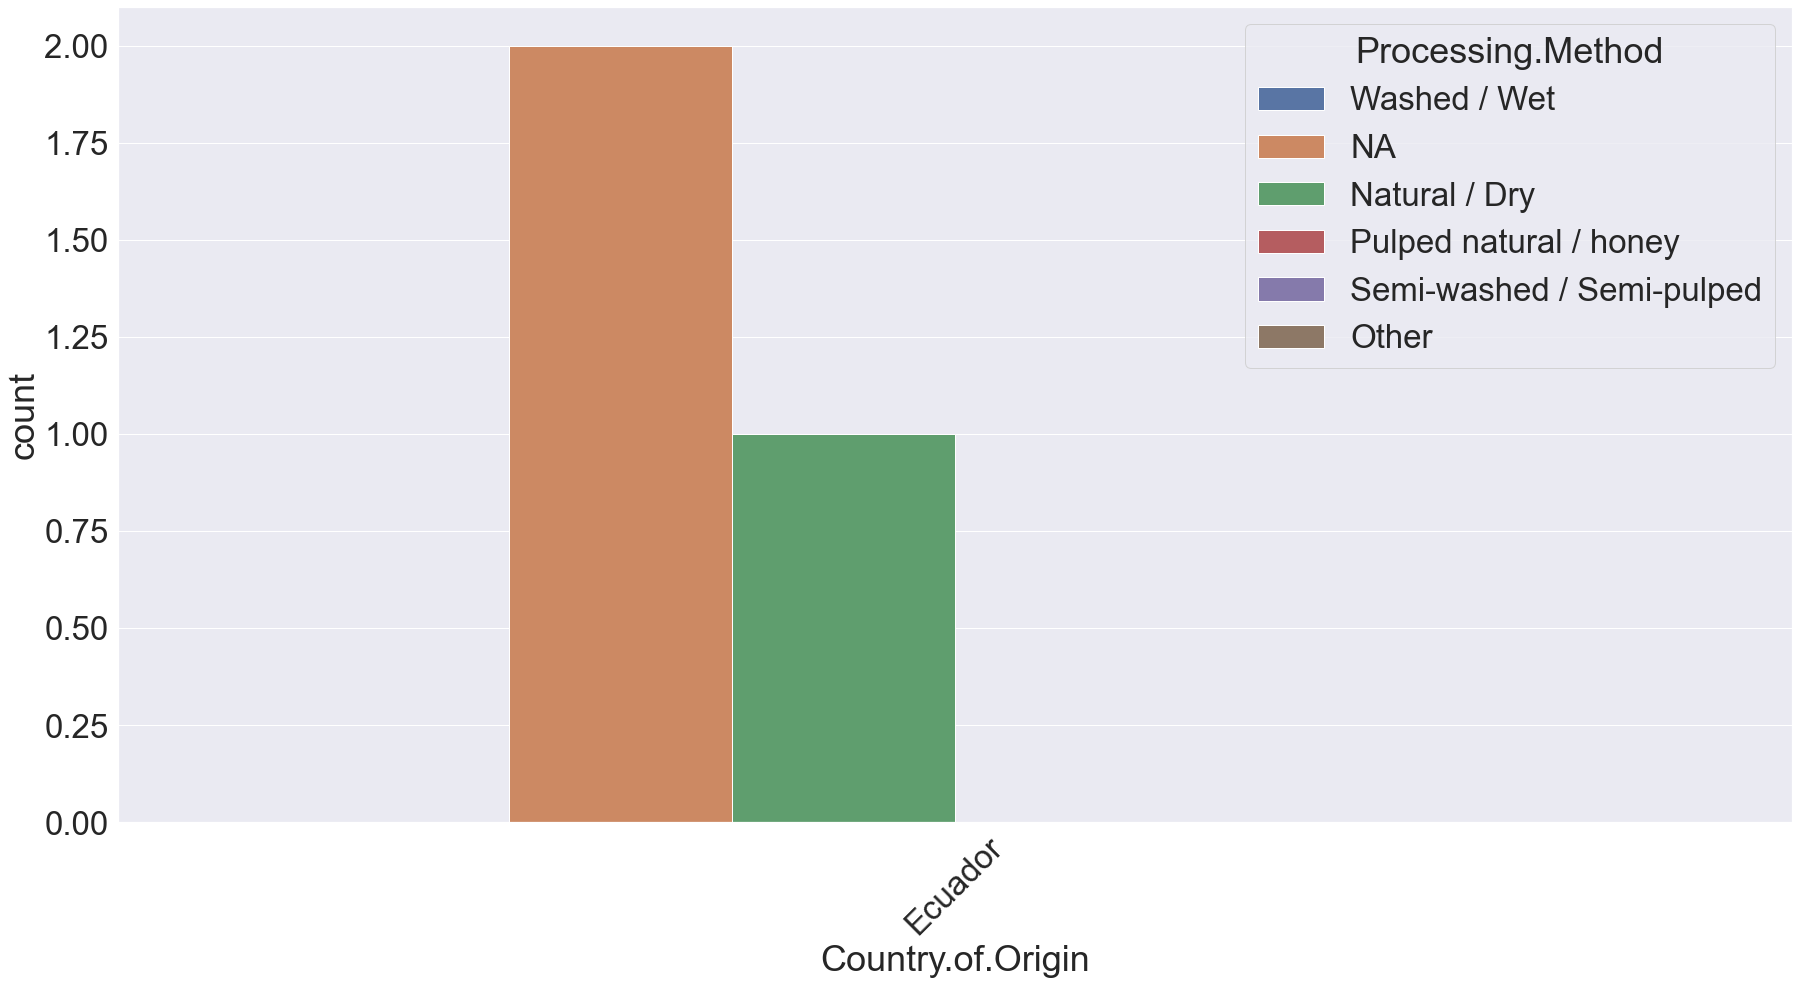

In [53]:
#에콰도르 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Ecuador']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [54]:
index_del_eq=data1[ (data1['Country.of.Origin']=='Ecuador') & (data1['Processing.Method']=='NA')].index
index_del_eq

Int64Index([1327, 1328], dtype='int64')

In [55]:
#에콰도르는 기준데이터 너무 적어 PM 결측행 삭제
data.drop(index_del_eq,axis=0,inplace=True)
data1.drop(index_del_eq,axis=0,inplace=True)
data.reset_index(inplace=True)
data1.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data1.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year         Grading.Date  \
0     Arabica          Ethiopia         2014      April 4th, 2015   
1     Arabica          Ethiopia         2014      April 4th, 2015   
2     Arabica         Guatemala          NaN       May 31st, 2010   
3     Arabica          Ethiopia         2014     March 26th, 2015   
4     Arabica          Ethiopia         2014      April 4th, 2015   
...       ...               ...          ...                  ...   
1325  Robusta             India         2013      June 20th, 2013   
1326  Robusta     United States         2012  February 29th, 2012   
1327  Robusta     United States         2014  December 23rd, 2014   
1328  Robusta             India         2013    August 25th, 2014   
1329  Robusta           Vietnam         2013    August 25th, 2014   

     Processing.Method  Aroma  Flavor  Aftertaste  Acidity  Body  ...  \
0         Washed / Wet   8.67    8.83        8.67     8.75  8.50  ...   
1         Washed / Wet   8.75    8.67        8.50     8.58  8.42  ...   
2         Washed / Wet   8.42    8.50        8.42     8.42  8.33  ...   
3        Natural / Dry   8.17    8.58        8.42     8.42  8.50  ...   
4         Washed / Wet   8.25    8.50        8.25     8.50  8.42  ...   
...                ...    ...     ...         ...      ...   ...  ...   
1325     Natural / Dry   7.58    7.42        7.42     7.83  7.42  ...   
1326     Natural / Dry   7.92    7.50        7.42     7.42  7.42  ...   
1327     Natural / Dry   7.33    7.33        7.17     7.42  7.50  ...   
1328     Natural / Dry   7.42    6.83        6.75     7.17  7.25  ...   
1329     Natural / Dry   6.75    6.67        6.50     6.83  6.92  ...   

      Total.Cup.Points  Moisture  Category.One.Defects  Quakers  Color  \
0                90.58      0.12                     0      0.0  Green   
1                89.92      0.12                     0      0.0  Green   
2                89.75      0.00                     0      0.0    NaN   
3                89.00      0.11                     0      0.0  Green   
4                88.83      0.12                     0      0.0  Green   
...                ...       ...                   ...      ...    ...   
1325             80.17      0.00                     0      0.0  Green   
1326             79.33      0.00                     0      0.0  Green   
1327             77.17      0.00                     0      0.0    NaN   
1328             75.08      0.10                    20      0.0  Green   
1329             73.75      0.12                    63      0.0   None   

      Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
0                        0                    m               1950.0   
1                        1                    m               1950.0   
2                        0                    m               1600.0   
3                        2                    m               1800.0   
4                        2                    m               1950.0   
...                    ...                  ...                  ...   
1325                     0                    m                750.0   
1326                     0                    m               3000.0   
1327                     6                    m                795.0   
1328                     1                    m                  NaN   
1329                     9                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
0                   2200.0               2075.0  
1                   2200.0               2075.0  
2                   1800.0               1700.0  
3                   2200.0               2000.0  
4                   2200.0               2075.0  
...                    ...                  ...  
1325                 750.0                750.0  
1326                3000.0               3000.0  
1327                 795.0                795.0  
1328                   NaN                  Na

[Text(0, 0, 'Haiti')]

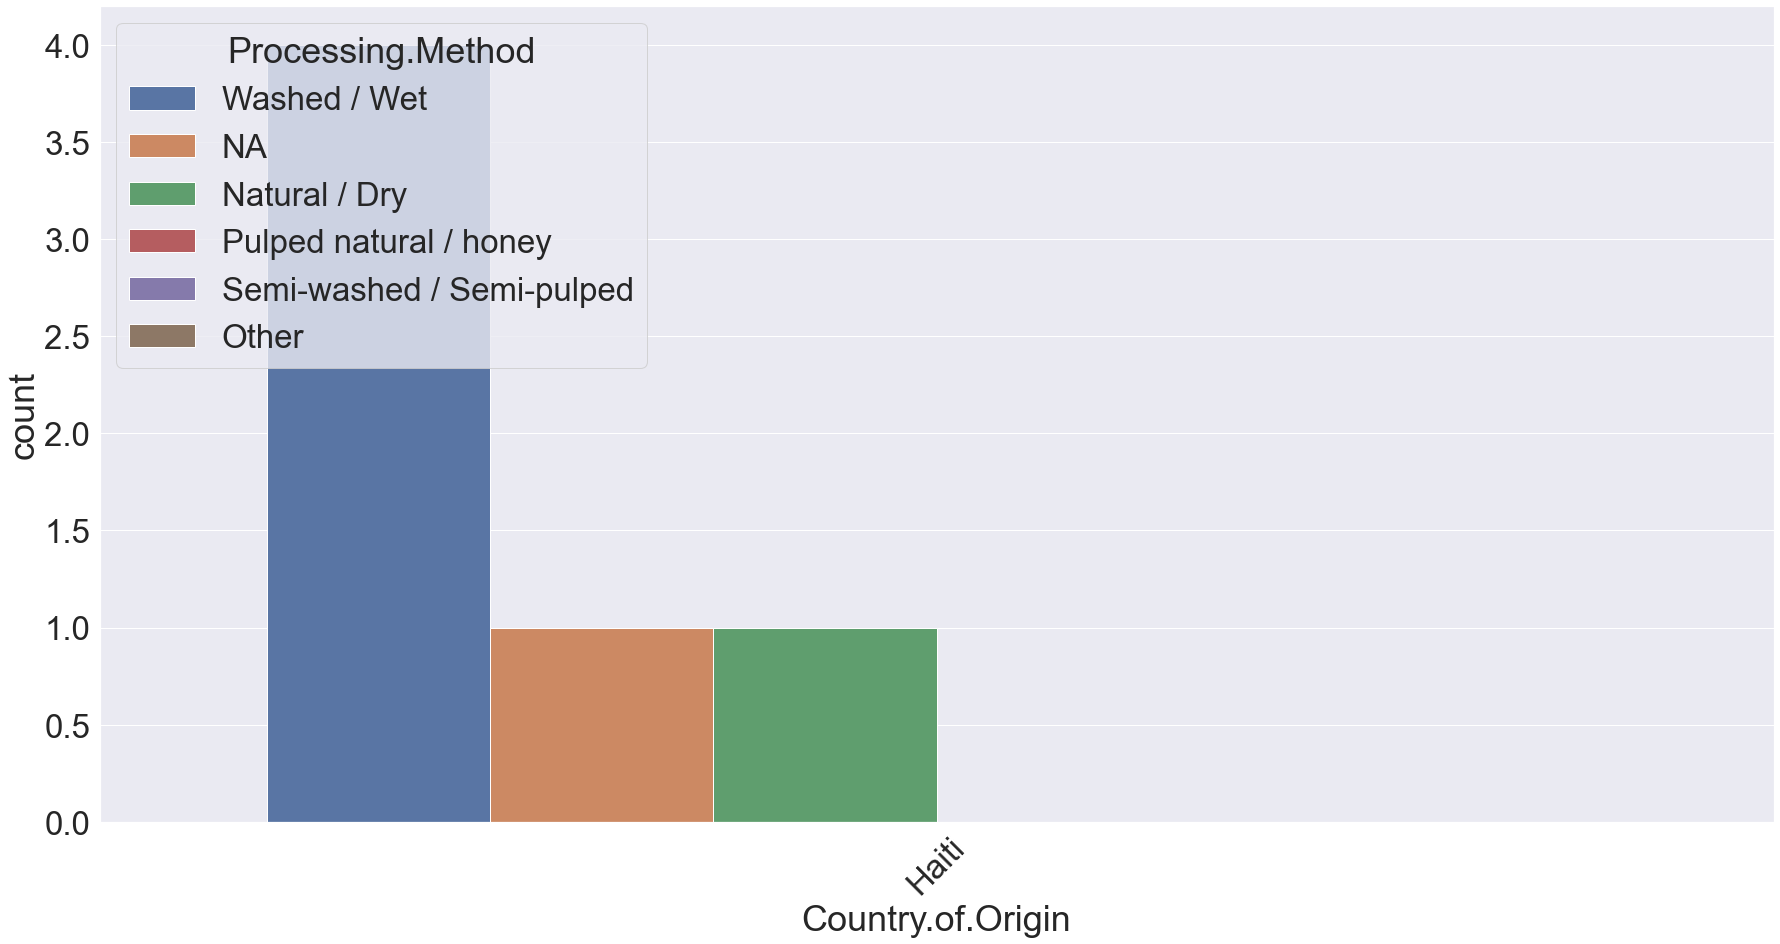

In [56]:
#아이티 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Haiti']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [57]:
#아이티 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1330):
    if ( (data1.iloc[i,1]=='Haiti') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Haiti'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   2
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     0
altitude_high_meters    0
altitude_mean_meters    0
dtype: int64

[Text(0, 0, 'Burundi')]

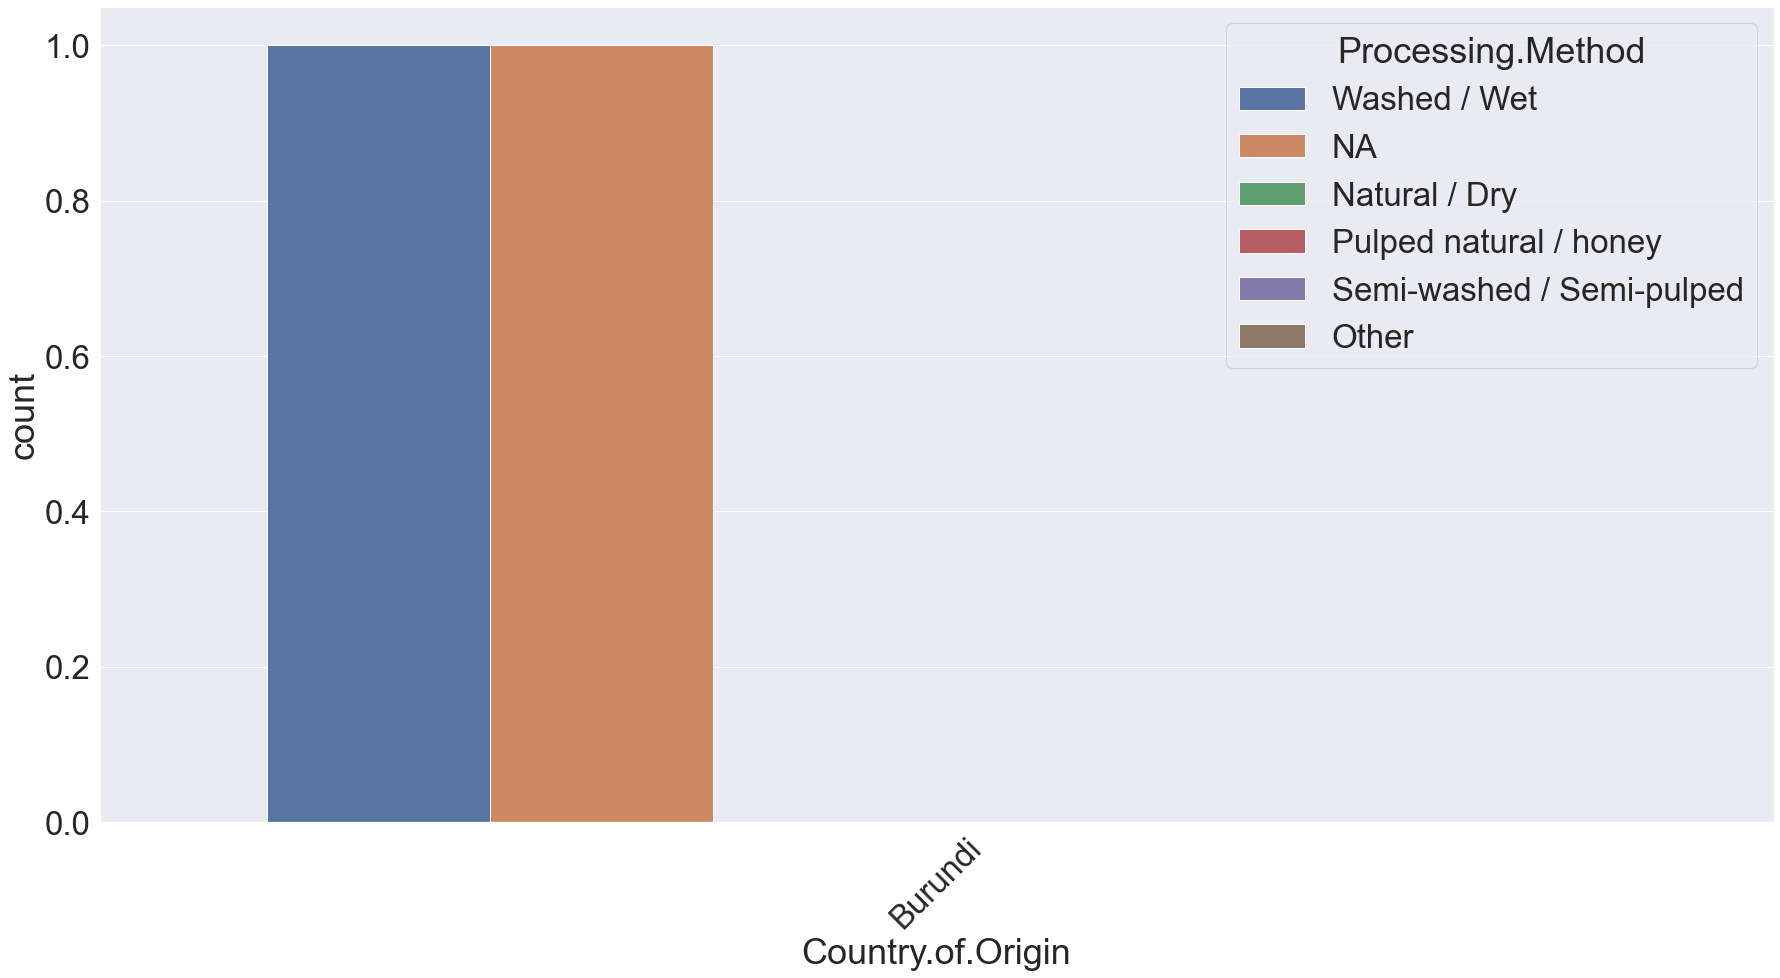

In [58]:
#버런디 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='Burundi']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [59]:
#브룬디 PM결측치는 국가경향, 전부 WW 대체 결정
for i in range(0,1330):
    if ( (data1.iloc[i,1]=='Burundi') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Washed / Wet'

data[data['Country.of.Origin']=='Burundi'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   1
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     0
altitude_high_meters    0
altitude_mean_meters    0
dtype: int64

In [60]:
index_del_mau=data[data['Country.of.Origin']=='Mauritius'].index
index_del_mau

Int64Index([1067], dtype='int64')

In [61]:
#마우리시우스는 기준데이터 너무 적어 PM 결측행 삭제
data.drop(index_del_mau,axis=0,inplace=True)
data1.drop(index_del_mau,axis=0,inplace=True)
data.reset_index(inplace=True)
data1.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data1.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year         Grading.Date  \
0     Arabica          Ethiopia         2014      April 4th, 2015   
1     Arabica          Ethiopia         2014      April 4th, 2015   
2     Arabica         Guatemala          NaN       May 31st, 2010   
3     Arabica          Ethiopia         2014     March 26th, 2015   
4     Arabica          Ethiopia         2014      April 4th, 2015   
...       ...               ...          ...                  ...   
1324  Robusta             India         2013      June 20th, 2013   
1325  Robusta     United States         2012  February 29th, 2012   
1326  Robusta     United States         2014  December 23rd, 2014   
1327  Robusta             India         2013    August 25th, 2014   
1328  Robusta           Vietnam         2013    August 25th, 2014   

     Processing.Method  Aroma  Flavor  Aftertaste  Acidity  Body  ...  \
0         Washed / Wet   8.67    8.83        8.67     8.75  8.50  ...   
1         Washed / Wet   8.75    8.67        8.50     8.58  8.42  ...   
2         Washed / Wet   8.42    8.50        8.42     8.42  8.33  ...   
3        Natural / Dry   8.17    8.58        8.42     8.42  8.50  ...   
4         Washed / Wet   8.25    8.50        8.25     8.50  8.42  ...   
...                ...    ...     ...         ...      ...   ...  ...   
1324     Natural / Dry   7.58    7.42        7.42     7.83  7.42  ...   
1325     Natural / Dry   7.92    7.50        7.42     7.42  7.42  ...   
1326     Natural / Dry   7.33    7.33        7.17     7.42  7.50  ...   
1327     Natural / Dry   7.42    6.83        6.75     7.17  7.25  ...   
1328     Natural / Dry   6.75    6.67        6.50     6.83  6.92  ...   

      Total.Cup.Points  Moisture  Category.One.Defects  Quakers  Color  \
0                90.58      0.12                     0      0.0  Green   
1                89.92      0.12                     0      0.0  Green   
2                89.75      0.00                     0      0.0    NaN   
3                89.00      0.11                     0      0.0  Green   
4                88.83      0.12                     0      0.0  Green   
...                ...       ...                   ...      ...    ...   
1324             80.17      0.00                     0      0.0  Green   
1325             79.33      0.00                     0      0.0  Green   
1326             77.17      0.00                     0      0.0    NaN   
1327             75.08      0.10                    20      0.0  Green   
1328             73.75      0.12                    63      0.0   None   

      Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
0                        0                    m               1950.0   
1                        1                    m               1950.0   
2                        0                    m               1600.0   
3                        2                    m               1800.0   
4                        2                    m               1950.0   
...                    ...                  ...                  ...   
1324                     0                    m                750.0   
1325                     0                    m               3000.0   
1326                     6                    m                795.0   
1327                     1                    m                  NaN   
1328                     9                    m                  NaN   

      altitude_high_meters altitude_mean_meters  
0                   2200.0               2075.0  
1                   2200.0               2075.0  
2                   1800.0               1700.0  
3                   2200.0               2000.0  
4                   2200.0               2075.0  
...                    ...                  ...  
1324                 750.0                750.0  
1325                3000.0               3000.0  
1326                 795.0                795.0  
1327                   NaN                  Na

[Text(0, 0, 'India')]

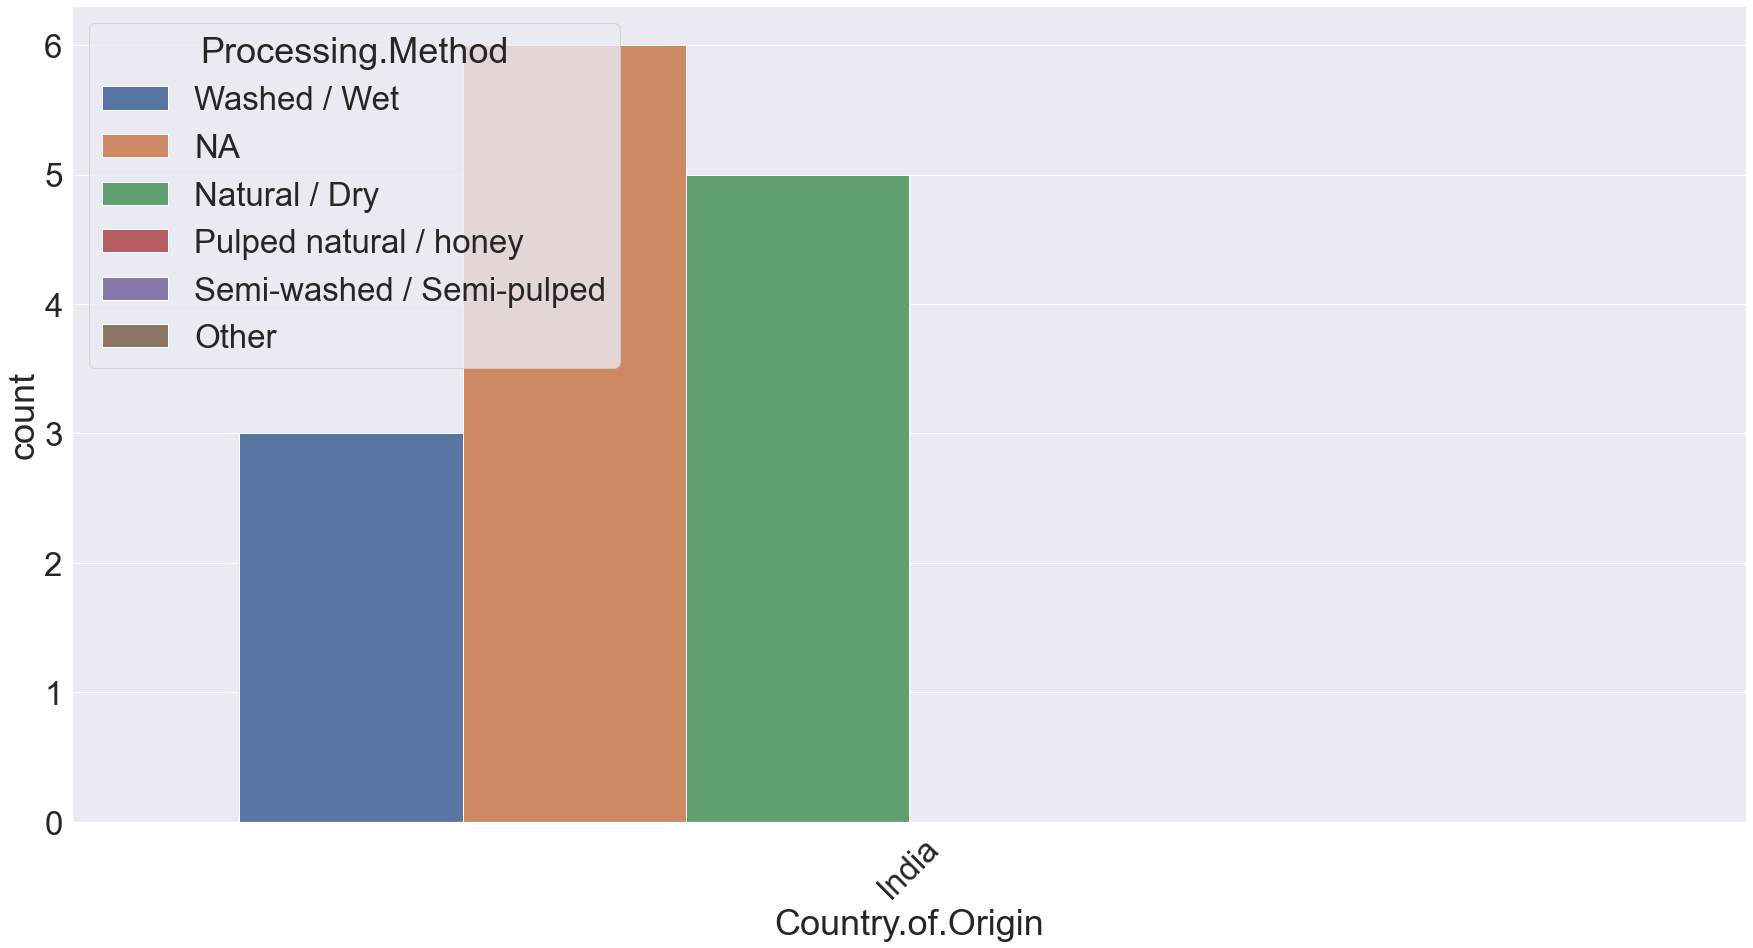

In [62]:
#인도 PM결측치 확인
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
ax=sns.countplot(x=data1[data1['Country.of.Origin']=='India']['Country.of.Origin'],hue=data1['Processing.Method'],dodge=True,ax=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)

In [63]:
#인도 PM결측치는 국가경향, 전부 ND 대체 결정
for i in range(0,1329):
    if ( (data1.iloc[i,1]=='India') and (data1.iloc[i,4]=='NA' ) ) :
        data.iloc[i,4]='Natural / Dry'

data[data['Country.of.Origin']=='India'].isna().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Grading.Date            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   1
Category.Two.Defects    0
unit_of_measurement     0
altitude_low_meters     2
altitude_high_meters    2
altitude_mean_meters    2
dtype: int64

In [64]:
data.isnull().sum()

Species                   0
Country.of.Origin         0
Harvest.Year             46
Grading.Date              0
Processing.Method         0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   217
Category.Two.Defects      0
unit_of_measurement       0
altitude_low_meters     228
altitude_high_meters    228
altitude_mean_meters    228
dtype: int64

In [65]:
data.dropna(subset=['Harvest.Year'],inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [66]:
data.isnull().sum()

Species                   0
Country.of.Origin         0
Harvest.Year              0
Grading.Date              0
Processing.Method         0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   182
Category.Two.Defects      0
unit_of_measurement       0
altitude_low_meters     194
altitude_high_meters    194
altitude_mean_meters    194
dtype: int64

In [67]:
data.drop(['Color'],axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year         Grading.Date  \
0     Arabica          Ethiopia         2014      April 4th, 2015   
1     Arabica          Ethiopia         2014      April 4th, 2015   
2     Arabica          Ethiopia         2014     March 26th, 2015   
3     Arabica          Ethiopia         2014      April 4th, 2015   
4     Arabica            Brazil         2013  September 3rd, 2013   
...       ...               ...          ...                  ...   
1278  Robusta             India         2013      June 20th, 2013   
1279  Robusta     United States         2012  February 29th, 2012   
1280  Robusta     United States         2014  December 23rd, 2014   
1281  Robusta             India         2013    August 25th, 2014   
1282  Robusta           Vietnam         2013    August 25th, 2014   

     Processing.Method  Aroma  Flavor  Aftertaste  Acidity  Body  ...  \
0         Washed / Wet   8.67    8.83        8.67     8.75  8.50  ...   
1         Washed / Wet   8.75    8.67        8.50     8.58  8.42  ...   
2        Natural / Dry   8.17    8.58        8.42     8.42  8.50  ...   
3         Washed / Wet   8.25    8.50        8.25     8.50  8.42  ...   
4        Natural / Dry   8.58    8.42        8.42     8.50  8.25  ...   
...                ...    ...     ...         ...      ...   ...  ...   
1278     Natural / Dry   7.58    7.42        7.42     7.83  7.42  ...   
1279     Natural / Dry   7.92    7.50        7.42     7.42  7.42  ...   
1280     Natural / Dry   7.33    7.33        7.17     7.42  7.50  ...   
1281     Natural / Dry   7.42    6.83        6.75     7.17  7.25  ...   
1282     Natural / Dry   6.75    6.67        6.50     6.83  6.92  ...   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1278           7.58             80.17      0.00                     0   
1279           7.33             79.33      0.00                     0   
1280           7.17             77.17      0.00                     0   
1281           6.92             75.08      0.10                    20   
1282           7.92             73.75      0.12                    63   

      Quakers  Category.Two.Defects  unit_of_measurement  altitude_low_meters  \
0         0.0                     0                    m               1950.0   
1         0.0                     1                    m               1950.0   
2         0.0                     2                    m               1800.0   
3         0.0                     2                    m               1950.0   
4         0.0                     1                    m                  NaN   
...       ...                   ...                  ...                  ...   
1278      0.0                     0                    m                750.0   
1279      0.0                     0                    m               3000.0   
1280      0.0                     6                    m                795.0   
1281      0.0                     1                    m                  NaN   
1282      0.0                     9                    m                  NaN   

      altitude_high_meters  altitude_mean_meters  
0                   2200.0                2075.0  
1                   2200.0                2075.0  
2                   2200.0                2000.0  
3                   2200.0                2075.0  
4                      NaN                   NaN  
...                    ...                   ...  
1278                 750.0                 750.0  
1279                3000.0                

In [68]:
data.drop(['Grading.Date','unit_of_measurement','altitude_low_meters','altitude_high_meters'],axis=1,inplace=True)

In [69]:
#quakers 결측행 1개 삭제
print(data[np.isnan(data.Quakers)])
index_del_q=data[np.isnan(data.Quakers)].index
data.drop(index_del_q,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

     Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
354  Arabica          Colombia         2013      Washed / Wet   7.58    7.67   

     Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
354        7.58     7.75  7.58     7.75        10.0       10.0       10.0   

     Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  Quakers  \
354           7.58              83.5      0.11                     0      NaN   

     Category.Two.Defects  altitude_mean_meters  
354                     2                1750.0  


In [70]:
data.isnull().sum()

Species                   0
Country.of.Origin         0
Harvest.Year              0
Processing.Method         0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   0
Category.Two.Defects      0
altitude_mean_meters    194
dtype: int64

In [71]:
data['Country.of.Origin'].unique()

array(['Ethiopia', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Guatemala', 'Panama', 'Papua New Guinea', 'El Salvador',
       'Nicaragua', 'Ecuador', 'United States (Puerto Rico)', 'Haiti',
       'Burundi', 'Vietnam', 'Philippines', 'Rwanda', 'Malawi', 'Laos',
       'Zambia', 'Myanmar', 'Cote d?Ivoire', 'India'], dtype=object)

In [72]:
#altitude결측치 대체 작업

alti결측행개수: 14


(array([2., 4., 2., 4., 3., 4., 5., 0., 2., 3.]),
 array([1550. , 1602.5, 1655. , 1707.5, 1760. , 1812.5, 1865. , 1917.5,
        1970. , 2022.5, 2075. ]),
 <BarContainer object of 10 artists>)

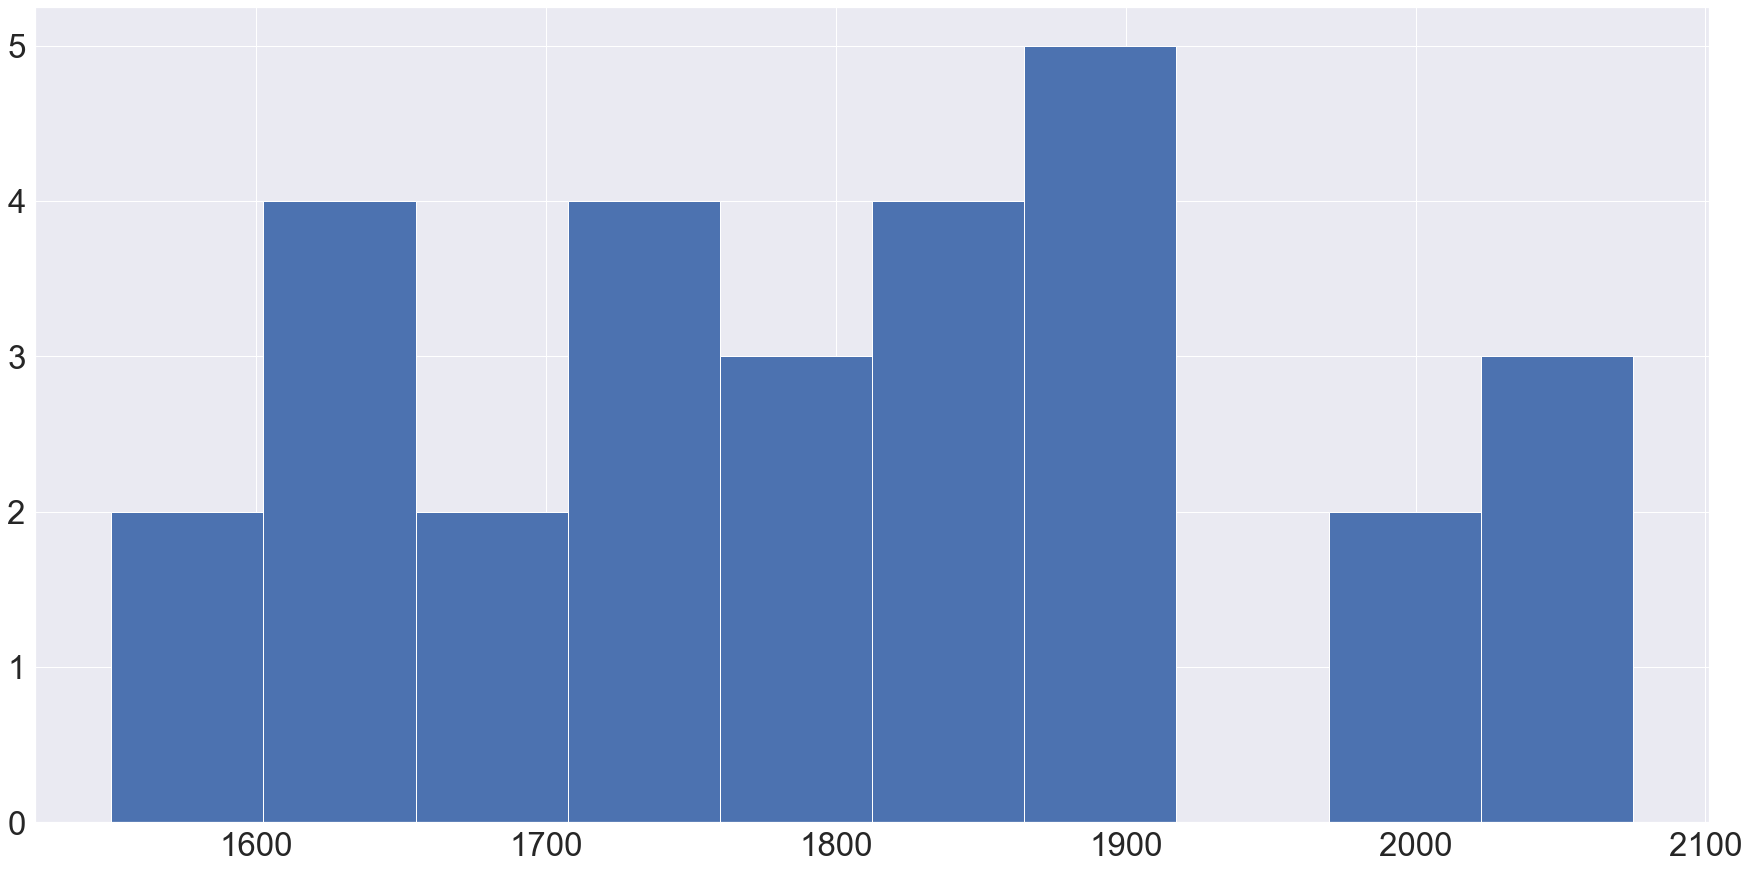

In [73]:
#에티오피아 alt결측치 확인
plt.figure(figsize=(30,15))
plt.rc('font', size=20)
print("alti결측행개수:",data[data['Country.of.Origin']=='Ethiopia']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Ethiopia']['altitude_mean_meters'],bins=10)

In [74]:
data[data['Country.of.Origin']=='Ethiopia'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Category.One.Defects -0.025806 -0.204844   -0.313286 -0.348853 -0.316450   
Category.Two.Defects -0.210454 -0.277511   -0.352621 -0.387201 -0.260728   
Clean.Cup             0.330521  0.346196    0.315476  0.233196  0.211438   
Quakers              -0.044931 -0.109482   -0.110021 -0.118760 -0.282456   
Moisture             -0.083697 -0.042786   -0.064158 -0.011914 -0.012345   
Balance               0.706898  0.799160    0.851936  0.741912  0.772491   
Body                  0.674880  0.737724    0.765262  0.751112  1.000000   
Sweetness            -0.088314 -0.027152   -0.142155 -0.126999 -0.210492   
Cupper.Points         0.815527  0.887158    0.916409  0.875760  0.753827   
Uniformity           -0.023600  0.100063    0.067634  0.024751 -0.102822   
Aftertaste            0.745994  0.897962    1.000000  0.881292  0.765262   
Aroma                 1.000000  0.824653    0.745994  0.733321  0.674880   
Flavor                0.824653  1.000000    0.897962  0.888860  0.737724   
Total.Cup.Points      0.834136  0.939344    0.919538  0.880667  0.782059   
Acidity               0.733321  0.888860    0.881292  1.000000  0.751112   
altitude_mean_meters  0.315829  0.369900    0.309533  0.427149  0.234529   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Category.One.Defects -0.155370    0.002765   0.086531   0.130262   
Category.Two.Defects -0.212373    0.189296   0.161837   0.059983   
Clean.Cup             0.122967    0.705595   1.000000   0.425626   
Quakers              -0.102285    0.088908   0.058150   0.087538   
Moisture             -0.113934    0.271208   0.187335   0.312400   
Balance               1.000000   -0.120613   0.122967  -0.171575   
Body                  0.772491   -0.102822   0.211438  -0.210492   
Sweetness            -0.171575    0.650253   0.425626   1.000000   
Cupper.Points         0.831432   -0.017884   0.315271  -0.197896   
Uniformity           -0.120613    1.000000   0.705595   0.650253   
Aftertaste            0.851936    0.067634   0.315476  -0.142155   
Aroma                 0.706898   -0.023600   0.330521  -0.088314   
Flavor                0.799160    0.100063   0.346196  -0.027152   
Total.Cup.Points      0.819816    0.266514   0.510488   0.116641   
Acidity               0.741912    0.024751   0.233196  -0.126999   
altitude_mean_meters  0.131449    0.289658  -0.050564   0.250192   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Category.One.Defects      -0.154845         -0.197696  0.035049   
Category.Two.Defects      -0.268363         -0.249226 -0.080776   
Clean.Cup                  0.315271          0.510488  0.187335   
Quakers                   -0.062738         -0.091649  0.092609   
Moisture                  -0.116365          0.024513  1.000000   
Balance                    0.831432          0.819816 -0.113934   
Body                       0.753827          0.782059 -0.012345   
Sweetness                 -0.197896          0.116641  0.312400   
Cupper.Points              1.000000          0.905920 -0.116365   
Uniformity                -0.017884          0.266514  0.271208   
Aftertaste                 0.916409          0.919538 -0.064158   
Aroma                      0.815527          0.834136 -0.083697   
Flavor                     0.887158          0.939344 -0.042786   
Total.Cup.Points           0.905920          1.000000  0.024513   
Acidity                    0.875760          0.880667 -0.011914   
altitude_mean_meters       0.284451          0.397062  0.111036   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Category.One.Defects              1.000000  0.473830              0.626941   
Category.Two.Defects              0.626941 -0.068353              1.000000   
Clean.Cup                         0.086531  0.058150              0.161837   
Quakers                           0.473830  1.000000             -0.068353   
Moisture                          0.035049  0

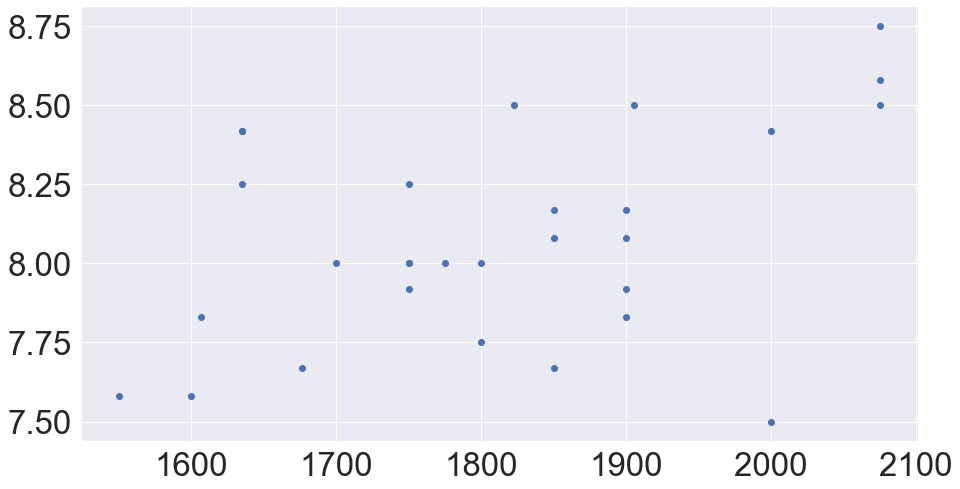

In [75]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Ethiopia']['altitude_mean_meters'],data[data['Country.of.Origin']=='Ethiopia']['Acidity'])

In [76]:
for i in range(0,len(data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity')) ):
    if np.isnan(data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity').iloc[i,19]):
        index_cha=data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity').index[i]
        print('원데이터결측인덱스: ',index_cha )
        temp=np.nanmean([data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity').iloc[i-2,19],
                    data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity').iloc[i-1,19],
                    data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity').iloc[i+1,19],
                    data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity').iloc[i+2,19]])
        data.iloc[index_cha,19]=temp
        print('대체값: ', temp)
        print('대체확인:',data.iloc[index_cha,19] )
        print('')
        
data[data['Country.of.Origin']=='Ethiopia'].sort_values('Acidity')

원데이터결측인덱스:  946
대체값:  2050.0
대체확인: 2050.0

원데이터결측인덱스:  1046
대체값:  1931.25
대체확인: 1931.25

원데이터결측인덱스:  171
대체값:  1789.125
대체확인: 1789.125

원데이터결측인덱스:  1080
대체값:  1787.5
대체확인: 1787.5

원데이터결측인덱스:  286
대체값:  1750.0
대체확인: 1750.0

원데이터결측인덱스:  92
대체값:  1758.3333333333333
대체확인: 1758.3333333333333

원데이터결측인덱스:  86
대체값:  1794.4444444444443
대체확인: 1794.4444444444443

원데이터결측인덱스:  36
대체값:  1848.148148148148
대체확인: 1848.148148148148

원데이터결측인덱스:  79
대체값:  1862.037037037037
대체확인: 1862.037037037037

원데이터결측인덱스:  25
대체값:  1875.0
대체확인: 1875.0

원데이터결측인덱스:  57
대체값:  1803.3333333333333
대체확인: 1803.3333333333333

원데이터결측인덱스:  23
대체값:  1765.8333333333333
대체확인: 1765.8333333333333

원데이터결측인덱스:  80
대체값:  1673.3333333333333
대체확인: 1673.3333333333333

원데이터결측인덱스:  16
대체값:  1673.3333333333333
대체확인: 1673.3333333333333



Species Country.of.Origin        Harvest.Year Processing.Method  Aroma  \
946   Arabica          Ethiopia                2016     Natural / Dry   7.42   
1046  Arabica          Ethiopia                2010     Natural / Dry   7.25   
515   Arabica          Ethiopia                2016      Washed / Wet   7.58   
347   Arabica          Ethiopia                2014     Natural / Dry   7.67   
242   Arabica          Ethiopia                2013     Natural / Dry   7.75   
329   Arabica          Ethiopia                2014      Washed / Wet   7.75   
273   Arabica          Ethiopia                2014     Natural / Dry   7.75   
233   Arabica          Ethiopia                2017     Natural / Dry   7.83   
212   Arabica          Ethiopia                2014     Natural / Dry   7.50   
126   Arabica          Ethiopia                2014      Washed / Wet   8.08   
171   Arabica          Ethiopia           2009/2010     Natural / Dry   7.50   
114   Arabica          Ethiopia           2009/2010     Natural / Dry   7.75   
65    Arabica          Ethiopia                2015     Natural / Dry   7.83   
1080  Arabica          Ethiopia                2010     Natural / Dry   7.42   
88    Arabica          Ethiopia                2014     Natural / Dry   8.42   
231   Arabica          Ethiopia                2012     Natural / Dry   7.92   
286   Arabica          Ethiopia                2010     Natural / Dry   7.58   
137   Arabica          Ethiopia           2009/2010     Natural / Dry   7.42   
115   Arabica          Ethiopia           2009/2010     Natural / Dry   7.42   
92    Arabica          Ethiopia                2010     Natural / Dry   7.67   
32    Arabica          Ethiopia                2014     Natural / Dry   8.00   
86    Arabica          Ethiopia                2016     Natural / Dry   7.75   
459   Arabica          Ethiopia  August to December     Natural / Dry   7.75   
36    Arabica          Ethiopia           2009/2010     Natural / Dry   7.92   
79    Arabica          Ethiopia           2009/2010     Natural / Dry   7.83   
54    Arabica          Ethiopia                2014      Washed / Wet   7.83   
18    Arabica          Ethiopia                2014     Natural / Dry   8.17   
68    Arabica          Ethiopia                2015      Washed / Wet   7.75   
25    Arabica          Ethiopia           2009/2010     Natural / Dry   7.83   
57    Arabica          Ethiopia                2017     Natural / Dry   7.83   
23    Arabica          Ethiopia                2013     Natural / Dry   8.42   
13    Arabica          Ethiopia              10-Mar     Natural / Dry   8.25   
48    Arabica          Ethiopia           2009/2010     Natural / Dry   7.75   
80    Arabica          Ethiopia           2009/2010     Natural / Dry   7.92   
16    Arabica          Ethiopia           2009/2010     Natural / Dry   8.17   
7     Arabica          Ethiopia              10-Mar     Natural / Dry   8.67   
6     Arabica          Ethiopia              10-Mar     Natural / Dry   8.25   
2     Arabica          Ethiopia                2014     Natural / Dry   8.17   
9     Arabica          Ethiopia                2014     Natural / Dry   8.17   
8     Arabica          Ethiopia                2014     Natural / Dry   8.08   
3     Arabica          Ethiopia                2014      Washed / Wet   8.25   
1     Arabica          Ethiopia                2014      Washed / Wet   8.75   
0     Arabica          Ethiopia                2014      Washed / Wet   8.67   

      Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  \
946     7.33        7.17     7.33  7.42     7.17       10.00      10.00   
1046    7.25        7.25     7.33  7.50     8.00        9.33       9.33   
515     7.58        7.50     7.50  7.58     7.58       10.00      10.00   
347     7.75        7.50     7.58  7.75     7.67       10.00      10.00   
242     7.75        7.50     7.58  7.67     7.92       10.00      10.00   
329     7.67        7.58     7.67  

In [77]:
data[data['Country.of.Origin']=='Ethiopia'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

alti결측행개수: 26


(array([14.,  0.,  0.,  0.,  0.,  1., 19., 24., 16., 28.]),
 array([1.0000e+00, 1.3090e+02, 2.6080e+02, 3.9070e+02, 5.2060e+02,
        6.5050e+02, 7.8040e+02, 9.1030e+02, 1.0402e+03, 1.1701e+03,
        1.3000e+03]),
 <BarContainer object of 10 artists>)

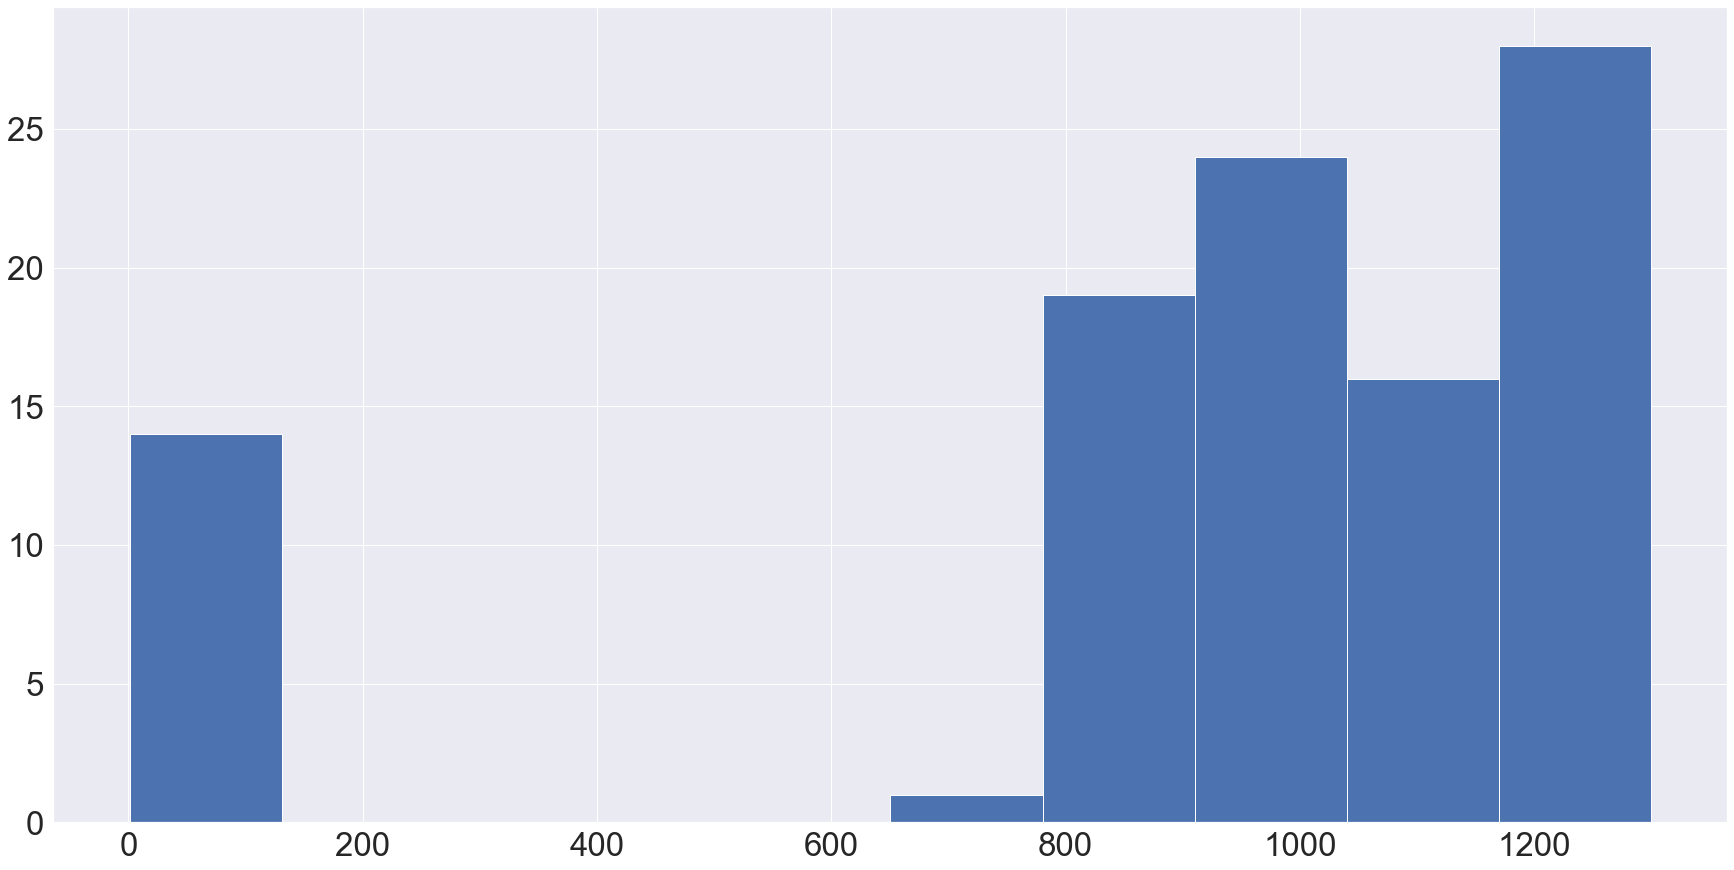

In [78]:
#브라질 alt결측치 확인
plt.figure(figsize=(30,15))
plt.rc('font', size=20)
print("alti결측행개수:",data[data['Country.of.Origin']=='Brazil']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Brazil']['altitude_mean_meters'],bins=10)

In [79]:
data[data['Country.of.Origin']=='Brazil'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Clean.Cup             0.040129  0.207420    0.229265 -0.025254 -0.040646   
Sweetness            -0.065787 -0.151225   -0.087160 -0.169002 -0.236012   
Uniformity            0.196075  0.372494    0.334393  0.211033  0.147822   
Body                  0.595206  0.630478    0.543542  0.580178  1.000000   
Cupper.Points         0.584998  0.693815    0.685825  0.528657  0.586695   
Category.One.Defects -0.041119 -0.087056   -0.043968 -0.089820 -0.049878   
Balance               0.590684  0.694116    0.684152  0.570265  0.531574   
Quakers              -0.125138 -0.153654    0.002119 -0.041464 -0.168577   
Total.Cup.Points      0.702529  0.820390    0.794620  0.632047  0.577885   
Category.Two.Defects -0.209239 -0.207801   -0.149426 -0.179166 -0.080592   
Flavor                0.739971  1.000000    0.783761  0.692100  0.630478   
Acidity               0.681391  0.692100    0.597632  1.000000  0.580178   
Aftertaste            0.686150  0.783761    1.000000  0.597632  0.543542   
Aroma                 1.000000  0.739971    0.686150  0.681391  0.595206   
Moisture              0.070535 -0.004310    0.021611  0.013031 -0.031082   
altitude_mean_meters  0.256463  0.133657    0.165264  0.150774 -0.064833   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Clean.Cup             0.189322    0.720123   1.000000   0.000854   
Sweetness            -0.197456    0.034606   0.000854   1.000000   
Uniformity            0.383435    1.000000   0.720123   0.034606   
Body                  0.531574    0.147822  -0.040646  -0.236012   
Cupper.Points         0.679418    0.382994   0.243263  -0.149762   
Category.One.Defects -0.045943   -0.065138   0.033042  -0.142035   
Balance               1.000000    0.383435   0.189322  -0.197456   
Quakers              -0.077905   -0.040837  -0.013572   0.051493   
Total.Cup.Points      0.749323    0.707641   0.563935   0.014807   
Category.Two.Defects -0.210439   -0.618457  -0.414399   0.062826   
Flavor                0.694116    0.372494   0.207420  -0.151225   
Acidity               0.570265    0.211033  -0.025254  -0.169002   
Aftertaste            0.684152    0.334393   0.229265  -0.087160   
Aroma                 0.590684    0.196075   0.040129  -0.065787   
Moisture             -0.147287   -0.020845  -0.034789  -0.014985   
altitude_mean_meters -0.015606   -0.068823  -0.112543  -0.076965   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Clean.Cup                  0.243263          0.563935 -0.034789   
Sweetness                 -0.149762          0.014807 -0.014985   
Uniformity                 0.382994          0.707641 -0.020845   
Body                       0.586695          0.577885 -0.031082   
Cupper.Points              1.000000          0.776149 -0.189908   
Category.One.Defects      -0.090335         -0.085012  0.006906   
Balance                    0.679418          0.749323 -0.147287   
Quakers                    0.028524         -0.075675  0.050804   
Total.Cup.Points           0.776149          1.000000 -0.054226   
Category.Two.Defects      -0.257064         -0.423481  0.126547   
Flavor                     0.693815          0.820390 -0.004310   
Acidity                    0.528657          0.632047  0.013031   
Aftertaste                 0.685825          0.794620  0.021611   
Aroma                      0.584998          0.702529  0.070535   
Moisture                  -0.189908         -0.054226  1.000000   
altitude_mean_meters      -0.042128          0.045534  0.467237   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Clean.Cup                         0.033042 -0.013572             -0.414399   
Sweetness                        -0.142035  0.051493              0.062826   
Uniformity                       -0.065138 -0.040837             -0.618457   
Body                             -0.049878 -0.168577             -0.080592   
Cupper.Points                    -0.090335  0

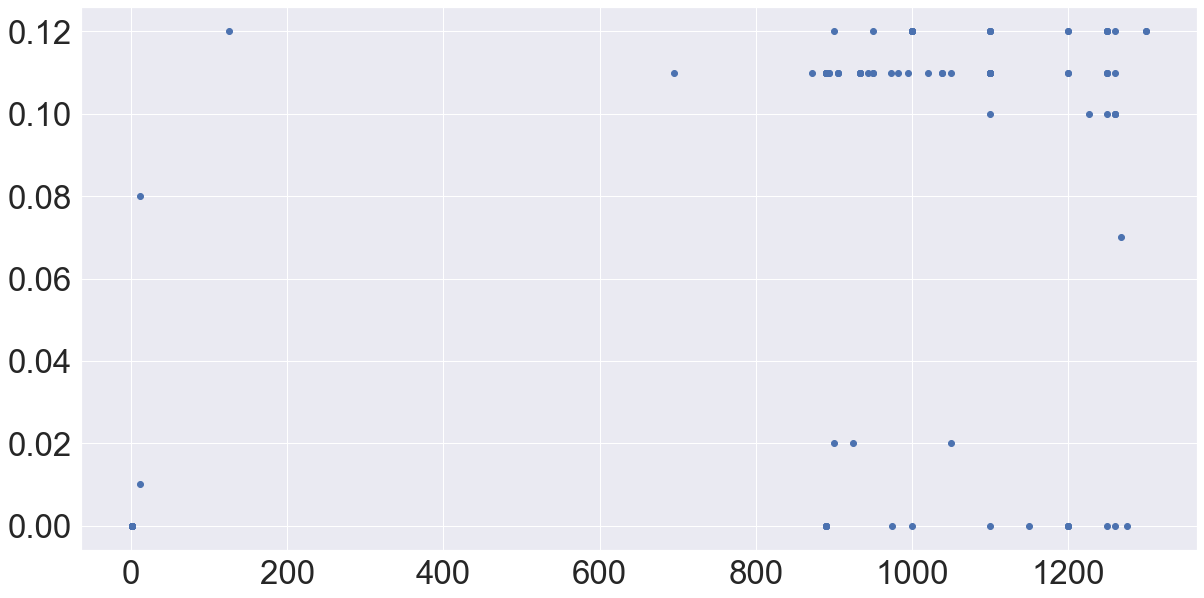

In [80]:
#acidity-altitude
plt.figure(figsize=(20,10))
plt.scatter(data[data['Country.of.Origin']=='Brazil']['altitude_mean_meters'],data[data['Country.of.Origin']=='Brazil']['Moisture'])

In [81]:
for i in range(0,len(data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects')) ):
    
    if np.isnan(data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i,19]):
        
        index_cha=data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').index[i]
        print('원데이터결측인덱스: ',index_cha )
        
        if (i==len(data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects'))-2):
                    temp=np.nanmean([data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i-2,19],
                        data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i-1,19],
                        data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i+1,19]])
                    data.iloc[index_cha,19]=temp
                    print('대체값: ', temp)
                    print('대체확인:',data.iloc[index_cha,19] )
                    print('')
                    continue
        
        if (i==len(data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects'))-1):
                    temp=np.nanmean([data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i-2,19],
                        data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i-1,19]])
                    data.iloc[index_cha,19]=temp
                    print('대체값: ', temp)
                    print('대체확인:',data.iloc[index_cha,19] )
                    print('')
                    continue
        
        temp=np.nanmean([data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i-2,19],
                    data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i-1,19],
                    data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i+1,19],
                    data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects').iloc[i+2,19]])
        data.iloc[index_cha,19]=temp
        print('대체값: ', temp)
        print('대체확인:',data.iloc[index_cha,19] )
        print('')
        
data[data['Country.of.Origin']=='Brazil'].sort_values('Category.Two.Defects')

원데이터결측인덱스:  653
대체값:  840.3333333333334
대체확인: 840.3333333333334

원데이터결측인덱스:  1237
대체값:  1157.0833333333335
대체확인: 1157.0833333333335

원데이터결측인덱스:  163
대체값:  847.375
대체확인: 847.375

원데이터결측인덱스:  965
대체값:  862.75
대체확인: 862.75

원데이터결측인덱스:  995
대체값:  975.0
대체확인: 975.0

원데이터결측인덱스:  725
대체값:  1.0
대체확인: 1.0

원데이터결측인덱스:  829
대체값:  1.0
대체확인: 1.0

원데이터결측인덱스:  734
대체값:  250.75
대체확인: 250.75

원데이터결측인덱스:  4
대체값:  1175.0
대체확인: 1175.0

원데이터결측인덱스:  610
대체값:  708.3333333333334
대체확인: 708.3333333333334

원데이터결측인덱스:  674
대체값:  914.5833333333334
대체확인: 914.5833333333334

원데이터결측인덱스:  1192
대체값:  992.5
대체확인: 992.5

원데이터결측인덱스:  942
대체값:  667.3333333333334
대체확인: 667.3333333333334

원데이터결측인덱스:  959
대체값:  744.8333333333334
대체확인: 744.8333333333334

원데이터결측인덱스:  403
대체값:  1085.0
대체확인: 1085.0

원데이터결측인덱스:  162
대체값:  1158.3333333333333
대체확인: 1158.3333333333333

원데이터결측인덱스:  1170
대체값:  1085.8333333333333
대체확인: 1085.8333333333333

원데이터결측인덱스:  370
대체값:  1066.6666666666667
대체확인: 1066.6666666666667

원데이터결측인덱스:  1218
대체값:  1066.88888

Species Country.of.Origin Harvest.Year          Processing.Method  \
655   Arabica            Brazil    2015/2016              Natural / Dry   
511   Arabica            Brazil  2017 / 2018              Natural / Dry   
587   Arabica            Brazil    2015/2016              Natural / Dry   
635   Arabica            Brazil    2013/2014  Semi-washed / Semi-pulped   
653   Arabica            Brazil         2016              Natural / Dry   
...       ...               ...          ...                        ...   
465   Arabica            Brazil         2015              Natural / Dry   
915   Arabica            Brazil    2015/2016              Natural / Dry   
679   Arabica            Brazil  2016 / 2017              Natural / Dry   
210   Arabica            Brazil         2015              Natural / Dry   
1247  Arabica            Brazil  2017 / 2018              Natural / Dry   

      Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  \
655    7.17    7.83        7.33     7.50  7.75     7.42        10.0   
511    7.67    7.58        7.50     7.58  7.58     7.50        10.0   
587    7.58    7.50        7.42     7.67  7.50     7.50        10.0   
635    7.42    7.50        7.67     7.33  7.42     7.67        10.0   
653    7.42    7.50        7.33     7.50  7.25     7.42        10.0   
...     ...     ...         ...      ...   ...      ...         ...   
465    7.42    7.67        7.58     7.50  7.75     7.67        10.0   
915    7.25    7.33        7.33     7.33  7.33     7.42        10.0   
679    7.42    7.42        7.42     7.50  7.50     7.58        10.0   
210    7.67    7.75        7.75     7.67  7.83     7.75        10.0   
1247   7.00    7.00        6.83     7.00  7.33     6.83         6.0   

      Clean.Cup  Sweetness  Cupper.Points  Total.Cup.Points  Moisture  \
655        10.0       10.0           7.42             82.42      0.00   
511        10.0       10.0           7.50             82.92      0.00   
587        10.0       10.0           7.50             82.67      0.00   
635        10.0       10.0           7.50             82.50      0.11   
653        10.0       10.0           8.00             82.42      0.11   
...         ...        ...            ...               ...       ...   
465        10.0       10.0           7.50             83.08      0.11   
915        10.0       10.0           7.33             81.33      0.11   
679        10.0       10.0           7.50             82.33      0.11   
210        10.0       10.0           7.75             84.17      0.00   
1247        6.0       10.0           6.67             70.67      0.11   

      Category.One.Defects  Quakers  Category.Two.Defects  \
655                      0      0.0                     0   
511                      0      0.0                     0   
587                      0      0.0                     0   
635                      0      0.0                     0   
653                      0      1.0                     0   
...                    ...      ...                   ...   
465                      0      0.0                    13   
915                      0      0.0                    14   
679                      0      4.0                    14   
210                      0      0.0                    16   
1247                     0      1.0                    55   

      altitude_mean_meters  
655               1.000000  
511             890.000000  
587               1.000000  
635            1260.000000  
653             840.333333  
...                    ...  
465             942.111111  
915            1100.000000  
679            1064.037037  
210            1150.000000  
1247           1107.018519  

[128 rows x 20 columns]

In [82]:
data[data['Country.of.Origin']=='Brazil'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

alti결측행개수: 7


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1200., 1220., 1240., 1260., 1280., 1300., 1320., 1340., 1360.,
        1380., 1400.]),
 <BarContainer object of 10 artists>)

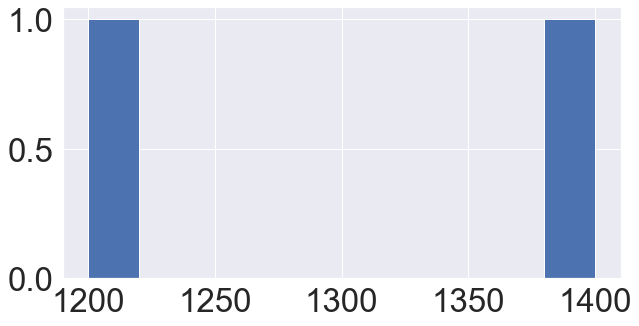

In [83]:
#페루 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("alti결측행개수:",data[data['Country.of.Origin']=='Peru']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Peru']['altitude_mean_meters'],bins=10)

In [84]:
data[data['Country.of.Origin']=='Peru'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Flavor                0.815975  1.000000    0.962651  0.976250  0.671253   
Aftertaste            0.869272  0.962651    1.000000  0.988674  0.623968   
Acidity               0.826921  0.976250    0.988674  1.000000  0.653581   
Balance               0.700839  0.913367    0.847847  0.884341  0.778111   
Cupper.Points         0.765925  0.971922    0.961649  0.967569  0.618706   
Category.One.Defects -0.209613  0.169866    0.044690  0.071193  0.142787   
Category.Two.Defects -0.336765 -0.053873   -0.200748 -0.157848  0.027340   
Aroma                 1.000000  0.815975    0.869272  0.826921  0.721156   
Body                  0.721156  0.671253    0.623968  0.653581  1.000000   
Clean.Cup             0.258243 -0.038267    0.140589  0.079664 -0.218058   
Total.Cup.Points      0.824462  0.758581    0.857154  0.818480  0.387905   
altitude_mean_meters  1.000000 -1.000000   -1.000000 -1.000000  1.000000   
Uniformity            0.470929  0.424395    0.509466  0.430697 -0.125599   
Sweetness             0.208902  0.234260    0.351712  0.320774 -0.346830   
Moisture              0.220306  0.207920    0.241094  0.228478 -0.040833   
Quakers               0.205989 -0.120302   -0.015445 -0.103055 -0.159393   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Flavor                0.913367    0.424395  -0.038267   0.234260   
Aftertaste            0.847847    0.509466   0.140589   0.351712   
Acidity               0.884341    0.430697   0.079664   0.320774   
Balance               1.000000    0.167887  -0.229385  -0.036808   
Cupper.Points         0.920531    0.477743  -0.019324   0.286812   
Category.One.Defects  0.235859   -0.296889  -0.823218  -0.474671   
Category.Two.Defects -0.076934   -0.492277  -0.683265  -0.531105   
Aroma                 0.700839    0.470929   0.258243   0.208902   
Body                  0.778111   -0.125599  -0.218058  -0.346830   
Clean.Cup            -0.229385    0.631894   1.000000   0.762181   
Total.Cup.Points      0.573041    0.779041   0.610762   0.682163   
altitude_mean_meters -1.000000         NaN   1.000000        NaN   
Uniformity            0.167887    1.000000   0.631894   0.829061   
Sweetness            -0.036808    0.829061   0.762181   1.000000   
Moisture              0.016712    0.738289   0.571451   0.749758   
Quakers              -0.208905    0.350808   0.144039   0.188982   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Flavor                     0.971922          0.758581  0.207920   
Aftertaste                 0.961649          0.857154  0.241094   
Acidity                    0.967569          0.818480  0.228478   
Balance                    0.920531          0.573041  0.016712   
Cupper.Points              1.000000          0.769105  0.257859   
Category.One.Defects       0.196370         -0.379625 -0.306047   
Category.Two.Defects      -0.151855         -0.528395 -0.429229   
Aroma                      0.765925          0.824462  0.220306   
Body                       0.618706          0.387905 -0.040833   
Clean.Cup                 -0.019324          0.610762  0.571451   
Total.Cup.Points           0.769105          1.000000  0.561628   
altitude_mean_meters      -1.000000          1.000000       NaN   
Uniformity                 0.477743          0.779041  0.738289   
Sweetness                  0.286812          0.682163  0.749758   
Moisture                   0.257859          0.561628  1.000000   
Quakers                   -0.053941          0.092837  0.247959   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Flavor                            0.169866 -0.120302             -0.053873   
Aftertaste                        0.044690 -0.015445             -0.200748   
Acidity                           0.071193 -0.103055             -0.157848   
Balance                           0.235859 -0.208905             -0.076934   
Cupper.Points                     0.196370 -0

In [85]:
#페루는 결측치행이 대부분이라 삭제
index_del_peru=data[ (data['Country.of.Origin']=='Peru') & data['altitude_mean_meters'].isnull()  ].index
data.drop(index_del_peru,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
0     Arabica          Ethiopia         2014      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia         2014      Washed / Wet   8.75    8.67   
2     Arabica          Ethiopia         2014     Natural / Dry   8.17    8.58   
3     Arabica          Ethiopia         2014      Washed / Wet   8.25    8.50   
4     Arabica            Brazil         2013     Natural / Dry   8.58    8.42   
...       ...               ...          ...               ...    ...     ...   
1270  Robusta             India         2013     Natural / Dry   7.58    7.42   
1271  Robusta     United States         2012     Natural / Dry   7.92    7.50   
1272  Robusta     United States         2014     Natural / Dry   7.33    7.33   
1273  Robusta             India         2013     Natural / Dry   7.42    6.83   
1274  Robusta           Vietnam         2013     Natural / Dry   6.75    6.67   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0           8.67     8.75  8.50     8.42       10.00      10.00      10.00   
1           8.50     8.58  8.42     8.42       10.00      10.00      10.00   
2           8.42     8.42  8.50     8.25       10.00      10.00      10.00   
3           8.25     8.50  8.42     8.33       10.00      10.00      10.00   
4           8.42     8.50  8.25     8.33       10.00      10.00      10.00   
...          ...      ...   ...      ...         ...        ...        ...   
1270        7.42     7.83  7.42     7.50       10.00      10.00       7.42   
1271        7.42     7.42  7.42     7.42        9.33      10.00       7.58   
1272        7.17     7.42  7.50     7.17        9.33       9.33       7.42   
1273        6.75     7.17  7.25     7.00        9.33       9.33       7.08   
1274        6.50     6.83  6.92     6.83        9.33       9.33       6.67   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1270           7.58             80.17      0.00                     0   
1271           7.33             79.33      0.00                     0   
1272           7.17             77.17      0.00                     0   
1273           6.92             75.08      0.10                    20   
1274           7.92             73.75      0.12                    63   

      Quakers  Category.Two.Defects  altitude_mean_meters  
0         0.0                     0                2075.0  
1         0.0                     1                2075.0  
2         0.0                     2                2000.0  
3         0.0                     2                2075.0  
4         0.0                     1                1175.0  
...       ...                   ...                   ...  
1270      0.0                     0                 750.0  
1271      0.0                     0                3000.0  
1272      0.0                     6                 795.0  
1273      0.0                     1                   NaN  
1274      0.0                     9                   NaN  

[1275 rows x 20 columns]

In [86]:
data[data['Country.of.Origin']=='Peru']

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
1140  Arabica              Peru         2012      Washed / Wet   7.67    7.17   
1197  Arabica              Peru         2014      Washed / Wet   7.42    7.75   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
1140        7.08     7.25  8.00     7.50        8.67       9.33       9.33   
1197        7.42     7.67  7.92     7.83        8.67       5.33       9.33   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
1140           7.00              79.0       0.0                     0   
1197           7.67              77.0       0.0                     7   

      Quakers  Category.Two.Defects  altitude_mean_meters  
1140      0.0                     4                1400.0  
1197      0.0                     9                1200.0

alti결측행개수: 0


(array([3., 2., 0., 0., 2., 1., 3., 2., 2., 1.]),
 array([1100., 1175., 1250., 1325., 1400., 1475., 1550., 1625., 1700.,
        1775., 1850.]),
 <BarContainer object of 10 artists>)

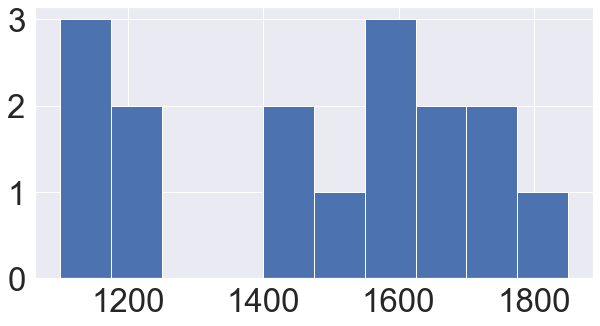

In [87]:
#중국 PM결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("alti결측행개수:",data[data['Country.of.Origin']=='China']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='China']['altitude_mean_meters'],bins=10)

alti결측행개수: 5


(array([ 3.,  0.,  0.,  0.,  0.,  1., 23.,  1.,  4., 12.]),
 array([  13. ,  201.7,  390.4,  579.1,  767.8,  956.5, 1145.2, 1333.9,
        1522.6, 1711.3, 1900. ]),
 <BarContainer object of 10 artists>)

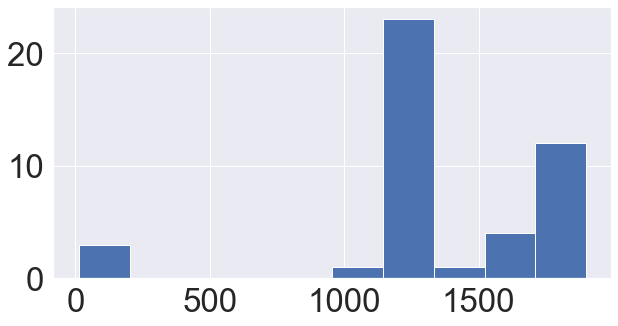

In [88]:
#코스타리카 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("alti결측행개수:",data[data['Country.of.Origin']=='Costa Rica']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Costa Rica']['altitude_mean_meters'],bins=10)

In [89]:
data[data['Country.of.Origin']=='Costa Rica'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Moisture             -0.207518 -0.157663   -0.209641 -0.222041 -0.178064   
Category.Two.Defects -0.254173 -0.125350   -0.174322  0.173479  0.045405   
Sweetness             0.180489 -0.021797   -0.049409 -0.243597  0.049652   
Aroma                 1.000000  0.742041    0.696387  0.511962  0.670557   
Aftertaste            0.696387  0.838855    1.000000  0.695451  0.695813   
Clean.Cup             0.570253  0.483248    0.518676  0.289582  0.431399   
Balance               0.633694  0.635191    0.636493  0.676927  0.640547   
Body                  0.670557  0.719567    0.695813  0.648339  1.000000   
Acidity               0.511962  0.699106    0.695451  1.000000  0.648339   
Cupper.Points         0.766211  0.789126    0.781447  0.712584  0.759848   
Flavor                0.742041  1.000000    0.838855  0.699106  0.719567   
Category.One.Defects -0.144632 -0.058016   -0.140226 -0.060172 -0.113120   
Quakers               0.018315  0.067496   -0.007497  0.028455  0.064849   
Total.Cup.Points      0.830122  0.840674    0.804493  0.675824  0.770708   
Uniformity           -0.019891  0.073467   -0.045945  0.002385 -0.098881   
altitude_mean_meters  0.035302  0.168531    0.079164  0.164285  0.127100   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Moisture             -0.222432   -0.086069  -0.069618   0.058917   
Category.Two.Defects -0.043305   -0.134884  -0.227511  -0.646495   
Sweetness            -0.140016   -0.051074  -0.048187   1.000000   
Aroma                 0.633694   -0.019891   0.570253   0.180489   
Aftertaste            0.636493   -0.045945   0.518676  -0.049409   
Clean.Cup             0.465827    0.277738   1.000000  -0.048187   
Balance               1.000000    0.169050   0.465827  -0.140016   
Body                  0.640547   -0.098881   0.431399   0.049652   
Acidity               0.676927    0.002385   0.289582  -0.243597   
Cupper.Points         0.583576   -0.068887   0.447416   0.077407   
Flavor                0.635191    0.073467   0.483248  -0.021797   
Category.One.Defects -0.007579    0.001019   0.035910  -0.576917   
Quakers               0.044193    0.073238   0.069098   0.055298   
Total.Cup.Points      0.763396    0.295492   0.712784   0.159952   
Uniformity            0.169050    1.000000   0.277738  -0.051074   
altitude_mean_meters  0.119341    0.408445   0.111952   0.026250   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Moisture                  -0.209174         -0.212359  1.000000   
Category.Two.Defects      -0.163312         -0.286320 -0.041523   
Sweetness                  0.077407          0.159952  0.058917   
Aroma                      0.766211          0.830122 -0.207518   
Aftertaste                 0.781447          0.804493 -0.209641   
Clean.Cup                  0.447416          0.712784 -0.069618   
Balance                    0.583576          0.763396 -0.222432   
Body                       0.759848          0.770708 -0.178064   
Acidity                    0.712584          0.675824 -0.222041   
Cupper.Points              1.000000          0.821876 -0.209174   
Flavor                     0.789126          0.840674 -0.157663   
Category.One.Defects      -0.209440         -0.206952  0.056834   
Quakers                   -0.066456          0.062948 -0.135578   
Total.Cup.Points           0.821876          1.000000 -0.212359   
Uniformity                -0.068887          0.295492 -0.086069   
altitude_mean_meters       0.166900          0.243742 -0.294720   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Moisture                          0.056834 -0.135578             -0.041523   
Category.Two.Defects              0.479279  0.152266              1.000000   
Sweetness                        -0.576917  0.055298             -0.646495   
Aroma                            -0.144632  0.018315             -0.254173   
Aftertaste                       -0.140226 -0

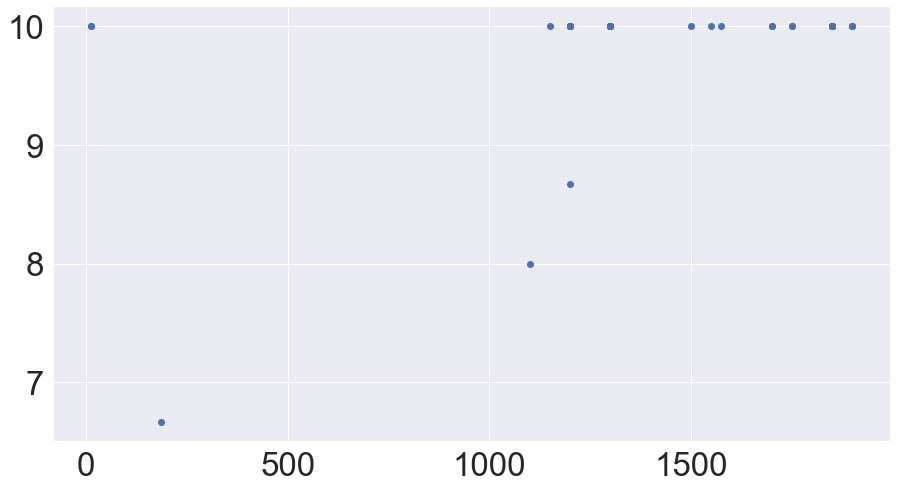

In [90]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Costa Rica']['altitude_mean_meters'],data[data['Country.of.Origin']=='Costa Rica']['Uniformity'])

In [91]:
for i in range(0,len(data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity')) ):
    if np.isnan(data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity').iloc[i,19]):
        index_cha=data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity').index[i]
        print('원데이터결측인덱스: ',index_cha )
        temp=np.nanmean([data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity').iloc[i-2,19],
                    data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity').iloc[i-1,19],
                    data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity').iloc[i+1,19],
                    data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity').iloc[i+2,19]])
        data.iloc[index_cha,19]=temp
        print('대체값: ', temp)
        print('대체확인:',data.iloc[index_cha,19] )
        print('')
        
data[data['Country.of.Origin']=='Costa Rica'].sort_values('Uniformity')

원데이터결측인덱스:  692
대체값:  1337.5
대체확인: 1337.5

원데이터결측인덱스:  1129
대체값:  1500.0
대체확인: 1500.0

원데이터결측인덱스:  397
대체값:  1425.0
대체확인: 1425.0

원데이터결측인덱스:  127
대체값:  1431.25
대체확인: 1431.25

원데이터결측인덱스:  230
대체값:  1675.0
대체확인: 1675.0



Species Country.of.Origin Harvest.Year          Processing.Method  \
1003  Arabica        Costa Rica         2015               Washed / Wet   
1091  Arabica        Costa Rica         2013               Washed / Wet   
1181  Arabica        Costa Rica         2014               Washed / Wet   
692   Arabica        Costa Rica         2012               Washed / Wet   
488   Arabica        Costa Rica         2013               Washed / Wet   
558   Arabica        Costa Rica         2016               Washed / Wet   
612   Arabica        Costa Rica         2013               Washed / Wet   
676   Arabica        Costa Rica         2015               Washed / Wet   
677   Arabica        Costa Rica         2015               Washed / Wet   
745   Arabica        Costa Rica         2015               Washed / Wet   
749   Arabica        Costa Rica         2013               Washed / Wet   
767   Arabica        Costa Rica         2013               Washed / Wet   
19    Arabica        Costa Rica         2014               Washed / Wet   
463   Arabica        Costa Rica         2014               Washed / Wet   
844   Arabica        Costa Rica         2013               Washed / Wet   
858   Arabica        Costa Rica         2015               Washed / Wet   
875   Arabica        Costa Rica         2014               Washed / Wet   
929   Arabica        Costa Rica         2015               Washed / Wet   
935   Arabica        Costa Rica         2014               Washed / Wet   
945   Arabica        Costa Rica         2014               Washed / Wet   
996   Arabica        Costa Rica         2014               Washed / Wet   
1129  Arabica        Costa Rica         2012               Washed / Wet   
798   Arabica        Costa Rica         2016     Pulped natural / honey   
806   Arabica        Costa Rica         2015               Washed / Wet   
397   Arabica        Costa Rica         2015               Washed / Wet   
388   Arabica        Costa Rica         2013               Washed / Wet   
30    Arabica        Costa Rica    2015/2016               Washed / Wet   
73    Arabica        Costa Rica         2014               Washed / Wet   
74    Arabica        Costa Rica         2014               Washed / Wet   
93    Arabica        Costa Rica         2016               Washed / Wet   
121   Arabica        Costa Rica         2015               Washed / Wet   
123   Arabica        Costa Rica         2014               Washed / Wet   
125   Arabica        Costa Rica         2014                      Other   
126   Arabica        Costa Rica         2014               Washed / Wet   
127   Arabica        Costa Rica         2012               Washed / Wet   
145   Arabica        Costa Rica         2012  Semi-washed / Semi-pulped   
149   Arabica        Costa Rica  2017 / 2018               Washed / Wet   
152   Arabica        Costa Rica         2014               Washed / Wet   
162   Arabica        Costa Rica         2016               Washed / Wet   
202   Arabica        Costa Rica         2016               Washed / Wet   
209   Arabica        Costa Rica         2014               Washed / Wet   
230   Arabica        Costa Rica         2017               Washed / Wet   
266   Arabica        Costa Rica         2015               Washed / Wet   
273   Arabica        Costa Rica         2013               Washed / Wet   
339   Arabica        Costa Rica         2015               Washed / Wet   
362   Arabica        Costa Rica         2016               Washed / Wet   
386   Arabica        Costa Rica         2014               Washed / Wet   
396   Arabica        Costa Rica         2016     Pulped natural / honey   
1236  Arabica        Costa Rica         2014               Washed / Wet   

      Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  \
1003   7.83    7.50        7.67     7.67  7.83     7.50        6.67   
1091   7.58    7.50        7.67     7.75  7.67     7.58        8.00   
1181   7.50    7.25        7.42     7.00  

In [92]:
data[data['Country.of.Origin']=='Costa Rica'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

alti결측행개수: 4


(array([ 2.,  0.,  3.,  3., 13., 24., 84., 56., 33., 14.]),
 array([  12. ,  190.8,  369.6,  548.4,  727.2,  906. , 1084.8, 1263.6,
        1442.4, 1621.2, 1800. ]),
 <BarContainer object of 10 artists>)

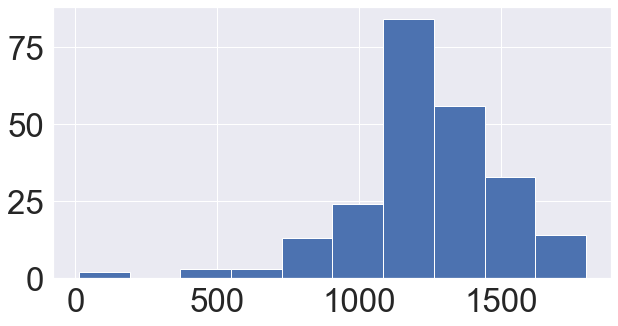

In [93]:
#멕시코 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("alti결측행개수:",data[data['Country.of.Origin']=='Mexico']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Mexico']['altitude_mean_meters'],bins=10)

In [94]:
data[data['Country.of.Origin']=='Mexico'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Category.Two.Defects -0.271030 -0.304953   -0.333257 -0.202272 -0.108110   
Moisture              0.009112 -0.090820   -0.122797 -0.146629 -0.114060   
Uniformity            0.122874  0.112083    0.151275  0.152925  0.015385   
Category.One.Defects -0.112554 -0.071090   -0.099913 -0.111921 -0.035940   
Quakers               0.046674  0.014548   -0.029370  0.005779  0.057727   
Balance               0.607365  0.760513    0.775517  0.608365  0.568785   
Sweetness             0.042723  0.041650    0.082555  0.107754  0.059264   
Cupper.Points         0.724253  0.878984    0.866345  0.686049  0.586122   
Body                  0.489988  0.574399    0.591481  0.557864  1.000000   
Aftertaste            0.745261  0.908595    1.000000  0.701857  0.591481   
Total.Cup.Points      0.708537  0.823134    0.839758  0.672998  0.522948   
Flavor                0.777891  1.000000    0.908595  0.726803  0.574399   
Aroma                 1.000000  0.777891    0.745261  0.620707  0.489988   
Clean.Cup             0.297640  0.385476    0.406627  0.220017  0.116403   
Acidity               0.620707  0.726803    0.701857  1.000000  0.557864   
altitude_mean_meters  0.054518  0.052603    0.030178  0.139125  0.024478   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Category.Two.Defects -0.208310   -0.034868  -0.275929   0.064889   
Moisture             -0.164011    0.071768   0.004862   0.127116   
Uniformity            0.163695    1.000000   0.212230   0.102777   
Category.One.Defects -0.082946   -0.179007  -0.137785  -0.002483   
Quakers              -0.029457    0.043797   0.029016   0.013192   
Balance               1.000000    0.163695   0.300127   0.086827   
Sweetness             0.086827    0.102777   0.027565   1.000000   
Cupper.Points         0.802145    0.160480   0.382690   0.061993   
Body                  0.568785    0.015385   0.116403   0.059264   
Aftertaste            0.775517    0.151275   0.406627   0.082555   
Total.Cup.Points      0.743670    0.423112   0.730684   0.166975   
Flavor                0.760513    0.112083   0.385476   0.041650   
Aroma                 0.607365    0.122874   0.297640   0.042723   
Clean.Cup             0.300127    0.212230   1.000000   0.027565   
Acidity               0.608365    0.152925   0.220017   0.107754   
altitude_mean_meters -0.008175   -0.099916   0.073392   0.010107   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Category.Two.Defects      -0.255475         -0.317139  0.166673   
Moisture                  -0.075613         -0.048604  1.000000   
Uniformity                 0.160480          0.423112  0.071768   
Category.One.Defects      -0.031728         -0.167068  0.118315   
Quakers                    0.007816          0.029508  0.013368   
Balance                    0.802145          0.743670 -0.164011   
Sweetness                  0.061993          0.166975  0.127116   
Cupper.Points              1.000000          0.826676 -0.075613   
Body                       0.586122          0.522948 -0.114060   
Aftertaste                 0.866345          0.839758 -0.122797   
Total.Cup.Points           0.826676          1.000000 -0.048604   
Flavor                     0.878984          0.823134 -0.090820   
Aroma                      0.724253          0.708537  0.009112   
Clean.Cup                  0.382690          0.730684  0.004862   
Acidity                    0.686049          0.672998 -0.146629   
altitude_mean_meters       0.013393          0.042369 -0.111756   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Category.Two.Defects              0.475386  0.043294              1.000000   
Moisture                          0.118315  0.013368              0.166673   
Uniformity                       -0.179007  0.043797             -0.034868   
Category.One.Defects              1.000000 -0.009865              0.475386   
Quakers                          -0.009865  1

In [95]:
#멕시코는 행개수는 많으나 다른 변수와의 상관성은 적어보여, 평균치로 결측치 처리
index_na_M=data[(data['Country.of.Origin']=='Mexico') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='Mexico']['altitude_mean_meters'])
data[data['Country.of.Origin']=='Mexico'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  36
alti결측행개수: 2


(array([2., 3., 0., 3., 3., 3., 7., 6., 5., 2.]),
 array([1095. , 1180.5, 1266. , 1351.5, 1437. , 1522.5, 1608. , 1693.5,
        1779. , 1864.5, 1950. ]),
 <BarContainer object of 10 artists>)

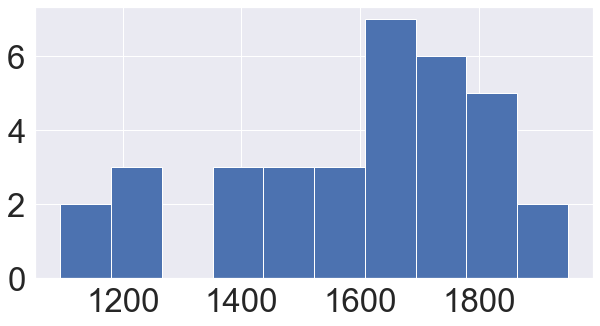

In [96]:
#우간다 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Uganda']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Uganda']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Uganda']['altitude_mean_meters'],bins=10)

In [97]:
data[data['Country.of.Origin']=='Uganda'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Moisture             -0.167953 -0.257302   -0.172747 -0.212172 -0.215604   
Aftertaste            0.642036  0.835455    1.000000  0.640877  0.531001   
Body                  0.286734  0.561536    0.531001  0.466665  1.000000   
Flavor                0.623862  1.000000    0.835455  0.780270  0.561536   
Category.Two.Defects  0.087651 -0.028109   -0.015405 -0.124675  0.070234   
Quakers              -0.138219 -0.058639   -0.099283 -0.112644 -0.204313   
Acidity               0.511200  0.780270    0.640877  1.000000  0.466665   
Cupper.Points         0.565524  0.851379    0.823926  0.719221  0.541328   
Balance               0.475684  0.766651    0.706376  0.751333  0.717609   
Category.One.Defects  0.090883 -0.002583   -0.045222 -0.044398 -0.003832   
Aroma                 1.000000  0.623862    0.642036  0.511200  0.286734   
Total.Cup.Points      0.641757  0.729624    0.599780  0.641465  0.433095   
Sweetness             0.111375 -0.002381   -0.154395 -0.008751 -0.189499   
altitude_mean_meters  0.165170  0.007859   -0.119576  0.055662 -0.095599   
Uniformity                 NaN       NaN         NaN       NaN       NaN   
Clean.Cup                  NaN       NaN         NaN       NaN       NaN   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Moisture             -0.347157         NaN        NaN  -0.162643   
Aftertaste            0.706376         NaN        NaN  -0.154395   
Body                  0.717609         NaN        NaN  -0.189499   
Flavor                0.766651         NaN        NaN  -0.002381   
Category.Two.Defects  0.013023         NaN        NaN   0.036446   
Quakers              -0.175835         NaN        NaN   0.104630   
Acidity               0.751333         NaN        NaN  -0.008751   
Cupper.Points         0.821648         NaN        NaN   0.029168   
Balance               1.000000         NaN        NaN  -0.000709   
Category.One.Defects  0.136479         NaN        NaN   0.137365   
Aroma                 0.475684         NaN        NaN   0.111375   
Total.Cup.Points      0.693850         NaN        NaN   0.615945   
Sweetness            -0.000709         NaN        NaN   1.000000   
altitude_mean_meters  0.082084         NaN        NaN   0.693083   
Uniformity                 NaN         NaN        NaN        NaN   
Clean.Cup                  NaN         NaN        NaN        NaN   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Moisture                  -0.288817         -0.326490  1.000000   
Aftertaste                 0.823926          0.599780 -0.172747   
Body                       0.541328          0.433095 -0.215604   
Flavor                     0.851379          0.729624 -0.257302   
Category.Two.Defects      -0.114118          0.013945  0.099503   
Quakers                   -0.055726         -0.048015  0.053206   
Acidity                    0.719221          0.641465 -0.212172   
Cupper.Points              1.000000          0.730139 -0.288817   
Balance                    0.821648          0.693850 -0.347157   
Category.One.Defects      -0.141709          0.086406 -0.055101   
Aroma                      0.565524          0.641757 -0.167953   
Total.Cup.Points           0.730139          1.000000 -0.326490   
Sweetness                  0.029168          0.615945 -0.162643   
altitude_mean_meters       0.063341          0.478961 -0.234437   
Uniformity                      NaN               NaN       NaN   
Clean.Cup                       NaN               NaN       NaN   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Moisture                         -0.055101  0.053206              0.099503   
Aftertaste                       -0.045222 -0.099283             -0.015405   
Body                             -0.003832 -0.204313              0.070234   
Flavor                           -0.002583 -0.058639             -0.028109   
Category.Two.Defects              0.826810  0

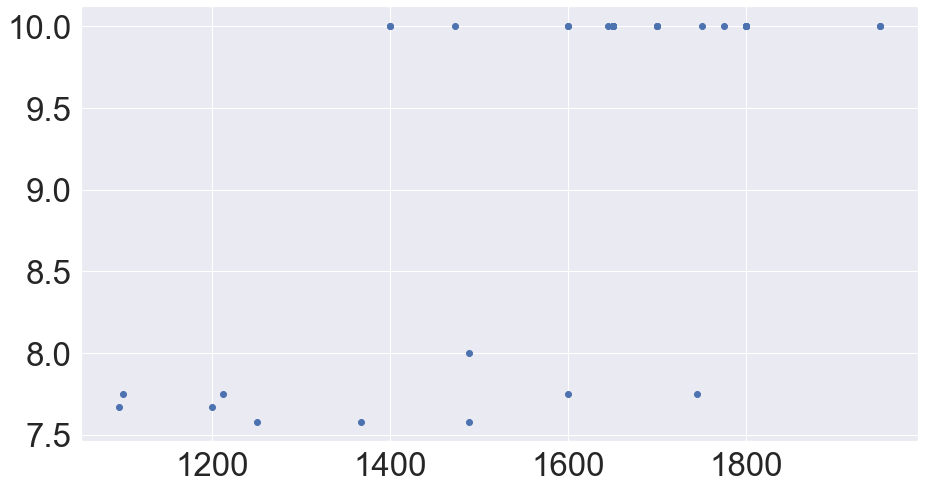

In [98]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Uganda']['altitude_mean_meters'],data[data['Country.of.Origin']=='Uganda']['Sweetness'])

In [99]:
for i in range(0,len(data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness')) ):
    if np.isnan(data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness').iloc[i,19]):
        index_cha=data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness').index[i]
        print('원데이터결측인덱스: ',index_cha )
        temp=np.nanmean([data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness').iloc[i-2,19],
                    data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness').iloc[i-1,19],
                    data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness').iloc[i+1,19],
                    data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness').iloc[i+2,19]])
        data.iloc[index_cha,19]=temp
        print('대체값: ', temp)
        print('대체확인:',data.iloc[index_cha,19] )
        print('')
        
data[data['Country.of.Origin']=='Uganda'].sort_values('Sweetness')

원데이터결측인덱스:  43
대체값:  1762.5
대체확인: 1762.5

원데이터결측인덱스:  399
대체값:  1787.5
대체확인: 1787.5



Species Country.of.Origin Harvest.Year          Processing.Method  \
1263  Robusta            Uganda         2014               Washed / Wet   
1262  Robusta            Uganda         2013               Washed / Wet   
1253  Robusta            Uganda         2013               Washed / Wet   
1268  Robusta            Uganda         2013               Washed / Wet   
1259  Robusta            Uganda         2014               Washed / Wet   
1252  Robusta            Uganda         2013               Washed / Wet   
1267  Robusta            Uganda         2013               Washed / Wet   
1266  Robusta            Uganda         2013               Washed / Wet   
1258  Robusta            Uganda         2014               Washed / Wet   
1249  Robusta            Uganda         2013               Washed / Wet   
476   Arabica            Uganda         2015               Washed / Wet   
961   Arabica            Uganda         2013              Natural / Dry   
611   Arabica            Uganda         2013              Natural / Dry   
589   Arabica            Uganda         2013               Washed / Wet   
518   Arabica            Uganda         2013               Washed / Wet   
517   Arabica            Uganda         2013               Washed / Wet   
485   Arabica            Uganda         2013               Washed / Wet   
477   Arabica            Uganda         2015              Natural / Dry   
25    Arabica            Uganda         2013               Washed / Wet   
364   Arabica            Uganda         2015               Washed / Wet   
43    Arabica            Uganda         2014  Semi-washed / Semi-pulped   
46    Arabica            Uganda         2012               Washed / Wet   
50    Arabica            Uganda         2013              Natural / Dry   
64    Arabica            Uganda         2013               Washed / Wet   
67    Arabica            Uganda         2013               Washed / Wet   
91    Arabica            Uganda         2016               Washed / Wet   
399   Arabica            Uganda         2015               Washed / Wet   
110   Arabica            Uganda         2013              Natural / Dry   
150   Arabica            Uganda         2016               Washed / Wet   
199   Arabica            Uganda         2012              Natural / Dry   
220   Arabica            Uganda         2012               Washed / Wet   
246   Arabica            Uganda         2012               Washed / Wet   
291   Arabica            Uganda         2013              Natural / Dry   
328   Arabica            Uganda         2013               Washed / Wet   
134   Arabica            Uganda         2012               Washed / Wet   
434   Arabica            Uganda         2014               Washed / Wet   

      Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  \
1263   8.00    7.67        7.75     7.50  7.67     7.58        10.0   
1262   8.00    7.75        7.75     7.58  7.67     7.50        10.0   
1253   8.33    7.83        7.83     7.75  8.25     7.75        10.0   
1268   7.75    7.42        7.33     7.58  7.67     7.58        10.0   
1259   7.58    7.92        7.75     7.83  7.50     7.67        10.0   
1252   8.00    7.92        7.92     7.75  7.83     7.75        10.0   
1267   7.83    7.58        7.33     7.67  7.50     7.50        10.0   
1266   7.33    7.58        7.50     7.75  7.75     7.67        10.0   
1258   7.67    7.83        7.83     7.83  7.92     7.75        10.0   
1249   7.83    8.08        7.75     7.92  8.25     7.92        10.0   
476    7.67    7.58        7.42     7.42  7.83     7.50        10.0   
961    7.33    6.92        7.17     7.33  7.42     7.42        10.0   
611    7.83    7.50        7.42     7.58  7.42     7.42        10.0   
589    7.67    7.50        7.33     7.67  7.50     7.50        10.0   
518    7.75    7.58        7.58     7.50  7.50     7.50        10.0   
517    8.00    7.50        7.50     7.58  7.33     7.42        10.0   
485    7.83    7.58    

In [100]:
data[data['Country.of.Origin']=='Uganda'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  53
alti결측행개수: 2


(array([ 1.,  0.,  0., 12., 16., 12.,  6.,  0.,  2.,  2.]),
 array([1200., 1245., 1290., 1335., 1380., 1425., 1470., 1515., 1560.,
        1605., 1650.]),
 <BarContainer object of 10 artists>)

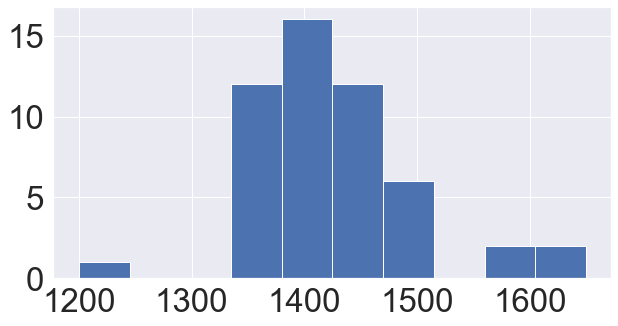

In [101]:
#온두라스 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Honduras']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Honduras']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Honduras']['altitude_mean_meters'],bins=10)

In [102]:
data[data['Country.of.Origin']=='Honduras'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Category.One.Defects -0.072809 -0.031328   -0.060316 -0.031728 -0.042863   
Category.Two.Defects -0.006940  0.015454    0.011322  0.008008 -0.000237   
Aftertaste            0.974653  0.987914    1.000000  0.985385  0.982079   
Acidity               0.982201  0.986835    0.985385  1.000000  0.985030   
Balance               0.969821  0.987288    0.988173  0.984091  0.986551   
Cupper.Points         0.975996  0.985540    0.989362  0.980132  0.981061   
Sweetness             0.952045  0.960620    0.952635  0.954836  0.955400   
Total.Cup.Points      0.983868  0.991876    0.988219  0.988704  0.988234   
Uniformity            0.955994  0.964025    0.955969  0.958289  0.957470   
Body                  0.978855  0.988084    0.982079  0.985030  1.000000   
Clean.Cup             0.956144  0.963609    0.955515  0.957943  0.955772   
Flavor                0.978807  1.000000    0.987914  0.986835  0.988084   
Aroma                 1.000000  0.978807    0.974653  0.982201  0.978855   
Moisture             -0.182951 -0.173198   -0.201457 -0.162157 -0.179593   
Quakers               0.096121  0.139001    0.077446  0.093126  0.121650   
altitude_mean_meters  0.076801  0.063102    0.021555  0.031488  0.056971   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Category.One.Defects -0.038846   -0.040943  -0.039171  -0.042587   
Category.Two.Defects  0.015762   -0.055787  -0.065973  -0.045187   
Aftertaste            0.988173    0.955969   0.955515   0.952635   
Acidity               0.984091    0.958289   0.957943   0.954836   
Balance               1.000000    0.957549   0.956582   0.954731   
Cupper.Points         0.980749    0.951684   0.949577   0.950051   
Sweetness             0.954731    0.997996   0.992140   1.000000   
Total.Cup.Points      0.987849    0.985863   0.984591   0.983244   
Uniformity            0.957549    1.000000   0.998070   0.997996   
Body                  0.986551    0.957470   0.955772   0.955400   
Clean.Cup             0.956582    0.998070   1.000000   0.992140   
Flavor                0.987288    0.964025   0.963609   0.960620   
Aroma                 0.969821    0.955994   0.956144   0.952045   
Moisture             -0.151236   -0.114144  -0.115772  -0.112032   
Quakers               0.129401    0.105677   0.108994   0.101878   
altitude_mean_meters  0.036310    0.051040   0.059066   0.042659   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Category.One.Defects      -0.067670         -0.046844  0.044946   
Category.Two.Defects       0.030570         -0.014072 -0.233156   
Aftertaste                 0.989362          0.988219 -0.201457   
Acidity                    0.980132          0.988704 -0.162157   
Balance                    0.980749          0.987849 -0.151236   
Cupper.Points              1.000000          0.985270 -0.203780   
Sweetness                  0.950051          0.983244 -0.112032   
Total.Cup.Points           0.985270          1.000000 -0.156959   
Uniformity                 0.951684          0.985863 -0.114144   
Body                       0.981061          0.988234 -0.179593   
Clean.Cup                  0.949577          0.984591 -0.115772   
Flavor                     0.985540          0.991876 -0.173198   
Aroma                      0.975996          0.983868 -0.182951   
Moisture                  -0.203780         -0.156959  1.000000   
Quakers                    0.132449          0.111625 -0.033651   
altitude_mean_meters       0.036367          0.048521  0.106719   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Category.One.Defects              1.000000 -0.080988              0.380078   
Category.Two.Defects              0.380078  0.081064              1.000000   
Aftertaste                       -0.060316  0.077446              0.011322   
Acidity                          -0.031728  0.093126              0.008008   
Balance                          -0.038846  0

In [103]:
#온두라스는 상관관계가 뚜렷한 변수가 없고 결측치 비율이 적으므로 대표값(평균)으로 대체
index_na_M=data[(data['Country.of.Origin']=='Honduras') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='Honduras']['altitude_mean_meters'])
data[data['Country.of.Origin']=='Honduras'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  75
alti결측행개수: 5


(array([ 4.,  7.,  3.,  1., 13., 11., 10.,  9.,  2., 10.]),
 array([  50.,  175.,  300.,  425.,  550.,  675.,  800.,  925., 1050.,
        1175., 1300.]),
 <BarContainer object of 10 artists>)

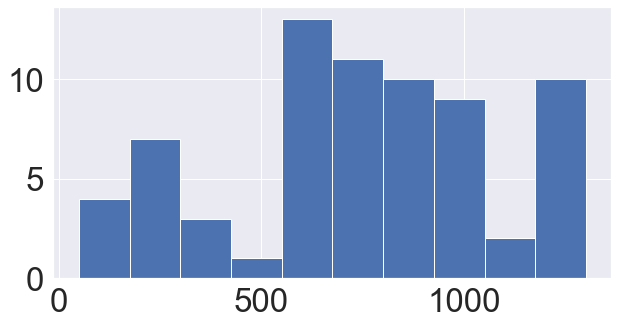

In [104]:
#대만 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Taiwan']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Taiwan']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Taiwan']['altitude_mean_meters'],bins=10)

In [105]:
data[data['Country.of.Origin']=='Taiwan'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Category.One.Defects -0.151806  0.124722   -0.063333  0.093769  0.093008   
Sweetness            -0.019363  0.109208    0.084866  0.099923 -0.221638   
Clean.Cup             0.043512  0.229227    0.310224  0.049613 -0.029549   
Uniformity           -0.057260  0.096950    0.052081 -0.002354 -0.151711   
Moisture             -0.126174 -0.044385   -0.088511 -0.144607 -0.289691   
Category.Two.Defects -0.004130  0.018901    0.159489 -0.030107  0.118601   
Cupper.Points         0.113923  0.248371    0.006993  0.087712 -0.085348   
Quakers               0.056633 -0.016570    0.043759  0.001848  0.053957   
Flavor                0.833353  1.000000    0.781180  0.719711  0.456241   
Body                  0.426021  0.456241    0.487741  0.611246  1.000000   
Aftertaste            0.746094  0.781180    1.000000  0.696208  0.487741   
Total.Cup.Points      0.709961  0.852317    0.739448  0.748418  0.519983   
Aroma                 1.000000  0.833353    0.746094  0.637616  0.426021   
Balance               0.472580  0.467466    0.536699  0.595298  0.770367   
Acidity               0.637616  0.719711    0.696208  1.000000  0.611246   
altitude_mean_meters  0.430740  0.314535    0.392086  0.478606  0.383670   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Category.One.Defects  0.060832   -0.056238   0.021033   0.024430   
Sweetness            -0.267196    0.103264   0.562607   1.000000   
Clean.Cup            -0.039906    0.220709   1.000000   0.562607   
Uniformity           -0.090000    1.000000   0.220709   0.103264   
Moisture             -0.293259    0.230538   0.092123   0.219463   
Category.Two.Defects  0.179798   -0.315066   0.043498   0.050523   
Cupper.Points         0.006043    0.102537   0.107926   0.049130   
Quakers               0.028026    0.029438   0.019241   0.022349   
Flavor                0.467466    0.096950   0.229227   0.109208   
Body                  0.770367   -0.151711  -0.029549  -0.221638   
Aftertaste            0.536699    0.052081   0.310224   0.084866   
Total.Cup.Points      0.585414    0.282246   0.309598   0.147822   
Aroma                 0.472580   -0.057260   0.043512  -0.019363   
Balance               1.000000   -0.090000  -0.039906  -0.267196   
Acidity               0.595298   -0.002354   0.049613   0.099923   
altitude_mean_meters  0.435637   -0.013866  -0.083178  -0.127042   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Category.One.Defects       0.039842          0.034991  0.002692   
Sweetness                  0.049130          0.147822  0.219463   
Clean.Cup                  0.107926          0.309598  0.092123   
Uniformity                 0.102537          0.282246  0.230538   
Moisture                  -0.031829         -0.091378  1.000000   
Category.Two.Defects       0.032976          0.019873 -0.237160   
Cupper.Points              1.000000          0.515466 -0.031829   
Quakers                    0.003710          0.038228  0.071814   
Flavor                     0.248371          0.852317 -0.044385   
Body                      -0.085348          0.519983 -0.289691   
Aftertaste                 0.006993          0.739448 -0.088511   
Total.Cup.Points           0.515466          1.000000 -0.091378   
Aroma                      0.113923          0.709961 -0.126174   
Balance                    0.006043          0.585414 -0.293259   
Acidity                    0.087712          0.748418 -0.144607   
altitude_mean_meters       0.101360          0.399207  0.004634   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Category.One.Defects              1.000000 -0.014772              0.001964   
Sweetness                         0.024430  0.022349              0.050523   
Clean.Cup                         0.021033  0.019241              0.043498   
Uniformity                       -0.056238  0.029438             -0.315066   
Moisture                          0.002692  0

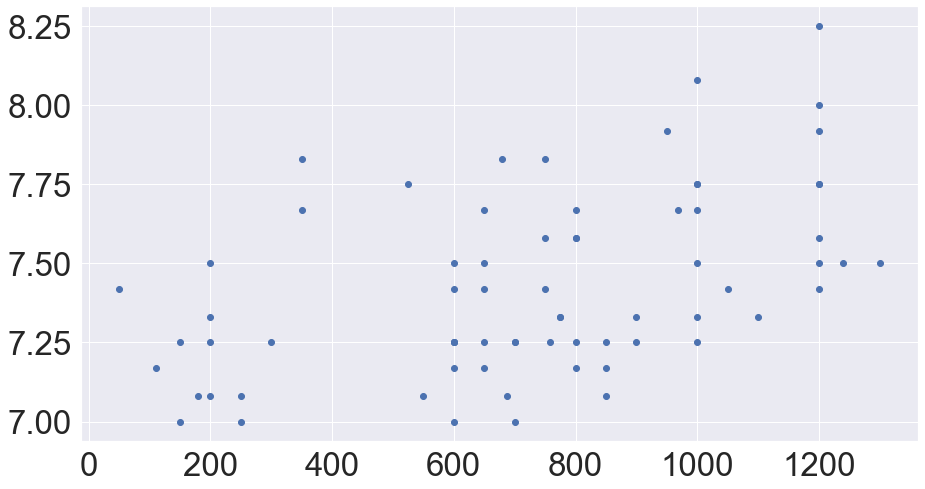

In [106]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Taiwan']['altitude_mean_meters'],data[data['Country.of.Origin']=='Taiwan']['Acidity'])

In [107]:
for i in range(0,len(data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity')) ):
    if np.isnan(data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity').iloc[i,19]):
        index_cha=data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity').index[i]
        print('원데이터결측인덱스: ',index_cha )
        temp=np.nanmean([data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity').iloc[i-2,19],
                    data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity').iloc[i-1,19],
                    data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity').iloc[i+1,19],
                    data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity').iloc[i+2,19]])
        data.iloc[index_cha,19]=temp
        print('대체값: ', temp)
        print('대체확인:',data.iloc[index_cha,19] )
        print('')
        
data[data['Country.of.Origin']=='Taiwan'].sort_values('Acidity')

원데이터결측인덱스:  1000
대체값:  346.0
대체확인: 346.0

원데이터결측인덱스:  363
대체값:  521.0
대체확인: 521.0

원데이터결측인덱스:  701
대체값:  700.0
대체확인: 700.0

원데이터결측인덱스:  338
대체값:  540.0
대체확인: 540.0

원데이터결측인덱스:  255
대체값:  1100.0
대체확인: 1100.0



Species Country.of.Origin Harvest.Year          Processing.Method  \
1111  Arabica            Taiwan         2014              Natural / Dry   
1089  Arabica            Taiwan         2013               Washed / Wet   
1070  Arabica            Taiwan    2013/2014               Washed / Wet   
1063  Arabica            Taiwan    2013/2014               Washed / Wet   
979   Arabica            Taiwan    2013/2014                      Other   
...       ...               ...          ...                        ...   
307   Arabica            Taiwan         2015              Natural / Dry   
259   Arabica            Taiwan         2014               Washed / Wet   
166   Arabica            Taiwan         2012               Washed / Wet   
40    Arabica            Taiwan         2015  Semi-washed / Semi-pulped   
27    Arabica            Taiwan         2015     Pulped natural / honey   

      Aroma  Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  \
1111   6.92    7.00        7.17     7.00  7.42     7.00        10.0   
1089   7.08    7.08        7.25     7.00  7.17     7.17        10.0   
1070   7.25    7.25        7.25     7.00  7.25     7.00        10.0   
1063   7.25    7.25        7.25     7.00  7.25     7.08        10.0   
979    7.25    7.17        7.08     7.08  7.08     8.08        10.0   
...     ...     ...         ...      ...   ...      ...         ...   
307    7.50    7.67        7.33     7.92  7.83     7.67        10.0   
259    8.00    7.92        7.92     7.92  7.67     7.33        10.0   
166    7.83    7.83        7.75     8.00  7.50     7.75        10.0   
40     8.08    8.17        7.75     8.08  7.75     7.83        10.0   
27     8.00    8.00        8.00     8.25  8.00     8.17        10.0   

      Clean.Cup  Sweetness  Cupper.Points  Total.Cup.Points  Moisture  \
1111       10.0       10.0           7.00             79.50      0.00   
1089       10.0       10.0           7.00             79.75      0.10   
1070       10.0       10.0           7.00             80.00      0.11   
1063       10.0       10.0           7.00             80.08      0.11   
979        10.0       10.0           7.17             80.92      0.11   
...         ...        ...            ...               ...       ...   
307        10.0       10.0           7.75             83.67      0.10   
259        10.0       10.0           7.17             83.92      0.06   
166        10.0       10.0           7.75             84.42      0.11   
40         10.0       10.0           8.42             86.08      0.12   
27         10.0       10.0           8.17             86.58      0.00   

      Category.One.Defects  Quakers  Category.Two.Defects  \
1111                     0      0.0                     1   
1089                     0      0.0                     0   
1070                     0      0.0                     0   
1063                     0      0.0                     0   
979                      0      0.0                     0   
...                    ...      ...                   ...   
307                      0      0.0                     0   
259                      0      0.0                     0   
166                      0      0.0                     0   
40                       0      0.0                     0   
27                       0      0.0                     0   

      altitude_mean_meters  
1111                 700.0  
1089                 600.0  
1070                 250.0  
1063                 150.0  
979                  688.0  
...                    ...  
307                 1200.0  
259                  950.0  
166                 1200.0  
40                  1000.0  
27                  1200.0  

[75 rows x 20 columns]

전체행개수:  40
alti결측행개수: 3


(array([ 1.,  0.,  0.,  0.,  1.,  6., 14., 13.,  1.,  1.]),
 array([ 168. ,  379.7,  591.4,  803.1, 1014.8, 1226.5, 1438.2, 1649.9,
        1861.6, 2073.3, 2285. ]),
 <BarContainer object of 10 artists>)

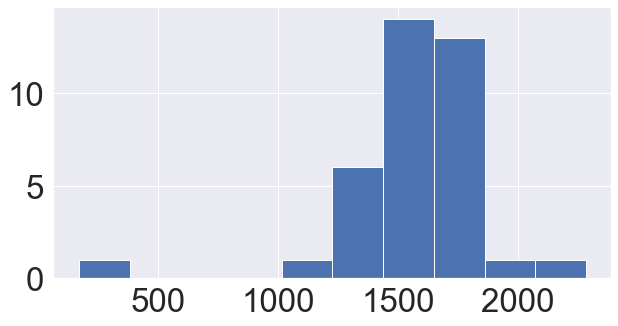

In [108]:
#탄자니아 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Tanzania, United Republic Of']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Tanzania, United Republic Of']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Tanzania, United Republic Of']['altitude_mean_meters'],bins=10)

In [109]:
data[data['Country.of.Origin']=='Tanzania, United Republic Of'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Aroma                 1.000000  0.733986    0.779371  0.772480  0.644627   
Flavor                0.733986  1.000000    0.885786  0.779188  0.528721   
Acidity               0.772480  0.779188    0.802071  1.000000  0.598655   
Body                  0.644627  0.528721    0.600671  0.598655  1.000000   
Total.Cup.Points      0.881150  0.902401    0.936046  0.887607  0.727606   
Moisture              0.212649  0.029141    0.027290  0.036853 -0.027568   
Balance               0.748256  0.783612    0.812429  0.755498  0.611322   
Cupper.Points         0.721234  0.793830    0.844567  0.761323  0.650478   
Category.One.Defects  0.005768 -0.006916   -0.003518 -0.143902  0.023291   
Aftertaste            0.779371  0.885786    1.000000  0.802071  0.600671   
Category.Two.Defects  0.045340  0.029143    0.025224 -0.042091  0.048396   
altitude_mean_meters -0.173558 -0.136107    0.074452 -0.118907 -0.112635   
Uniformity                 NaN       NaN         NaN       NaN       NaN   
Clean.Cup                  NaN       NaN         NaN       NaN       NaN   
Sweetness                  NaN       NaN         NaN       NaN       NaN   
Quakers                    NaN       NaN         NaN       NaN       NaN   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Aroma                 0.748256         NaN        NaN        NaN   
Flavor                0.783612         NaN        NaN        NaN   
Acidity               0.755498         NaN        NaN        NaN   
Body                  0.611322         NaN        NaN        NaN   
Total.Cup.Points      0.906487         NaN        NaN        NaN   
Moisture              0.039667         NaN        NaN        NaN   
Balance               1.000000         NaN        NaN        NaN   
Cupper.Points         0.882343         NaN        NaN        NaN   
Category.One.Defects -0.043057         NaN        NaN        NaN   
Aftertaste            0.812429         NaN        NaN        NaN   
Category.Two.Defects  0.004685         NaN        NaN        NaN   
altitude_mean_meters -0.060075         NaN        NaN        NaN   
Uniformity                 NaN         NaN        NaN        NaN   
Clean.Cup                  NaN         NaN        NaN        NaN   
Sweetness                  NaN         NaN        NaN        NaN   
Quakers                    NaN         NaN        NaN        NaN   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Aroma                      0.721234          0.881150  0.212649   
Flavor                     0.793830          0.902401  0.029141   
Acidity                    0.761323          0.887607  0.036853   
Body                       0.650478          0.727606 -0.027568   
Total.Cup.Points           0.916591          1.000000  0.036225   
Moisture                  -0.128652          0.036225  1.000000   
Balance                    0.882343          0.906487  0.039667   
Cupper.Points              1.000000          0.916591 -0.128652   
Category.One.Defects       0.005110         -0.025234  0.089307   
Aftertaste                 0.844567          0.936046  0.027290   
Category.Two.Defects       0.014367          0.019235  0.216771   
altitude_mean_meters       0.021337         -0.080831 -0.079244   
Uniformity                      NaN               NaN       NaN   
Clean.Cup                       NaN               NaN       NaN   
Sweetness                       NaN               NaN       NaN   
Quakers                         NaN               NaN       NaN   

                      Category.One.Defects  Quakers  Category.Two.Defects  \
Aroma                             0.005768      NaN              0.045340   
Flavor                           -0.006916      NaN              0.029143   
Acidity                          -0.143902      NaN             -0.042091   
Body                              0.023291      NaN              0.048396   
Total.Cup.Points                 -0.025234      Na

In [110]:
#탄자니아는 상관관계가 뚜렷한 변수가 없고 결측치 비율이 적으므로 대표값(평균)으로 대체
index_na_M=data[(data['Country.of.Origin']=='Tanzania, United Republic Of') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='Tanzania, United Republic Of']['altitude_mean_meters'])
data[data['Country.of.Origin']=='Tanzania, United Republic Of'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  23
alti결측행개수: 2


(array([1., 2., 0., 0., 0., 2., 0., 4., 8., 4.]),
 array([1.0000e+00, 2.0090e+02, 4.0080e+02, 6.0070e+02, 8.0060e+02,
        1.0005e+03, 1.2004e+03, 1.4003e+03, 1.6002e+03, 1.8001e+03,
        2.0000e+03]),
 <BarContainer object of 10 artists>)

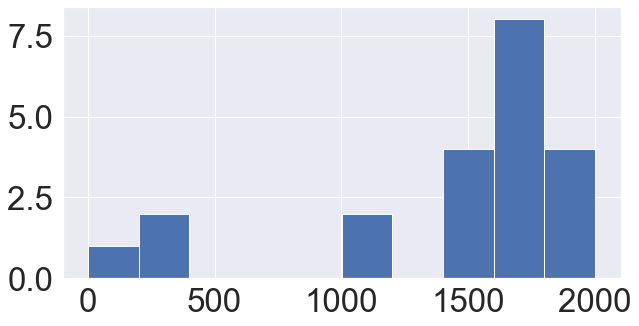

In [111]:
#케냐 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Kenya']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Kenya']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Kenya']['altitude_mean_meters'],bins=10)

In [112]:
data[data['Country.of.Origin']=='Kenya'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Quakers               0.171439 -0.101927    0.058435 -0.208405 -0.163157   
Balance               0.405421  0.525479    0.596354  0.403465  0.408805   
Category.Two.Defects -0.024432 -0.270283    0.019380 -0.051700  0.168254   
Body                  0.100372  0.395893    0.406427  0.402574  1.000000   
Aroma                 1.000000  0.714614    0.704306  0.624473  0.100372   
Aftertaste            0.704306  0.781156    1.000000  0.730339  0.406427   
Cupper.Points         0.595535  0.509530    0.529010  0.535240 -0.096325   
Flavor                0.714614  1.000000    0.781156  0.826130  0.395893   
Moisture              0.005631 -0.139560   -0.039491 -0.193155 -0.447315   
Total.Cup.Points      0.793626  0.878142    0.878972  0.869215  0.346140   
Acidity               0.624473  0.826130    0.730339  1.000000  0.402574   
Uniformity           -0.035574  0.041759    0.047342  0.101818 -0.102513   
Clean.Cup            -0.035574  0.041759    0.047342  0.101818 -0.102513   
Sweetness            -0.035574  0.041759    0.047342  0.101818 -0.102513   
altitude_mean_meters -0.058399  0.107983   -0.034131  0.244781 -0.127276   
Category.One.Defects  0.163181 -0.120163    0.112491  0.218560  0.196407   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Quakers              -0.074384    0.053960   0.053960   0.053960   
Balance               1.000000   -0.687269  -0.687269  -0.687269   
Category.Two.Defects -0.193227    0.123261   0.123261   0.123261   
Body                  0.408805   -0.102513  -0.102513  -0.102513   
Aroma                 0.405421   -0.035574  -0.035574  -0.035574   
Aftertaste            0.596354    0.047342   0.047342   0.047342   
Cupper.Points         0.326254   -0.050364  -0.050364  -0.050364   
Flavor                0.525479    0.041759   0.041759   0.041759   
Moisture              0.194435   -0.100944  -0.100944  -0.100944   
Total.Cup.Points      0.449902    0.165369   0.165369   0.165369   
Acidity               0.403465    0.101818   0.101818   0.101818   
Uniformity           -0.687269    1.000000   1.000000   1.000000   
Clean.Cup            -0.687269    1.000000   1.000000   1.000000   
Sweetness            -0.687269    1.000000   1.000000   1.000000   
altitude_mean_meters -0.304872    0.477958   0.477958   0.477958   
Category.One.Defects -0.046357    0.045455   0.045455   0.045455   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Quakers                    0.000921         -0.031324  0.172836   
Balance                    0.326254          0.449902  0.194435   
Category.Two.Defects      -0.139212         -0.072673 -0.129849   
Body                      -0.096325          0.346140 -0.447315   
Aroma                      0.595535          0.793626  0.005631   
Aftertaste                 0.529010          0.878972 -0.039491   
Cupper.Points              1.000000          0.748111 -0.069831   
Flavor                     0.509530          0.878142 -0.139560   
Moisture                  -0.069831         -0.146603  1.000000   
Total.Cup.Points           0.748111          1.000000 -0.146603   
Acidity                    0.535240          0.869215 -0.193155   
Uniformity                -0.050364          0.165369 -0.100944   
Clean.Cup                 -0.050364          0.165369 -0.100944   
Sweetness                 -0.050364          0.165369 -0.100944   
altitude_mean_meters       0.017010          0.118890  0.115844   
Category.One.Defects      -0.048812          0.085805 -0.077650   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Quakers                          -0.053960  1.000000              0.431588   
Balance                          -0.046357 -0.074384             -0.193227   
Category.Two.Defects              0.564014  0.431588              1.000000   
Body                              0.196407 -0.163157              0.168254   
Aroma                             0.163181  0

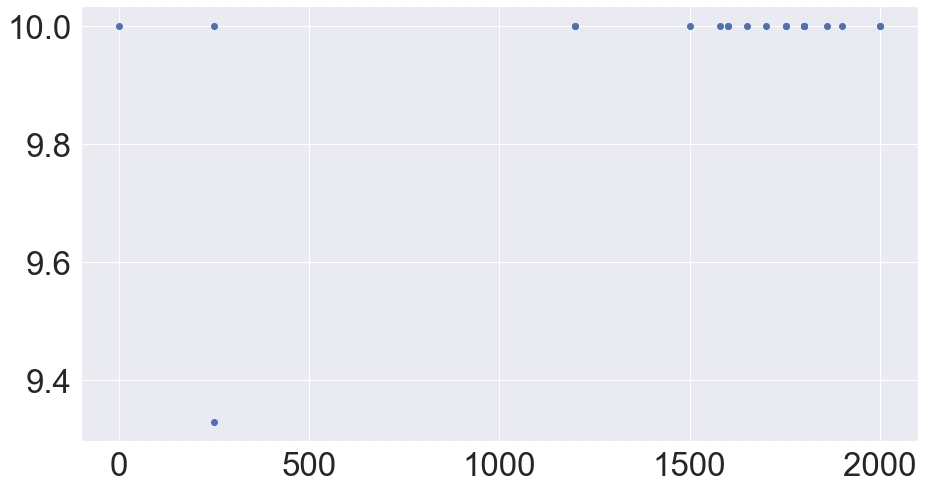

In [113]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Kenya']['altitude_mean_meters'],data[data['Country.of.Origin']=='Kenya']['Uniformity'])

In [114]:
#케냐는 상관관계가 뚜렷한 변수가 없고 결측치 비율이 적으므로 대표값(평균)으로 대체
index_na_M=data[(data['Country.of.Origin']=='Kenya') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='Kenya']['altitude_mean_meters'])
data[data['Country.of.Origin']=='Kenya'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  27
alti결측행개수: 7


(array([ 2.,  0.,  0., 10.,  0.,  0.,  0.,  2.,  2.,  4.]),
 array([ 457.17585984,  561.45827386,  665.74068787,  770.02310189,
         874.3055159 ,  978.58792992, 1082.87034394, 1187.15275795,
        1291.43517197, 1395.71758598, 1500.        ]),
 <BarContainer object of 10 artists>)

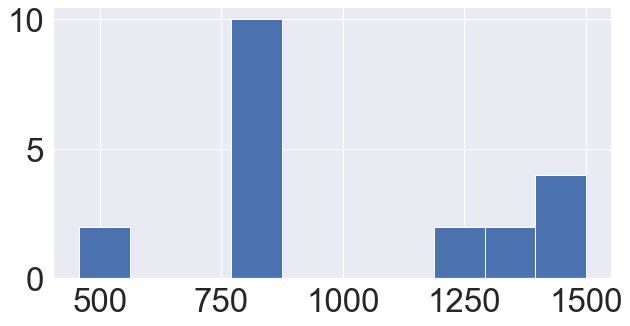

In [115]:
#태국 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Thailand']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Thailand']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Thailand']['altitude_mean_meters'],bins=10)

In [116]:
data[data['Country.of.Origin']=='Thailand'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Acidity               0.592873  0.694534    0.500317  1.000000  0.372702   
Aroma                 1.000000  0.573244    0.675550  0.592873  0.563802   
Uniformity           -0.291370 -0.413970   -0.424347 -0.570356 -0.315763   
Category.Two.Defects  0.251135  0.458366    0.184020  0.431761 -0.010886   
Category.One.Defects  0.250629  0.470358    0.231049  0.458149  0.029996   
Flavor                0.573244  1.000000    0.752678  0.694534  0.601520   
Total.Cup.Points      0.753927  0.873285    0.817199  0.620428  0.725214   
Balance               0.679049  0.787991    0.875794  0.583860  0.726824   
Aftertaste            0.675550  0.752678    1.000000  0.500317  0.755875   
Cupper.Points         0.685283  0.898781    0.820530  0.693741  0.704693   
Moisture              0.005646  0.137509    0.070255 -0.063209  0.231374   
Body                  0.563802  0.601520    0.755875  0.372702  1.000000   
altitude_mean_meters  0.001498  0.287478    0.325384 -0.201205  0.557377   
Clean.Cup            -0.316399 -0.372856   -0.466457 -0.583247 -0.434947   
Sweetness            -0.408890 -0.168614   -0.502979 -0.262768 -0.335276   
Quakers                    NaN       NaN         NaN       NaN       NaN   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Acidity               0.583860   -0.570356  -0.583247  -0.262768   
Aroma                 0.679049   -0.291370  -0.316399  -0.408890   
Uniformity           -0.359152    1.000000   0.889632   0.603686   
Category.Two.Defects  0.184707    0.088569   0.064923   0.093633   
Category.One.Defects  0.264164    0.052470   0.038462   0.055470   
Flavor                0.787991   -0.413970  -0.372856  -0.168614   
Total.Cup.Points      0.865003   -0.144315  -0.171016  -0.122143   
Balance               1.000000   -0.359152  -0.444094  -0.464022   
Aftertaste            0.875794   -0.424347  -0.466457  -0.502979   
Cupper.Points         0.864449   -0.471516  -0.453534  -0.323403   
Moisture              0.127872   -0.074438  -0.054564  -0.078694   
Body                  0.726824   -0.315763  -0.434947  -0.335276   
altitude_mean_meters  0.324306    0.133834        NaN        NaN   
Clean.Cup            -0.444094    0.889632   1.000000   0.693375   
Sweetness            -0.464022    0.603686   0.693375   1.000000   
Quakers                    NaN         NaN        NaN        NaN   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Acidity                    0.693741          0.620428 -0.063209   
Aroma                      0.685283          0.753927  0.005646   
Uniformity                -0.471516         -0.144315 -0.074438   
Category.Two.Defects       0.356628          0.407685 -0.176359   
Category.One.Defects       0.453534          0.452710 -0.012401   
Flavor                     0.898781          0.873285  0.137509   
Total.Cup.Points           0.896929          1.000000  0.087620   
Balance                    0.864449          0.865003  0.127872   
Aftertaste                 0.820530          0.817199  0.070255   
Cupper.Points              1.000000          0.896929  0.114195   
Moisture                   0.114195          0.087620  1.000000   
Body                       0.704693          0.725214  0.231374   
altitude_mean_meters       0.388910          0.301586  0.479997   
Clean.Cup                 -0.453534         -0.171016 -0.054564   
Sweetness                 -0.323403         -0.122143 -0.078694   
Quakers                         NaN               NaN       NaN   

                      Category.One.Defects  Quakers  Category.Two.Defects  \
Acidity                           0.458149      NaN              0.431761   
Aroma                             0.250629      NaN              0.251135   
Uniformity                        0.052470      NaN              0.088569   
Category.Two.Defects              0.921091      NaN              1.000000   
Category.One.Defects              1.000000      Na

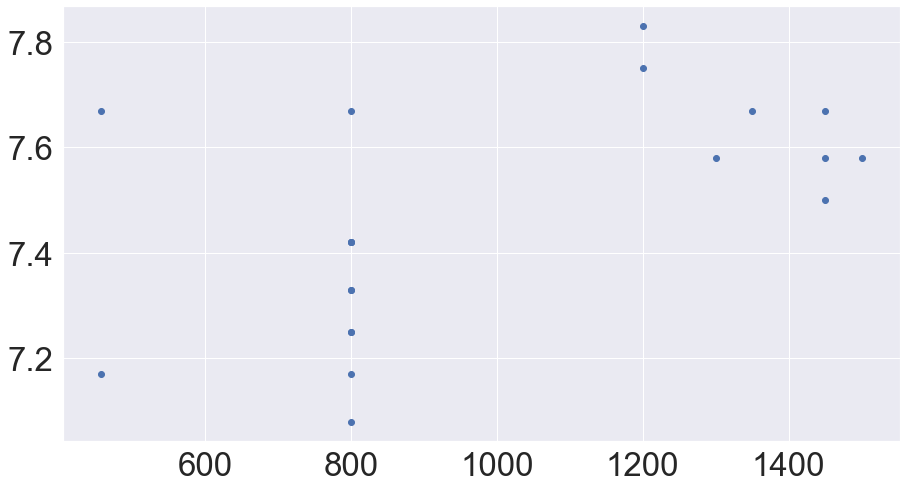

In [117]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Thailand']['altitude_mean_meters'],data[data['Country.of.Origin']=='Thailand']['Body'])

In [118]:
for i in range(0,len(data[data['Country.of.Origin']=='Thailand'].sort_values('Body')) ):
    
    if np.isnan(data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i,19]):
        print("i: ",i)
        index_cha=data[data['Country.of.Origin']=='Thailand'].sort_values('Body').index[i]
        print('원데이터결측인덱스: ',index_cha )
        
        if (i==1):
                    temp=np.nanmean([data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-1,19],
                                    data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i+1,19],
                                    data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i+2,19]])
                    data.iloc[index_cha,19]=temp
                    print('대체값: ', temp)
                    print('대체확인:',data.iloc[index_cha,19] )
                    print('')
                    continue
                    
        if (i==len(data[data['Country.of.Origin']=='Thailand'].sort_values('Aftertaste'))-2):
                    temp=np.nanmean([data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-2,19],
                                     data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-1,19],
                                    data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i+1,19]])
                    data.iloc[index_cha,19]=temp
                    print('대체값: ', temp)
                    print('대체확인:',data.iloc[index_cha,19] )
                    print('')
                    continue
                    
        if (i==len(data[data['Country.of.Origin']=='Thailand'].sort_values('Body'))-1):
                    temp=np.nanmean([data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-2,19],
                                     data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-1,19]])
                    data.iloc[index_cha,19]=temp
                    print('대체값: ', temp)
                    print('대체확인:',data.iloc[index_cha,19] )
                    print('')
                    continue
        
        
        temp=np.nanmean([data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-2,19],
                    data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i-1,19],
                    data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i+1,19],
                    data[data['Country.of.Origin']=='Thailand'].sort_values('Body').iloc[i+2,19]])
        data.iloc[index_cha,19]=temp
        print('대체값: ', temp)
        print('대체확인:',data.iloc[index_cha,19] )
        print('')
        
data[data['Country.of.Origin']=='Thailand'].sort_values('Body')

i:  11
원데이터결측인덱스:  868
대체값:  1250.0
대체확인: 1250.0

i:  14
원데이터결측인덱스:  247
대체값:  1416.6666666666667
대체확인: 1416.6666666666667

i:  16
원데이터결측인덱스:  595
대체값:  1291.6666666666667
대체확인: 1291.6666666666667

i:  21
원데이터결측인덱스:  503
대체값:  1002.39195328
대체확인: 1002.39195328

i:  23
원데이터결측인덱스:  283
대체값:  1134.1306510933334
대체확인: 1134.1306510933334

i:  25
원데이터결측인덱스:  114
대체값:  1167.0653255466668
대체확인: 1167.0653255466668

i:  26
원데이터결측인덱스:  244
대체값:  1183.5326627733334
대체확인: 1183.5326627733334



Species Country.of.Origin Harvest.Year       Processing.Method  Aroma  \
1090  Arabica          Thailand         2013            Washed / Wet   7.25   
1101  Arabica          Thailand         2013            Washed / Wet   6.92   
867   Arabica          Thailand         2011            Washed / Wet   7.08   
963   Arabica          Thailand         2012            Washed / Wet   7.33   
726   Arabica          Thailand         2014            Washed / Wet   7.42   
766   Arabica          Thailand         2013            Washed / Wet   7.58   
626   Arabica          Thailand         2014            Washed / Wet   7.50   
1071  Arabica          Thailand         2012            Washed / Wet   7.33   
431   Arabica          Thailand         2014            Washed / Wet   7.67   
608   Arabica          Thailand         2014            Washed / Wet   7.75   
931   Arabica          Thailand         2014            Washed / Wet   6.83   
868   Arabica          Thailand         2011            Washed / Wet   7.33   
609   Arabica          Thailand         2014            Washed / Wet   7.42   
37    Arabica          Thailand         2012            Washed / Wet   7.83   
247   Arabica          Thailand         2011            Washed / Wet   7.58   
591   Arabica          Thailand         2013            Washed / Wet   7.42   
595   Arabica          Thailand         2012            Washed / Wet   7.83   
308   Arabica          Thailand         2014            Washed / Wet   7.50   
627   Arabica          Thailand         2014            Washed / Wet   7.33   
282   Arabica          Thailand         2011            Washed / Wet   7.75   
250   Arabica          Thailand         2015           Natural / Dry   7.67   
503   Arabica          Thailand         2011            Washed / Wet   7.33   
365   Arabica          Thailand         2015            Washed / Wet   7.50   
283   Arabica          Thailand         2011            Washed / Wet   7.50   
182   Arabica          Thailand         2015           Natural / Dry   7.83   
114   Arabica          Thailand         2015  Pulped natural / honey   7.75   
244   Arabica          Thailand         2012            Washed / Wet   7.92   

      Flavor  Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  \
1090    7.08        6.92     7.50  7.08     6.92       10.00      10.00   
1101    7.17        6.83     7.42  7.17     7.08       10.00      10.00   
867     7.33        7.58     7.58  7.17     7.50       10.00      10.00   
963     7.42        7.25     7.42  7.25     7.17       10.00      10.00   
726     7.42        7.17     7.75  7.25     7.67       10.00      10.00   
766     7.50        7.42     7.42  7.33     7.42       10.00      10.00   
626     7.83        7.50     7.75  7.33     7.42        9.33      10.00   
1071    6.67        7.08     7.42  7.42     7.08       10.00      10.00   
431     7.58        7.58     7.75  7.42     7.67       10.00      10.00   
608     7.33        7.42     7.67  7.42     7.50       10.00      10.00   
931     7.42        7.42     7.17  7.50     7.42       10.00      10.00   
868     7.33        7.17     7.50  7.58     7.33       10.00      10.00   
609     7.58        7.58     7.42  7.58     7.50       10.00      10.00   
37      8.33        7.83     8.25  7.58     7.92       10.00      10.00   
247     7.75        7.58     7.75  7.58     7.75       10.00      10.00   
591     7.50        7.50     7.67  7.58     7.50       10.00      10.00   
595     7.33        7.83     7.33  7.58     7.83       10.00      10.00   
308     7.75        7.58     7.83  7.67     7.58       10.00      10.00   
627     7.50        7.50     7.50  7.67     7.50       10.00      10.00   
282     7.75        7.58     8.00  7.67     7.58       10.00      10.00   
250     7.75        7.50     7.67  7.67     7.83       10.00      10.00   
503     7.67        7.58     7.50  7.75     7.67       10.00      10.00   
365     7.58        7.75     7.50  7.75     7.67       10.00      10

In [119]:
data[data['Country.of.Origin']=='Thailand'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  177
alti결측행개수: 28


(array([15.,  0.,  6., 35., 87.,  2.,  3.,  0.,  0.,  1.]),
 array([ 165. ,  533.5,  902. , 1270.5, 1639. , 2007.5, 2376. , 2744.5,
        3113. , 3481.5, 3850. ]),
 <BarContainer object of 10 artists>)

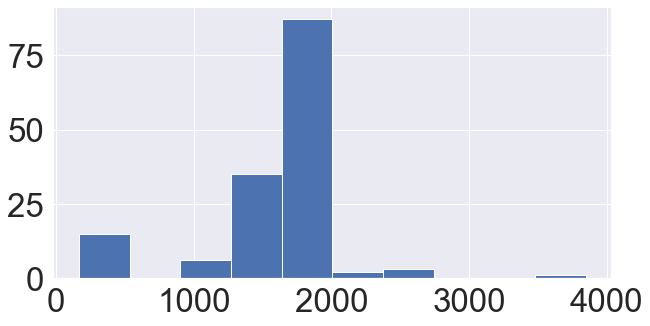

In [120]:
#콜롬비아 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Colombia']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Colombia']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Colombia']['altitude_mean_meters'],bins=10)

In [121]:
data[data['Country.of.Origin']=='Colombia'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Category.One.Defects  0.010637  0.049327    0.080622  0.041684  0.102784   
Quakers               0.077416  0.062188   -0.007944 -0.097131  0.102275   
Body                  0.068890  0.273702    0.265524  0.252465  1.000000   
Balance              -0.047567  0.173333    0.157493  0.151400  0.078973   
Flavor                0.243584  1.000000    0.569618  0.488239  0.273702   
Total.Cup.Points      0.236589  0.572192    0.453813  0.527034  0.374350   
Aftertaste            0.158645  0.569618    1.000000  0.423621  0.265524   
Sweetness            -0.047991  0.067294   -0.057003  0.009484  0.023759   
Moisture             -0.149617  0.024005    0.103154 -0.085341  0.014166   
Uniformity           -0.070980  0.040771   -0.034779 -0.007944 -0.052420   
Acidity               0.150618  0.488239    0.423621  1.000000  0.252465   
Clean.Cup            -0.071974  0.088999   -0.011137  0.061426 -0.009580   
Aroma                 1.000000  0.243584    0.158645  0.150618  0.068890   
Cupper.Points         0.027752  0.406477    0.338261  0.386772  0.182642   
Category.Two.Defects  0.104813 -0.036053    0.076744 -0.034854  0.012100   
altitude_mean_meters  0.019198 -0.025848    0.001058  0.016678 -0.082316   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Category.One.Defects -0.023237    0.054647   0.048511   0.042214   
Quakers               0.138198   -0.040498  -0.046043   0.029868   
Body                  0.078973   -0.052420  -0.009580   0.023759   
Balance               1.000000    0.113584   0.085919   0.013008   
Flavor                0.173333    0.040771   0.088999   0.067294   
Total.Cup.Points      0.383574    0.580672   0.605949   0.533394   
Aftertaste            0.157493   -0.034779  -0.011137  -0.057003   
Sweetness             0.013008    0.508662   0.518922   1.000000   
Moisture             -0.037396    0.115344   0.117056   0.096550   
Uniformity            0.113584    1.000000   0.533638   0.508662   
Acidity               0.151400   -0.007944   0.061426   0.009484   
Clean.Cup             0.085919    0.533638   1.000000   0.518922   
Aroma                -0.047567   -0.070980  -0.071974  -0.047991   
Cupper.Points         0.291801    0.131712   0.112066  -0.123860   
Category.Two.Defects  0.034037   -0.299375  -0.322419  -0.277898   
altitude_mean_meters -0.059147    0.011433   0.018689   0.005876   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Category.One.Defects      -0.035458          0.079448  0.086249   
Quakers                   -0.001326          0.032001 -0.260799   
Body                       0.182642          0.374350  0.014166   
Balance                    0.291801          0.383574 -0.037396   
Flavor                     0.406477          0.572192  0.024005   
Total.Cup.Points           0.486256          1.000000  0.058675   
Aftertaste                 0.338261          0.453813  0.103154   
Sweetness                 -0.123860          0.533394  0.096550   
Moisture                   0.006024          0.058675  1.000000   
Uniformity                 0.131712          0.580672  0.115344   
Acidity                    0.386772          0.527034 -0.085341   
Clean.Cup                  0.112066          0.605949  0.117056   
Aroma                      0.027752          0.236589 -0.149617   
Cupper.Points              1.000000          0.486256  0.006024   
Category.Two.Defects      -0.030127         -0.223242 -0.067262   
altitude_mean_meters       0.044016         -0.007173  0.008759   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Category.One.Defects              1.000000  0.009262              0.045688   
Quakers                           0.009262  1.000000              0.198186   
Body                              0.102784  0.102275              0.012100   
Balance                          -0.023237  0.138198              0.034037   
Flavor                            0.049327  0

In [122]:
#콜롬비아 같은 경우엔 그냥 결측행 삭제가 나을것으로 판단
index_del_col=data[ (data['Country.of.Origin']=='Colombia') & data['altitude_mean_meters'].isnull()  ].index
data.drop(index_del_col,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
0     Arabica          Ethiopia         2014      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia         2014      Washed / Wet   8.75    8.67   
2     Arabica          Ethiopia         2014     Natural / Dry   8.17    8.58   
3     Arabica          Ethiopia         2014      Washed / Wet   8.25    8.50   
4     Arabica            Brazil         2013     Natural / Dry   8.58    8.42   
...       ...               ...          ...               ...    ...     ...   
1242  Robusta             India         2013     Natural / Dry   7.58    7.42   
1243  Robusta     United States         2012     Natural / Dry   7.92    7.50   
1244  Robusta     United States         2014     Natural / Dry   7.33    7.33   
1245  Robusta             India         2013     Natural / Dry   7.42    6.83   
1246  Robusta           Vietnam         2013     Natural / Dry   6.75    6.67   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0           8.67     8.75  8.50     8.42       10.00      10.00      10.00   
1           8.50     8.58  8.42     8.42       10.00      10.00      10.00   
2           8.42     8.42  8.50     8.25       10.00      10.00      10.00   
3           8.25     8.50  8.42     8.33       10.00      10.00      10.00   
4           8.42     8.50  8.25     8.33       10.00      10.00      10.00   
...          ...      ...   ...      ...         ...        ...        ...   
1242        7.42     7.83  7.42     7.50       10.00      10.00       7.42   
1243        7.42     7.42  7.42     7.42        9.33      10.00       7.58   
1244        7.17     7.42  7.50     7.17        9.33       9.33       7.42   
1245        6.75     7.17  7.25     7.00        9.33       9.33       7.08   
1246        6.50     6.83  6.92     6.83        9.33       9.33       6.67   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1242           7.58             80.17      0.00                     0   
1243           7.33             79.33      0.00                     0   
1244           7.17             77.17      0.00                     0   
1245           6.92             75.08      0.10                    20   
1246           7.92             73.75      0.12                    63   

      Quakers  Category.Two.Defects  altitude_mean_meters  
0         0.0                     0                2075.0  
1         0.0                     1                2075.0  
2         0.0                     2                2000.0  
3         0.0                     2                2075.0  
4         0.0                     1                1175.0  
...       ...                   ...                   ...  
1242      0.0                     0                 750.0  
1243      0.0                     0                3000.0  
1244      0.0                     6                 795.0  
1245      0.0                     1                   NaN  
1246      0.0                     9                   NaN  

[1247 rows x 20 columns]

전체행개수:  175
alti결측행개수: 24


(array([ 6., 90.,  0.,  3., 32., 16.,  1.,  0.,  0.,  3.]),
 array([  48.12377472,  371.31139725,  694.49901978, 1017.6866423 ,
        1340.87426483, 1664.06188736, 1987.24950989, 2310.43713242,
        2633.62475494, 2956.81237747, 3280.        ]),
 <BarContainer object of 10 artists>)

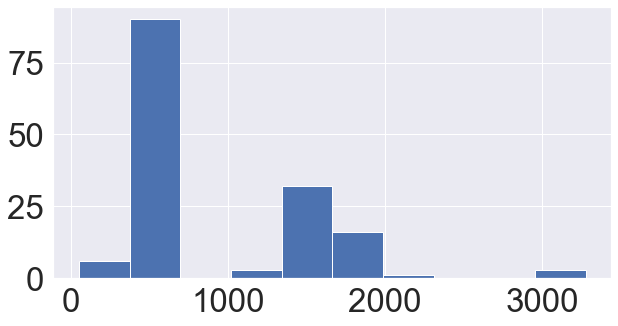

In [123]:
#과테말라 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Guatemala']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Guatemala']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Guatemala']['altitude_mean_meters'],bins=10)

In [124]:
data[data['Country.of.Origin']=='Guatemala'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Category.One.Defects -0.199760 -0.152236   -0.141276 -0.218905 -0.178566   
Moisture             -0.165992 -0.132970   -0.250808 -0.052045 -0.195245   
Balance               0.707701  0.742491    0.790524  0.656944  0.775148   
Category.Two.Defects -0.241449 -0.300157   -0.291146 -0.267799 -0.221427   
Acidity               0.632406  0.703673    0.675945  1.000000  0.625991   
Aroma                 1.000000  0.770995    0.709364  0.632406  0.662896   
Clean.Cup            -0.002722  0.169459    0.128423  0.013717  0.060712   
Sweetness             0.022609  0.191478    0.139362  0.024376  0.030391   
Uniformity            0.234097  0.330293    0.328873  0.218360  0.134759   
Total.Cup.Points      0.644352  0.783310    0.764047  0.613889  0.627348   
Body                  0.662896  0.639937    0.679635  0.625991  1.000000   
Quakers               0.009153  0.037387    0.059151  0.094240  0.059470   
Flavor                0.770995  1.000000    0.858163  0.703673  0.639937   
Cupper.Points         0.745589  0.811384    0.838934  0.699755  0.713103   
Aftertaste            0.709364  0.858163    1.000000  0.675945  0.679635   
altitude_mean_meters  0.042352  0.140388    0.155580  0.029722  0.127944   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Category.One.Defects -0.212319    0.051780   0.035255   0.024243   
Moisture             -0.190410   -0.004009   0.031335   0.076100   
Balance               1.000000    0.332375   0.210479   0.200294   
Category.Two.Defects -0.247714   -0.143212  -0.053377  -0.060632   
Acidity               0.656944    0.218360   0.013717   0.024376   
Aroma                 0.707701    0.234097  -0.002722   0.022609   
Clean.Cup             0.210479    0.546843   1.000000   0.977062   
Sweetness             0.200294    0.556567   0.977062   1.000000   
Uniformity            0.332375    1.000000   0.546843   0.556567   
Total.Cup.Points      0.783794    0.641702   0.652972   0.662545   
Body                  0.775148    0.134759   0.060712   0.030391   
Quakers              -0.013312    0.073250   0.031132   0.037966   
Flavor                0.742491    0.330293   0.169459   0.191478   
Cupper.Points         0.802945    0.346770   0.157361   0.189745   
Aftertaste            0.790524    0.328873   0.128423   0.139362   
altitude_mean_meters  0.001461    0.092293   0.067145   0.077489   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Category.One.Defects      -0.258066         -0.135113 -0.072128   
Moisture                  -0.235454         -0.119344  1.000000   
Balance                    0.802945          0.783794 -0.190410   
Category.Two.Defects      -0.334999         -0.271794 -0.085435   
Acidity                    0.699755          0.613889 -0.052045   
Aroma                      0.745589          0.644352 -0.165992   
Clean.Cup                  0.157361          0.652972  0.031335   
Sweetness                  0.189745          0.662545  0.076100   
Uniformity                 0.346770          0.641702 -0.004009   
Total.Cup.Points           0.792101          1.000000 -0.119344   
Body                       0.713103          0.627348 -0.195245   
Quakers                    0.043942          0.060388  0.044598   
Flavor                     0.811384          0.783310 -0.132970   
Cupper.Points              1.000000          0.792101 -0.235454   
Aftertaste                 0.838934          0.764047 -0.250808   
altitude_mean_meters       0.147724          0.123671 -0.025248   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Category.One.Defects              1.000000 -0.038501              0.266710   
Moisture                         -0.072128  0.044598             -0.085435   
Balance                          -0.212319 -0.013312             -0.247714   
Category.Two.Defects              0.266710  0.044085              1.000000   
Acidity                          -0.218905  0

In [125]:
#과테말라 같은 경우엔 상관관계도 X, 변수도 비교적 넓게 분포. 그냥 결측행 삭제가 나을 것으로 판단
index_del_col=data[ (data['Country.of.Origin']=='Guatemala') & data['altitude_mean_meters'].isnull()  ].index
data.drop(index_del_col,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
0     Arabica          Ethiopia         2014      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia         2014      Washed / Wet   8.75    8.67   
2     Arabica          Ethiopia         2014     Natural / Dry   8.17    8.58   
3     Arabica          Ethiopia         2014      Washed / Wet   8.25    8.50   
4     Arabica            Brazil         2013     Natural / Dry   8.58    8.42   
...       ...               ...          ...               ...    ...     ...   
1218  Robusta             India         2013     Natural / Dry   7.58    7.42   
1219  Robusta     United States         2012     Natural / Dry   7.92    7.50   
1220  Robusta     United States         2014     Natural / Dry   7.33    7.33   
1221  Robusta             India         2013     Natural / Dry   7.42    6.83   
1222  Robusta           Vietnam         2013     Natural / Dry   6.75    6.67   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0           8.67     8.75  8.50     8.42       10.00      10.00      10.00   
1           8.50     8.58  8.42     8.42       10.00      10.00      10.00   
2           8.42     8.42  8.50     8.25       10.00      10.00      10.00   
3           8.25     8.50  8.42     8.33       10.00      10.00      10.00   
4           8.42     8.50  8.25     8.33       10.00      10.00      10.00   
...          ...      ...   ...      ...         ...        ...        ...   
1218        7.42     7.83  7.42     7.50       10.00      10.00       7.42   
1219        7.42     7.42  7.42     7.42        9.33      10.00       7.58   
1220        7.17     7.42  7.50     7.17        9.33       9.33       7.42   
1221        6.75     7.17  7.25     7.00        9.33       9.33       7.08   
1222        6.50     6.83  6.92     6.83        9.33       9.33       6.67   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1218           7.58             80.17      0.00                     0   
1219           7.33             79.33      0.00                     0   
1220           7.17             77.17      0.00                     0   
1221           6.92             75.08      0.10                    20   
1222           7.92             73.75      0.12                    63   

      Quakers  Category.Two.Defects  altitude_mean_meters  
0         0.0                     0                2075.0  
1         0.0                     1                2075.0  
2         0.0                     2                2000.0  
3         0.0                     2                2075.0  
4         0.0                     1                1175.0  
...       ...                   ...                   ...  
1218      0.0                     0                 750.0  
1219      0.0                     0                3000.0  
1220      0.0                     6                 795.0  
1221      0.0                     1                   NaN  
1222      0.0                     9                   NaN  

[1223 rows x 20 columns]

전체행개수:  4
alti결측행개수: 0


(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 2.]),
 array([1100., 1158., 1216., 1274., 1332., 1390., 1448., 1506., 1564.,
        1622., 1680.]),
 <BarContainer object of 10 artists>)

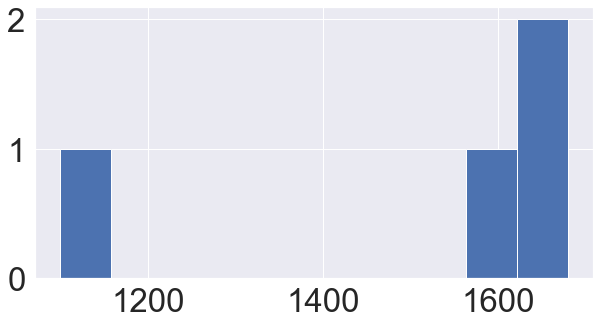

In [126]:
#파나마 PM결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Panama']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Panama']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Panama']['altitude_mean_meters'],bins=10)

전체행개수:  1
alti결측행개수: 0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1249.5, 1249.6, 1249.7, 1249.8, 1249.9, 1250. , 1250.1, 1250.2,
        1250.3, 1250.4, 1250.5]),
 <BarContainer object of 10 artists>)

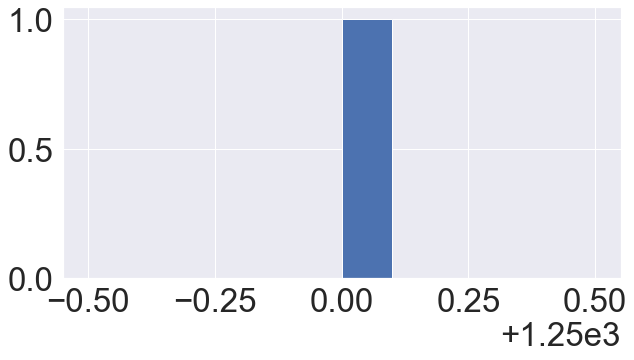

In [127]:
#잠비아 PM결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Zambia']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Zambia']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Zambia']['altitude_mean_meters'],bins=10)

In [128]:
data.isnull().sum()

Species                  0
Country.of.Origin        0
Harvest.Year             0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Category.Two.Defects     0
altitude_mean_meters    65
dtype: int64

전체행개수:  10
alti결측행개수: 0


(array([1., 1., 1., 0., 0., 3., 3., 0., 0., 1.]),
 array([ 520.257024 ,  768.2313216, 1016.2056192, 1264.1799168,
        1512.1542144, 1760.128512 , 2008.1028096, 2256.0771072,
        2504.0514048, 2752.0257024, 3000.       ]),
 <BarContainer object of 10 artists>)

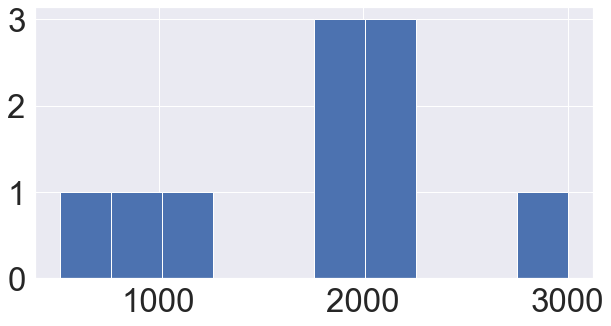

In [129]:
#미국 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='United States']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='United States']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='United States']['altitude_mean_meters'],bins=10)

전체행개수:  54
alti결측행개수: 52


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([130.064256 , 135.6384384, 141.2126208, 146.7868032, 152.3609856,
        157.935168 , 163.5093504, 169.0835328, 174.6577152, 180.2318976,
        185.80608  ]),
 <BarContainer object of 10 artists>)

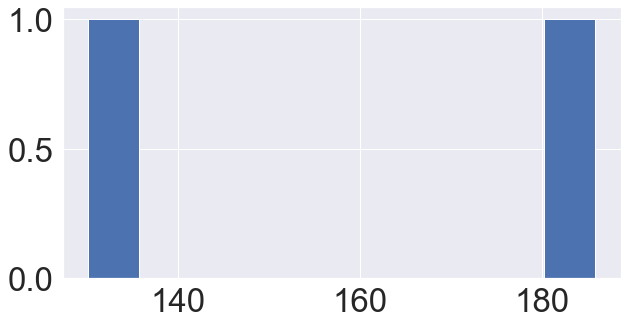

In [130]:
#미국(하와이) alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='United States (Hawaii)']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='United States (Hawaii)']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='United States (Hawaii)']['altitude_mean_meters'],bins=10)

In [131]:
#하와이 같은 경우엔 대부분 결측행이라 대체 근거 찾기 힘듦 ->삭제 판단
index_del_col=data[ (data['Country.of.Origin']=='United States (Hawaii)') & data['altitude_mean_meters'].isnull()  ].index
data.drop(index_del_col,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
0     Arabica          Ethiopia         2014      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia         2014      Washed / Wet   8.75    8.67   
2     Arabica          Ethiopia         2014     Natural / Dry   8.17    8.58   
3     Arabica          Ethiopia         2014      Washed / Wet   8.25    8.50   
4     Arabica            Brazil         2013     Natural / Dry   8.58    8.42   
...       ...               ...          ...               ...    ...     ...   
1166  Robusta             India         2013     Natural / Dry   7.58    7.42   
1167  Robusta     United States         2012     Natural / Dry   7.92    7.50   
1168  Robusta     United States         2014     Natural / Dry   7.33    7.33   
1169  Robusta             India         2013     Natural / Dry   7.42    6.83   
1170  Robusta           Vietnam         2013     Natural / Dry   6.75    6.67   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0           8.67     8.75  8.50     8.42       10.00      10.00      10.00   
1           8.50     8.58  8.42     8.42       10.00      10.00      10.00   
2           8.42     8.42  8.50     8.25       10.00      10.00      10.00   
3           8.25     8.50  8.42     8.33       10.00      10.00      10.00   
4           8.42     8.50  8.25     8.33       10.00      10.00      10.00   
...          ...      ...   ...      ...         ...        ...        ...   
1166        7.42     7.83  7.42     7.50       10.00      10.00       7.42   
1167        7.42     7.42  7.42     7.42        9.33      10.00       7.58   
1168        7.17     7.42  7.50     7.17        9.33       9.33       7.42   
1169        6.75     7.17  7.25     7.00        9.33       9.33       7.08   
1170        6.50     6.83  6.92     6.83        9.33       9.33       6.67   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1166           7.58             80.17      0.00                     0   
1167           7.33             79.33      0.00                     0   
1168           7.17             77.17      0.00                     0   
1169           6.92             75.08      0.10                    20   
1170           7.92             73.75      0.12                    63   

      Quakers  Category.Two.Defects  altitude_mean_meters  
0         0.0                     0                2075.0  
1         0.0                     1                2075.0  
2         0.0                     2                2000.0  
3         0.0                     2                2075.0  
4         0.0                     1                1175.0  
...       ...                   ...                   ...  
1166      0.0                     0                 750.0  
1167      0.0                     0                3000.0  
1168      0.0                     6                 795.0  
1169      0.0                     1                   NaN  
1170      0.0                     9                   NaN  

[1171 rows x 20 columns]

In [132]:
data[data['Country.of.Origin']=='United States (Hawaii)'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  20
alti결측행개수: 2


(array([13.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1200., 1430., 1660., 1890., 2120., 2350., 2580., 2810., 3040.,
        3270., 3500.]),
 <BarContainer object of 10 artists>)

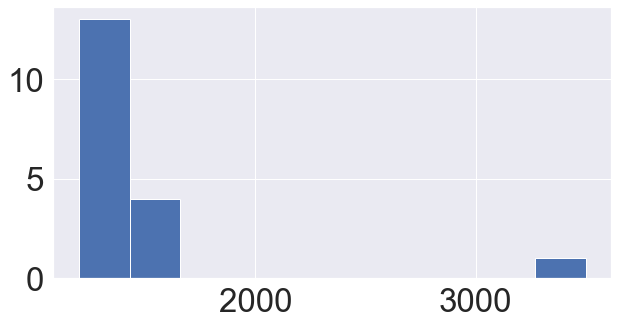

In [133]:
#인도네시아 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Indonesia']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Indonesia']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Indonesia']['altitude_mean_meters'],bins=10)

In [134]:
data[data['Country.of.Origin']=='Indonesia'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Sweetness             0.226510  0.423299    0.662866  0.810788  0.037687   
Acidity               0.441617  0.762560    0.826424  1.000000  0.484270   
Uniformity            0.200149  0.389632    0.700118  0.514300  0.097288   
Balance               0.678666  0.892129    0.909121  0.871477  0.699233   
Aftertaste            0.569201  0.828558    1.000000  0.826424  0.598458   
Total.Cup.Points      0.698854  0.895300    0.934423  0.836288  0.685184   
Flavor                0.744028  1.000000    0.828558  0.762560  0.757163   
Aroma                 1.000000  0.744028    0.569201  0.441617  0.600914   
Cupper.Points         0.302670  0.374891    0.440503  0.349195  0.259461   
Quakers               0.071716  0.189856    0.119106  0.148826  0.211120   
Moisture             -0.328598 -0.303293   -0.424391 -0.171619 -0.454540   
Body                  0.600914  0.757163    0.598458  0.484270  1.000000   
Clean.Cup             0.048994  0.113027    0.300842 -0.102857  0.096230   
Category.Two.Defects -0.298125 -0.314683   -0.496567 -0.614903 -0.065740   
Category.One.Defects -0.281301 -0.438488   -0.604287 -0.783231 -0.105163   
altitude_mean_meters -0.231605 -0.400475   -0.618607 -0.771770  0.022463   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Sweetness             0.679020    0.688247  -0.052632   1.000000   
Acidity               0.871477    0.514300  -0.102857   0.810788   
Uniformity            0.501587    1.000000   0.688247   0.688247   
Balance               1.000000    0.501587   0.011412   0.679020   
Aftertaste            0.909121    0.700118   0.300842   0.662866   
Total.Cup.Points      0.938542    0.586541   0.184582   0.622788   
Flavor                0.892129    0.389632   0.113027   0.423299   
Aroma                 0.678666    0.200149   0.048994   0.226510   
Cupper.Points         0.403313    0.218303   0.031204   0.269289   
Quakers               0.176887    0.076472   0.052632   0.052632   
Moisture             -0.384022   -0.188638  -0.154326  -0.105334   
Body                  0.699233    0.097288   0.096230   0.037687   
Clean.Cup             0.011412    0.688247   1.000000  -0.052632   
Category.Two.Defects -0.594075   -0.494122   0.117016  -0.797172   
Category.One.Defects -0.646611   -0.594028   0.072148  -0.889824   
altitude_mean_meters -0.629615   -0.666304   0.063951  -0.978112   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Sweetness                  0.269289          0.622788 -0.105334   
Acidity                    0.349195          0.836288 -0.171619   
Uniformity                 0.218303          0.586541 -0.188638   
Balance                    0.403313          0.938542 -0.384022   
Aftertaste                 0.440503          0.934423 -0.424391   
Total.Cup.Points           0.620256          1.000000 -0.409282   
Flavor                     0.374891          0.895300 -0.303293   
Aroma                      0.302670          0.698854 -0.328598   
Cupper.Points              1.000000          0.620256 -0.290301   
Quakers                   -0.810393         -0.071622  0.056341   
Moisture                  -0.290301         -0.409282  1.000000   
Body                       0.259461          0.685184 -0.454540   
Clean.Cup                  0.031204          0.184582 -0.154326   
Category.Two.Defects      -0.103963         -0.474724  0.264824   
Category.One.Defects      -0.245519         -0.601876  0.122006   
altitude_mean_meters      -0.186350         -0.565402  0.016241   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Sweetness                        -0.889824  0.052632             -0.797172   
Acidity                          -0.783231  0.148826             -0.614903   
Uniformity                       -0.594028  0.076472             -0.494122   
Balance                          -0.646611  0.176887             -0.594075   
Aftertaste                       -0.604287  0

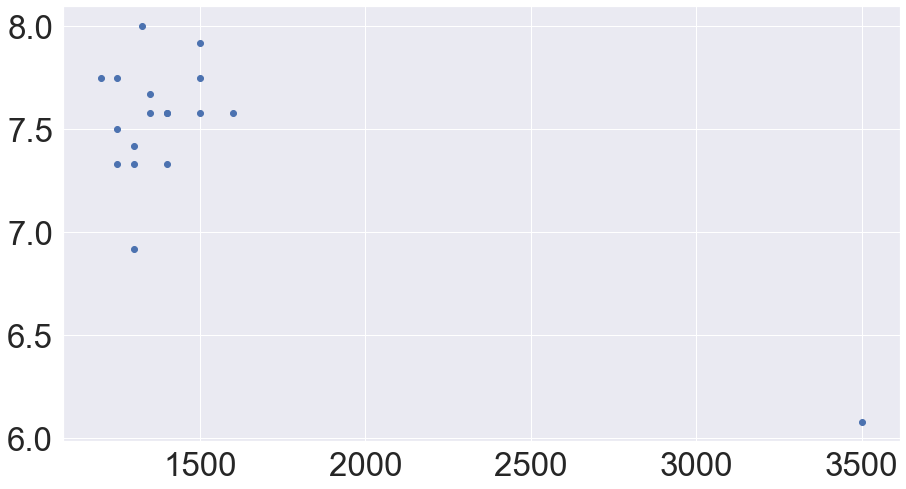

In [135]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Indonesia']['altitude_mean_meters'],data[data['Country.of.Origin']=='Indonesia']['Acidity'])

In [136]:
#인도네시아는 상관관계가 뚜렷한 변수가 없고 결측치 비율이 적으므로 대표값(평균)으로 대체
index_na_M=data[(data['Country.of.Origin']=='Indonesia') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='Indonesia']['altitude_mean_meters'])
data[data['Country.of.Origin']=='Indonesia'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  1
alti결측행개수: 0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1699.5, 1699.6, 1699.7, 1699.8, 1699.9, 1700. , 1700.1, 1700.2,
        1700.3, 1700.4, 1700.5]),
 <BarContainer object of 10 artists>)

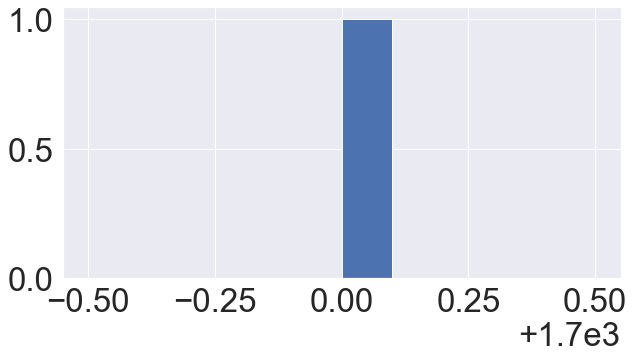

In [137]:
#파푸아뉴기니 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Papua New Guinea']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Papua New Guinea']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Papua New Guinea']['altitude_mean_meters'],bins=10)

전체행개수:  21
alti결측행개수: 2


(array([4., 4., 0., 0., 1., 4., 1., 0., 2., 3.]),
 array([1200., 1230., 1260., 1290., 1320., 1350., 1380., 1410., 1440.,
        1470., 1500.]),
 <BarContainer object of 10 artists>)

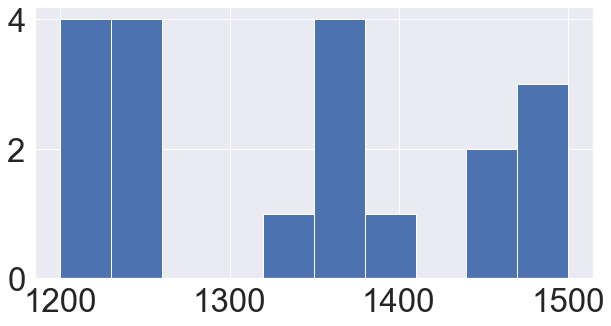

In [138]:
#엘살바도르 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='El Salvador']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='El Salvador']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='El Salvador']['altitude_mean_meters'],bins=10)

In [139]:
data[data['Country.of.Origin']=='El Salvador'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Uniformity           -0.390663 -0.233144    0.066451  0.139439 -0.125631   
Category.Two.Defects -0.077682 -0.095544   -0.303121 -0.597518 -0.189611   
Category.One.Defects  0.085288 -0.240199   -0.090731 -0.005514 -0.229085   
Acidity               0.110959  0.432311    0.732384  1.000000  0.124015   
Aftertaste            0.309968  0.713866    1.000000  0.732384  0.219363   
Clean.Cup             0.209917 -0.101104   -0.265095 -0.232723  0.136278   
Flavor                0.718035  1.000000    0.713866  0.432311  0.449030   
Moisture              0.245175  0.509890    0.552757  0.385866  0.087970   
Total.Cup.Points      0.676725  0.846496    0.765082  0.674441  0.556360   
Sweetness            -0.016167 -0.169634   -0.111621  0.011389 -0.290559   
Quakers              -0.210903 -0.418088   -0.332278 -0.146837 -0.314055   
Aroma                 1.000000  0.718035    0.309968  0.110959  0.408992   
Cupper.Points         0.740713  0.856933    0.565870  0.447226  0.627125   
Body                  0.408992  0.449030    0.219363  0.124015  1.000000   
Balance               0.523733  0.629648    0.459838  0.383742  0.542142   
altitude_mean_meters  0.330848  0.067548   -0.184136 -0.231849  0.361129   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Uniformity           -0.656280    1.000000   0.447368   0.153897   
Category.Two.Defects -0.436953    0.202303   0.162966  -0.219089   
Category.One.Defects -0.224391    0.099340   0.099340   0.193649   
Acidity               0.383742    0.139439  -0.232723   0.011389   
Aftertaste            0.459838    0.066451  -0.265095  -0.111621   
Clean.Cup            -0.324525    0.447368   1.000000   0.153897   
Flavor                0.629648   -0.233144  -0.101104  -0.169634   
Moisture              0.575021   -0.386290  -0.469919  -0.191489   
Total.Cup.Points      0.614321   -0.032733   0.071418   0.076957   
Sweetness            -0.300127    0.153897   0.153897   1.000000   
Quakers              -0.101867    0.072548   0.072548   0.141421   
Aroma                 0.523733   -0.390663   0.209917  -0.016167   
Cupper.Points         0.644673   -0.218817  -0.019537   0.019043   
Body                  0.542142   -0.125631   0.136278  -0.290559   
Balance               1.000000   -0.656280  -0.324525  -0.300127   
altitude_mean_meters  0.384438   -0.537952  -0.054304   0.186275   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Uniformity                -0.218817         -0.032733 -0.386290   
Category.Two.Defects      -0.301220         -0.410888 -0.360854   
Category.One.Defects      -0.287631         -0.119820 -0.240530   
Acidity                    0.447226          0.674441  0.385866   
Aftertaste                 0.565870          0.765082  0.552757   
Clean.Cup                 -0.019537          0.071418 -0.469919   
Flavor                     0.856933          0.846496  0.509890   
Moisture                   0.396772          0.403304  1.000000   
Total.Cup.Points           0.901885          1.000000  0.403304   
Sweetness                  0.019043          0.076957 -0.191489   
Quakers                   -0.253144         -0.294712 -0.175658   
Aroma                      0.740713          0.676725  0.245175   
Cupper.Points              1.000000          0.901885  0.396772   
Body                       0.627125          0.556360  0.087970   
Balance                    0.644673          0.614321  0.575021   
altitude_mean_meters       0.341785          0.125397  0.079187   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Uniformity                        0.099340  0.072548              0.202303   
Category.Two.Defects              0.056569  0.131681              1.000000   
Category.One.Defects              1.000000 -0.068465              0.056569   
Acidity                          -0.005514 -0.146837             -0.597518   
Aftertaste                       -0.090731 -0

In [140]:
#엘살바도르는 상관관계가 뚜렷한 변수가 없고 결측치 비율이 적으므로 대표값(평균)으로 대체
index_na_M=data[(data['Country.of.Origin']=='El Salvador') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='El Salvador']['altitude_mean_meters'])
data[data['Country.of.Origin']=='El Salvador'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  22
alti결측행개수: 6


(array([2., 0., 2., 0., 2., 5., 0., 0., 2., 3.]),
 array([ 900.,  935.,  970., 1005., 1040., 1075., 1110., 1145., 1180.,
        1215., 1250.]),
 <BarContainer object of 10 artists>)

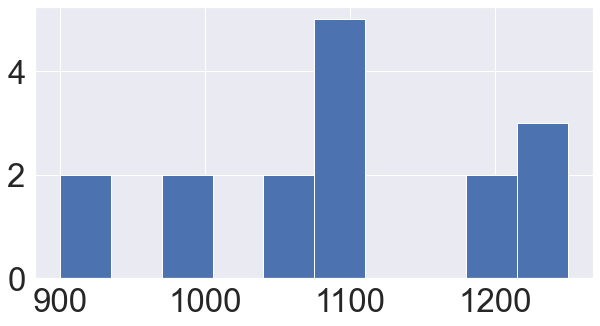

In [141]:
#니카라과 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Nicaragua']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Nicaragua']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Nicaragua']['altitude_mean_meters'],bins=10)

In [142]:
data[data['Country.of.Origin']=='Nicaragua'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Moisture              0.238090 -0.071745    0.001248  0.041636 -0.081077   
Cupper.Points         0.634869  0.791233    0.850877  0.836857  0.829150   
Aroma                 1.000000  0.604112    0.625132  0.578470  0.430673   
Acidity               0.578470  0.752852    0.835699  1.000000  0.789701   
Balance               0.603129  0.821523    0.912983  0.823453  0.886192   
Aftertaste            0.625132  0.897933    1.000000  0.835699  0.867222   
Category.One.Defects  0.053803 -0.167351   -0.213197 -0.392776 -0.170272   
Total.Cup.Points      0.359334  0.747501    0.811563  0.803544  0.867950   
Sweetness            -0.009934  0.396005    0.466746  0.515250  0.590064   
Quakers              -0.225077 -0.202703   -0.323866 -0.265285 -0.276457   
Body                  0.430673  0.816541    0.867222  0.789701  1.000000   
Uniformity           -0.027836  0.423590    0.481543  0.517213  0.620432   
Clean.Cup            -0.044151  0.438993    0.483301  0.505854  0.633448   
Flavor                0.604112  1.000000    0.897933  0.752852  0.816541   
Category.Two.Defects -0.125000 -0.346821   -0.442150 -0.338585 -0.336247   
altitude_mean_meters -0.220725  0.084387   -0.090005 -0.218820  0.021756   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Moisture             -0.084922   -0.142012  -0.121658  -0.159594   
Cupper.Points         0.824684    0.454281   0.445572   0.451223   
Aroma                 0.603129   -0.027836  -0.044151  -0.009934   
Acidity               0.823453    0.517213   0.505854   0.515250   
Balance               1.000000    0.584612   0.588159   0.565163   
Aftertaste            0.912983    0.481543   0.483301   0.466746   
Category.One.Defects -0.026168   -0.177481  -0.156445  -0.194826   
Total.Cup.Points      0.866067    0.885371   0.877373   0.869974   
Sweetness             0.565163    0.986215   0.947882   1.000000   
Quakers              -0.241898    0.094452   0.102943   0.082985   
Body                  0.886192    0.620432   0.633448   0.590064   
Uniformity            0.584612    1.000000   0.987538   0.986215   
Clean.Cup             0.588159    0.987538   1.000000   0.947882   
Flavor                0.821523    0.423590   0.438993   0.396005   
Category.Two.Defects -0.369233   -0.114386  -0.066414  -0.161747   
altitude_mean_meters -0.180431    0.033951   0.070888  -0.005694   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Moisture                   0.256933         -0.059211  1.000000   
Cupper.Points              1.000000          0.780074  0.256933   
Aroma                      0.634869          0.359334  0.238090   
Acidity                    0.836857          0.803544  0.041636   
Balance                    0.824684          0.866067 -0.084922   
Aftertaste                 0.850877          0.811563  0.001248   
Category.One.Defects      -0.222541         -0.210798  0.121014   
Total.Cup.Points           0.780074          1.000000 -0.059211   
Sweetness                  0.451223          0.869974 -0.159594   
Quakers                   -0.219691         -0.091136 -0.131636   
Body                       0.829150          0.867950 -0.081077   
Uniformity                 0.454281          0.885371 -0.142012   
Clean.Cup                  0.445572          0.877373 -0.121658   
Flavor                     0.791233          0.747501 -0.071745   
Category.Two.Defects      -0.364350         -0.273642 -0.044786   
altitude_mean_meters      -0.343644         -0.056345 -0.503471   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Moisture                          0.121014 -0.131636             -0.044786   
Cupper.Points                    -0.222541 -0.219691             -0.364350   
Aroma                             0.053803 -0.225077             -0.125000   
Acidity                          -0.392776 -0.265285             -0.338585   
Balance                          -0.026168 -0

In [143]:
#니카라과는 상관관계가 뚜렷한 변수가 없고 결측치 비율이 적으므로 대표값(평균)으로 대체
index_na_M=data[(data['Country.of.Origin']=='Nicaragua') & (data['altitude_mean_meters'].isnull())].index
for i in index_na_M:
    data.iloc[i,19]=np.nanmean(data[data['Country.of.Origin']=='Nicaragua']['altitude_mean_meters'])
data[data['Country.of.Origin']=='Nicaragua'].isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

전체행개수:  1
alti결측행개수: 0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([799.5, 799.6, 799.7, 799.8, 799.9, 800. , 800.1, 800.2, 800.3,
        800.4, 800.5]),
 <BarContainer object of 10 artists>)

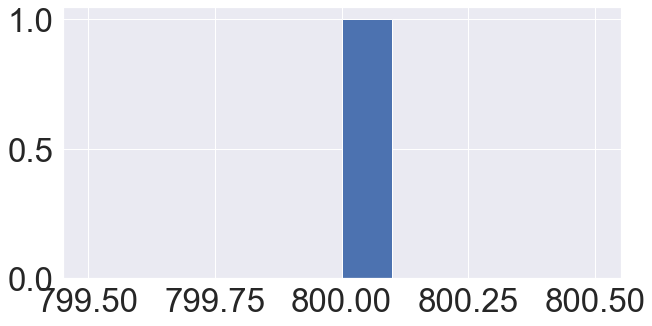

In [144]:
#에콰도르 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Ecuador']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Ecuador']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Ecuador']['altitude_mean_meters'],bins=10)

전체행개수:  4
alti결측행개수: 0


(array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0.]),
 array([259.628512, 259.728512, 259.828512, 259.928512, 260.028512,
        260.128512, 260.228512, 260.328512, 260.428512, 260.528512,
        260.628512]),
 <BarContainer object of 10 artists>)

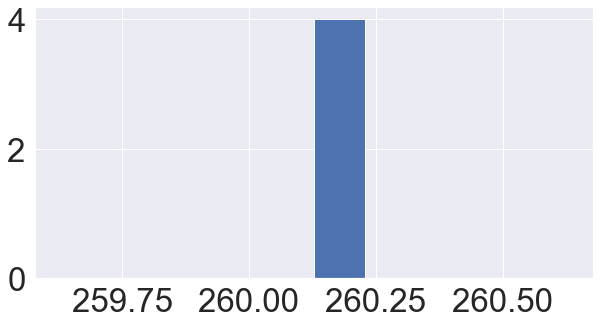

In [145]:
#푸에르토리코 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='United States (Puerto Rico)']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='United States (Puerto Rico)']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='United States (Puerto Rico)']['altitude_mean_meters'],bins=10)

전체행개수:  6
alti결측행개수: 0


(array([2., 0., 0., 0., 0., 0., 0., 2., 0., 2.]),
 array([ 350.,  417.,  484.,  551.,  618.,  685.,  752.,  819.,  886.,
         953., 1020.]),
 <BarContainer object of 10 artists>)

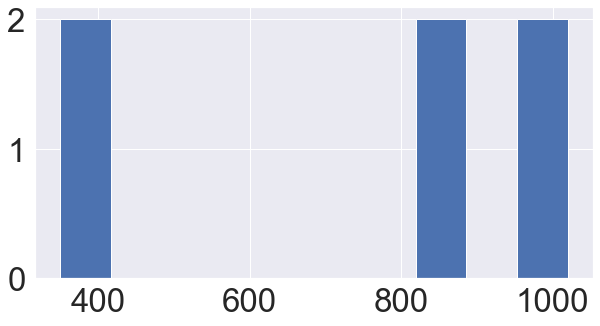

In [146]:
#아이티 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Haiti']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Haiti']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Haiti']['altitude_mean_meters'],bins=10)

전체행개수:  2
alti결측행개수: 0


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1700., 1718., 1736., 1754., 1772., 1790., 1808., 1826., 1844.,
        1862., 1880.]),
 <BarContainer object of 10 artists>)

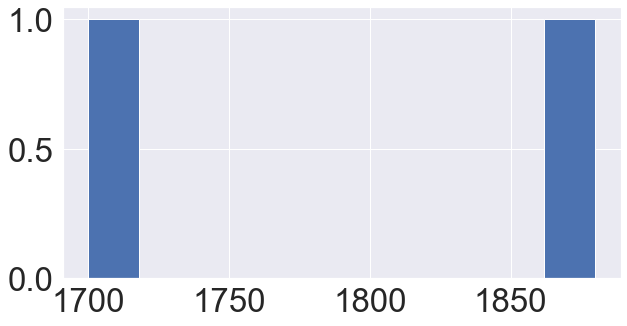

In [147]:
#브룬디 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Burundi']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Burundi']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Burundi']['altitude_mean_meters'],bins=10)

전체행개수:  8
alti결측행개수: 1


(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1040., 1091., 1142., 1193., 1244., 1295., 1346., 1397., 1448.,
        1499., 1550.]),
 <BarContainer object of 10 artists>)

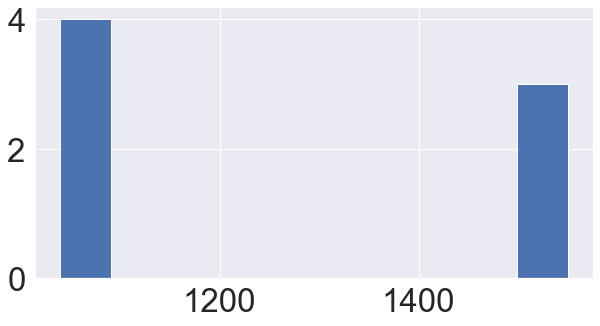

In [148]:
#베트남 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Vietnam']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Vietnam']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Vietnam']['altitude_mean_meters'],bins=10)

In [149]:
data[data['Country.of.Origin']=='Vietnam'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Uniformity            0.108642  0.312213    0.121576 -0.080748  0.566614   
Body                  0.637248  0.570565    0.543341  0.570886  1.000000   
Moisture             -0.614536 -0.118157   -0.342772 -0.689483 -0.288962   
Category.One.Defects -0.749195 -0.681621   -0.798369 -0.775819 -0.721770   
Category.Two.Defects -0.017261 -0.353787   -0.471331 -0.103410  0.248105   
Cupper.Points        -0.422182 -0.290974    0.101209 -0.035351 -0.214525   
Total.Cup.Points      0.757629  0.747353    0.833263  0.715767  0.811373   
Flavor                0.804455  1.000000    0.649044  0.254099  0.570565   
Aftertaste            0.547478  0.649044    1.000000  0.800362  0.543341   
Acidity               0.491097  0.254099    0.800362  1.000000  0.570886   
Aroma                 1.000000  0.804455    0.547478  0.491097  0.637248   
Balance               0.480697  0.252890    0.304417  0.396548  0.292724   
altitude_mean_meters  0.366001 -0.089310    0.031409  0.294367 -0.634355   
Clean.Cup             0.715152  0.711079    0.855358  0.783019  0.758903   
Sweetness             0.715152  0.711079    0.855358  0.783019  0.758903   
Quakers                    NaN       NaN         NaN       NaN       NaN   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Uniformity            0.245211    1.000000   0.269766   0.269766   
Body                  0.292724    0.566614   0.758903   0.758903   
Moisture             -0.291063    0.486112  -0.364186  -0.364186   
Category.One.Defects -0.499653   -0.225209  -0.984655  -0.984655   
Category.Two.Defects -0.326806    0.060911  -0.344447  -0.344447   
Cupper.Points        -0.088289    0.301736  -0.283247  -0.283247   
Total.Cup.Points      0.597961    0.463279   0.950496   0.950496   
Flavor                0.252890    0.312213   0.711079   0.711079   
Aftertaste            0.304417    0.121576   0.855358   0.855358   
Acidity               0.396548   -0.080748   0.783019   0.783019   
Aroma                 0.480697    0.108642   0.715152   0.715152   
Balance               1.000000    0.245211   0.489673   0.489673   
altitude_mean_meters  0.600140   -0.680278        NaN        NaN   
Clean.Cup             0.489673    0.269766   1.000000   1.000000   
Sweetness             0.489673    0.269766   1.000000   1.000000   
Quakers                    NaN         NaN        NaN        NaN   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Uniformity                 0.301736          0.463279  0.486112   
Body                      -0.214525          0.811373 -0.288962   
Moisture                   0.290552         -0.317074  1.000000   
Category.One.Defects       0.335977         -0.923423  0.419754   
Category.Two.Defects      -0.047969         -0.280722 -0.280753   
Cupper.Points              1.000000         -0.102282  0.290552   
Total.Cup.Points          -0.102282          1.000000 -0.317074   
Flavor                    -0.290974          0.747353 -0.118157   
Aftertaste                 0.101209          0.833263 -0.342772   
Acidity                   -0.035351          0.715767 -0.689483   
Aroma                     -0.422182          0.757629 -0.614536   
Balance                   -0.088289          0.597961 -0.291063   
altitude_mean_meters      -0.257724         -0.141472 -0.585352   
Clean.Cup                 -0.283247          0.950496 -0.364186   
Sweetness                 -0.283247          0.950496 -0.364186   
Quakers                         NaN               NaN       NaN   

                      Category.One.Defects  Quakers  Category.Two.Defects  \
Uniformity                       -0.225209      NaN              0.060911   
Body                             -0.721770      NaN              0.248105   
Moisture                          0.419754      NaN             -0.280753   
Category.One.Defects              1.000000      NaN              0.304457   
Category.Two.Defects              0.304457      Na

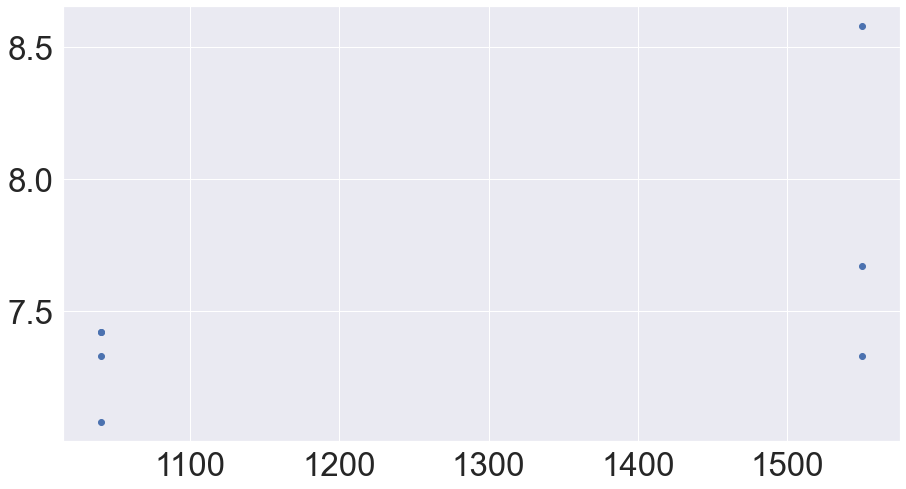

In [150]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='Vietnam']['altitude_mean_meters'],data[data['Country.of.Origin']=='Vietnam']['Balance'])

In [151]:
#베트남은 대체 근거 찾기 힘듦 ->삭제 판단
index_del_col=data[ (data['Country.of.Origin']=='Vietnam') & data['altitude_mean_meters'].isnull()  ].index
data.drop(index_del_col,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
0     Arabica          Ethiopia         2014      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia         2014      Washed / Wet   8.75    8.67   
2     Arabica          Ethiopia         2014     Natural / Dry   8.17    8.58   
3     Arabica          Ethiopia         2014      Washed / Wet   8.25    8.50   
4     Arabica            Brazil         2013     Natural / Dry   8.58    8.42   
...       ...               ...          ...               ...    ...     ...   
1165  Robusta             India         2014     Natural / Dry   7.67    7.67   
1166  Robusta             India         2013     Natural / Dry   7.58    7.42   
1167  Robusta     United States         2012     Natural / Dry   7.92    7.50   
1168  Robusta     United States         2014     Natural / Dry   7.33    7.33   
1169  Robusta             India         2013     Natural / Dry   7.42    6.83   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0           8.67     8.75  8.50     8.42       10.00      10.00      10.00   
1           8.50     8.58  8.42     8.42       10.00      10.00      10.00   
2           8.42     8.42  8.50     8.25       10.00      10.00      10.00   
3           8.25     8.50  8.42     8.33       10.00      10.00      10.00   
4           8.42     8.50  8.25     8.33       10.00      10.00      10.00   
...          ...      ...   ...      ...         ...        ...        ...   
1165        7.50     7.33  7.58     7.50       10.00      10.00       7.42   
1166        7.42     7.83  7.42     7.50       10.00      10.00       7.42   
1167        7.42     7.42  7.42     7.42        9.33      10.00       7.58   
1168        7.17     7.42  7.50     7.17        9.33       9.33       7.42   
1169        6.75     7.17  7.25     7.00        9.33       9.33       7.08   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1165           7.50             80.17      0.00                     0   
1166           7.58             80.17      0.00                     0   
1167           7.33             79.33      0.00                     0   
1168           7.17             77.17      0.00                     0   
1169           6.92             75.08      0.10                    20   

      Quakers  Category.Two.Defects  altitude_mean_meters  
0         0.0                     0                2075.0  
1         0.0                     1                2075.0  
2         0.0                     2                2000.0  
3         0.0                     2                2075.0  
4         0.0                     1                1175.0  
...       ...                   ...                   ...  
1165      0.0                     1                 750.0  
1166      0.0                     0                 750.0  
1167      0.0                     0                3000.0  
1168      0.0                     6                 795.0  
1169      0.0                     1                   NaN  

[1170 rows x 20 columns]

전체행개수:  5
alti결측행개수: 0


(array([1., 0., 0., 2., 0., 0., 1., 0., 0., 1.]),
 array([1000., 1060., 1120., 1180., 1240., 1300., 1360., 1420., 1480.,
        1540., 1600.]),
 <BarContainer object of 10 artists>)

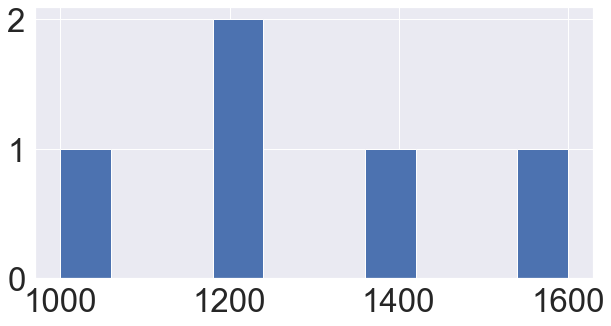

In [152]:
#필리핀 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Philippines']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Philippines']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Philippines']['altitude_mean_meters'],bins=10)

전체행개수:  1
alti결측행개수: 0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1899.5, 1899.6, 1899.7, 1899.8, 1899.9, 1900. , 1900.1, 1900.2,
        1900.3, 1900.4, 1900.5]),
 <BarContainer object of 10 artists>)

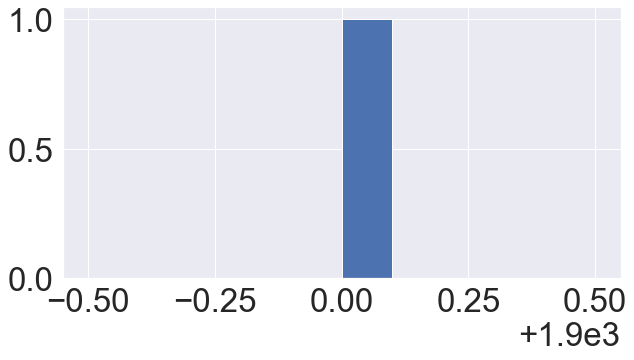

In [153]:
#르완다 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Rwanda']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Rwanda']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Rwanda']['altitude_mean_meters'],bins=10)

전체행개수:  11
alti결측행개수: 0


(array([3., 2., 2., 2., 1., 0., 0., 0., 0., 1.]),
 array([ 995. , 1145.5, 1296. , 1446.5, 1597. , 1747.5, 1898. , 2048.5,
        2199. , 2349.5, 2500. ]),
 <BarContainer object of 10 artists>)

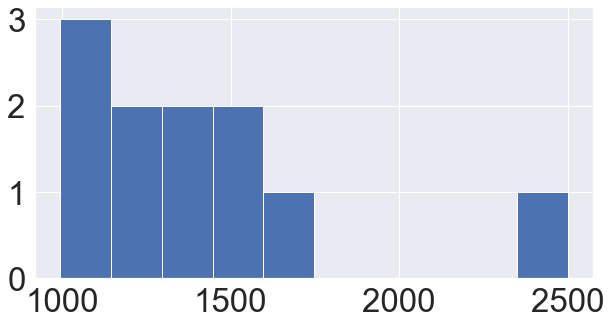

In [154]:
#말라위 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Malawi']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Malawi']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Malawi']['altitude_mean_meters'],bins=10)

전체행개수:  3
alti결측행개수: 0


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1250., 1255., 1260., 1265., 1270., 1275., 1280., 1285., 1290.,
        1295., 1300.]),
 <BarContainer object of 10 artists>)

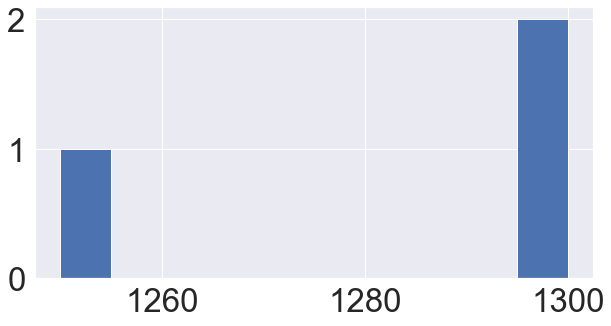

In [155]:
#라오스 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Laos']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Laos']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Laos']['altitude_mean_meters'],bins=10)

전체행개수:  6
alti결측행개수: 0


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([ 278.70912 ,  635.338208,  991.967296, 1348.596384, 1705.225472,
        2061.85456 , 2418.483648, 2775.112736, 3131.741824, 3488.370912,
        3845.      ]),
 <BarContainer object of 10 artists>)

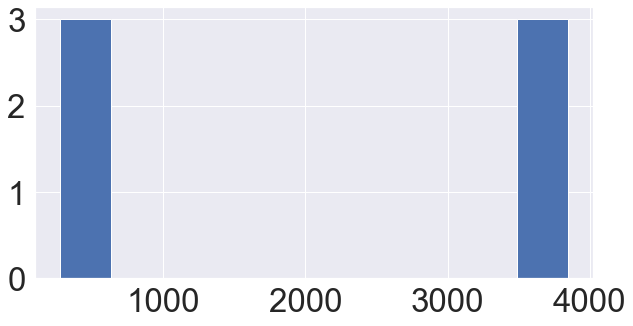

In [156]:
#미얀마 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Myanmar']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Myanmar']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Myanmar']['altitude_mean_meters'],bins=10)

전체행개수:  1
alti결측행개수: 0


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([199.5, 199.6, 199.7, 199.8, 199.9, 200. , 200.1, 200.2, 200.3,
        200.4, 200.5]),
 <BarContainer object of 10 artists>)

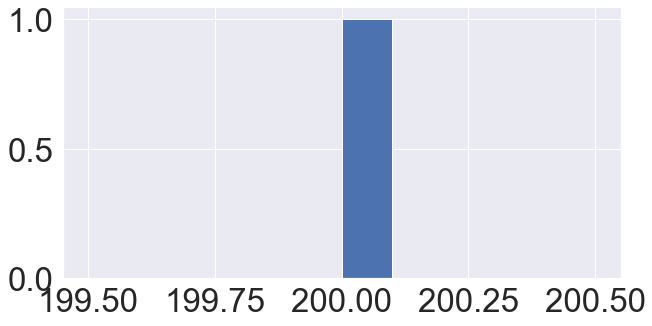

In [157]:
#코트디부아르 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='Cote d?Ivoire']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='Cote d?Ivoire']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='Cote d?Ivoire']['altitude_mean_meters'],bins=10)

전체행개수:  14
alti결측행개수: 2


(array([5., 4., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([ 750.,  992., 1234., 1476., 1718., 1960., 2202., 2444., 2686.,
        2928., 3170.]),
 <BarContainer object of 10 artists>)

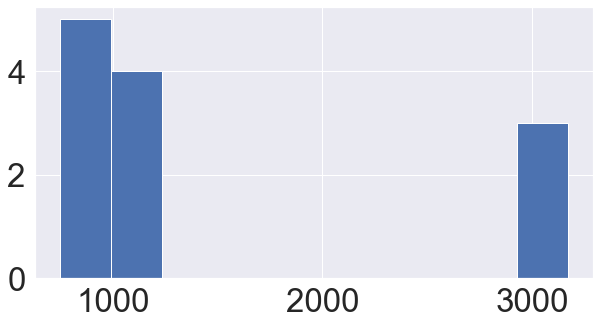

In [158]:
#인도 alt결측치 확인
plt.figure(figsize=(10,5))
plt.rc('font', size=20)
print("전체행개수: ",len(data[data['Country.of.Origin']=='India']) )
print("alti결측행개수:",data[data['Country.of.Origin']=='India']['altitude_mean_meters'].isnull().sum())
plt.hist(data[data['Country.of.Origin']=='India']['altitude_mean_meters'],bins=10)

In [159]:
data[data['Country.of.Origin']=='India'].corr().sort_values(by='altitude_mean_meters')

Aroma    Flavor  Aftertaste   Acidity      Body  \
Moisture             -0.519139 -0.235812   -0.328849 -0.060567  0.064220   
Cupper.Points         0.413890  0.734471    0.803726  0.603219  0.736011   
Category.Two.Defects  0.127805 -0.221367   -0.026656 -0.033194  0.016554   
Acidity               0.485227  0.612071    0.641472  1.000000  0.777114   
Sweetness             0.407400  0.714136    0.742105  0.878927  0.956879   
Aftertaste            0.693947  0.909221    1.000000  0.641472  0.850562   
Flavor                0.708090  1.000000    0.909221  0.612071  0.797280   
Balance               0.624508  0.825444    0.762835  0.743441  0.831806   
Body                  0.506350  0.797280    0.850562  0.777114  1.000000   
Total.Cup.Points      0.634703  0.910508    0.918163  0.838060  0.924690   
Aroma                 1.000000  0.708090    0.693947  0.485227  0.506350   
altitude_mean_meters  0.646116  0.469433    0.465610  0.390719  0.517819   
Uniformity            0.377075  0.810860    0.781579  0.812106  0.793304   
Clean.Cup             0.465659  0.806580    0.714851  0.359194  0.491189   
Category.One.Defects -0.465659 -0.806580   -0.714851 -0.359194 -0.491189   
Quakers              -0.046686 -0.295161   -0.347106 -0.744241 -0.586699   

                       Balance  Uniformity  Clean.Cup  Sweetness  \
Moisture             -0.063879   -0.096383  -0.335099   0.170417   
Cupper.Points         0.803311    0.748929   0.725966   0.652873   
Category.Two.Defects -0.160087   -0.095564  -0.292152  -0.030791   
Acidity               0.743441    0.812106   0.359194   0.878927   
Sweetness             0.790138    0.828984   0.408065   1.000000   
Aftertaste            0.762835    0.781579   0.714851   0.742105   
Flavor                0.825444    0.810860   0.806580   0.714136   
Balance               1.000000    0.729519   0.720471   0.790138   
Body                  0.831806    0.793304   0.491189   0.956879   
Total.Cup.Points      0.914212    0.898498   0.714568   0.893522   
Aroma                 0.624508    0.377075   0.465659   0.407400   
altitude_mean_meters  0.500841         NaN        NaN   0.451212   
Uniformity            0.729519    1.000000   0.679366   0.828984   
Clean.Cup             0.720471    0.679366   1.000000   0.408065   
Category.One.Defects -0.720471   -0.679366  -1.000000  -0.408065   
Quakers              -0.270750   -0.679366   0.076923  -0.718302   

                      Cupper.Points  Total.Cup.Points  Moisture  \
Moisture                  -0.188465         -0.151763  1.000000   
Cupper.Points              1.000000          0.849347 -0.188465   
Category.Two.Defects      -0.010474         -0.079585 -0.203177   
Acidity                    0.603219          0.838060 -0.060567   
Sweetness                  0.652873          0.893522  0.170417   
Aftertaste                 0.803726          0.918163 -0.328849   
Flavor                     0.734471          0.910508 -0.235812   
Balance                    0.803311          0.914212 -0.063879   
Body                       0.736011          0.924690  0.064220   
Total.Cup.Points           0.849347          1.000000 -0.151763   
Aroma                      0.413890          0.634703 -0.519139   
altitude_mean_meters       0.126510          0.587434  0.000304   
Uniformity                 0.748929          0.898498 -0.096383   
Clean.Cup                  0.725966          0.714568 -0.335099   
Category.One.Defects      -0.725966         -0.714568  0.335099   
Quakers                   -0.291627         -0.506251 -0.204141   

                      Category.One.Defects   Quakers  Category.Two.Defects  \
Moisture                          0.335099 -0.204141             -0.203177   
Cupper.Points                    -0.725966 -0.291627             -0.010474   
Category.Two.Defects              0.292152 -0.162307              1.000000   
Acidity                          -0.359194 -0.744241             -0.033194   
Sweetness                        -0.408065 -0

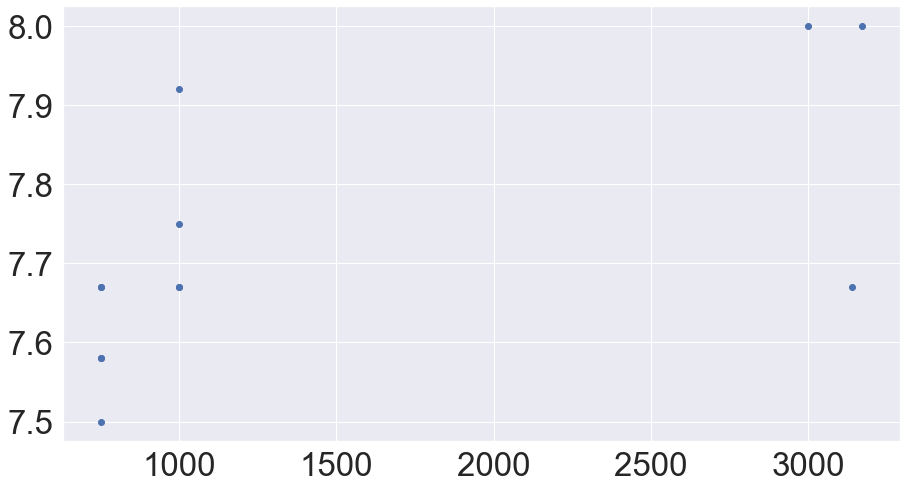

In [160]:
plt.figure(figsize=(15,8))
plt.scatter(data[data['Country.of.Origin']=='India']['altitude_mean_meters'],data[data['Country.of.Origin']=='India']['Aroma'])

In [161]:
#인도은 대체 근거 찾기 힘듦 ->삭제 판단
index_del_col=data[ (data['Country.of.Origin']=='India') & data['altitude_mean_meters'].isnull()  ].index
data.drop(index_del_col,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data.isnull().sum()

Species                 0
Country.of.Origin       0
Harvest.Year            0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

In [162]:
data

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
0     Arabica          Ethiopia         2014      Washed / Wet   8.67    8.83   
1     Arabica          Ethiopia         2014      Washed / Wet   8.75    8.67   
2     Arabica          Ethiopia         2014     Natural / Dry   8.17    8.58   
3     Arabica          Ethiopia         2014      Washed / Wet   8.25    8.50   
4     Arabica            Brazil         2013     Natural / Dry   8.58    8.42   
...       ...               ...          ...               ...    ...     ...   
1163  Robusta            Uganda         2013      Washed / Wet   7.75    7.42   
1164  Robusta             India         2014     Natural / Dry   7.67    7.67   
1165  Robusta             India         2013     Natural / Dry   7.58    7.42   
1166  Robusta     United States         2012     Natural / Dry   7.92    7.50   
1167  Robusta     United States         2014     Natural / Dry   7.33    7.33   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
0           8.67     8.75  8.50     8.42       10.00      10.00      10.00   
1           8.50     8.58  8.42     8.42       10.00      10.00      10.00   
2           8.42     8.42  8.50     8.25       10.00      10.00      10.00   
3           8.25     8.50  8.42     8.33       10.00      10.00      10.00   
4           8.42     8.50  8.25     8.33       10.00      10.00      10.00   
...          ...      ...   ...      ...         ...        ...        ...   
1163        7.33     7.58  7.67     7.58       10.00      10.00       7.67   
1164        7.50     7.33  7.58     7.50       10.00      10.00       7.42   
1165        7.42     7.83  7.42     7.50       10.00      10.00       7.42   
1166        7.42     7.42  7.42     7.42        9.33      10.00       7.58   
1167        7.17     7.42  7.50     7.17        9.33       9.33       7.42   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
0              8.75             90.58      0.12                     0   
1              8.58             89.92      0.12                     0   
2              8.67             89.00      0.11                     0   
3              8.58             88.83      0.12                     0   
4              8.33             88.83      0.11                     0   
...             ...               ...       ...                   ...   
1163           7.50             80.50      0.12                     0   
1164           7.50             80.17      0.00                     0   
1165           7.58             80.17      0.00                     0   
1166           7.33             79.33      0.00                     0   
1167           7.17             77.17      0.00                     0   

      Quakers  Category.Two.Defects  altitude_mean_meters  
0         0.0                     0                2075.0  
1         0.0                     1                2075.0  
2         0.0                     2                2000.0  
3         0.0                     2                2075.0  
4         0.0                     1                1175.0  
...       ...                   ...                   ...  
1163      0.0                     1                1200.0  
1164      0.0                     1                 750.0  
1165      0.0                     0                 750.0  
1166      0.0                     0                3000.0  
1167      0.0                     6                 795.0  

[1168 rows x 20 columns]

# 이상치 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c04507f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c0450eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c0450490>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c04595b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c0459910>],
 'means': []}

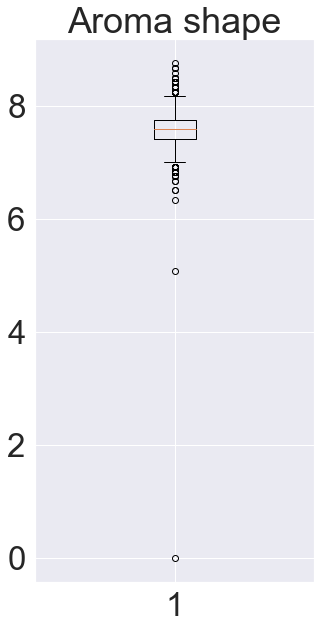

In [163]:
plt.figure(figsize=(5,10))
plt.title('Aroma shape')
plt.boxplot(data.Aroma)

In [164]:
data[data.Aroma<6]

Species Country.of.Origin Harvest.Year Processing.Method  Aroma  Flavor  \
590   Arabica          Colombia         2016      Washed / Wet   5.08    7.75   
1143  Arabica          Honduras         2017      Washed / Wet   0.00    0.00   

      Aftertaste  Acidity  Body  Balance  Uniformity  Clean.Cup  Sweetness  \
590         7.83     7.75  7.83     8.08        10.0       10.0       10.0   
1143        0.00     0.00  0.00     0.00         0.0        0.0        0.0   

      Cupper.Points  Total.Cup.Points  Moisture  Category.One.Defects  \
590            8.08             82.42      0.11                     0   
1143           0.00              0.00      0.12                     0   

      Quakers  Category.Two.Defects  altitude_mean_meters  
590       0.0                     1                1600.0  
1143      0.0                     2                1400.0

In [165]:
#1143행은 명백한 이상subject, 590도 분석 용이를 위해 삭제
data.drop([1143,590],axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c04a4c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c04b6340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c04a48e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c04b6a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c04b6d60>],
 'means': []}

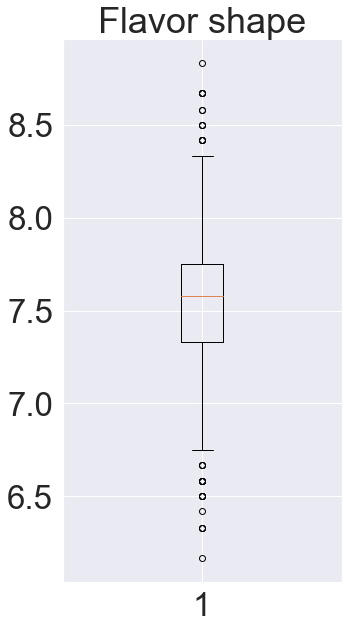

In [166]:
plt.figure(figsize=(5,10))
plt.title('Flavor shape')
plt.boxplot(data.Flavor)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c0500c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c050e370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c0500910>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c050ea30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c050ed90>],
 'means': []}

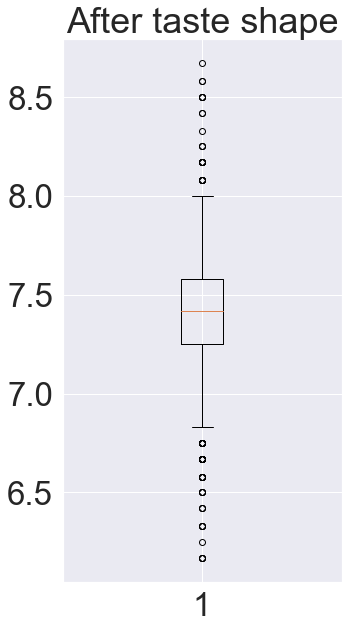

In [167]:
plt.figure(figsize=(5,10))
plt.title('After taste shape')
plt.boxplot(data.Aftertaste)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c0559ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c05693a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c0559940>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c0569a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c0569dc0>],
 'means': []}

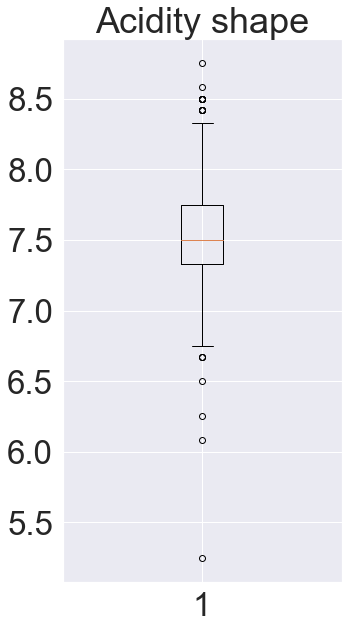

In [168]:
plt.figure(figsize=(5,10))
plt.title('Acidity shape')
plt.boxplot(data.Acidity)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c05be790>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c05bedc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c05be430>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c05cc4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c05cc820>],
 'means': []}

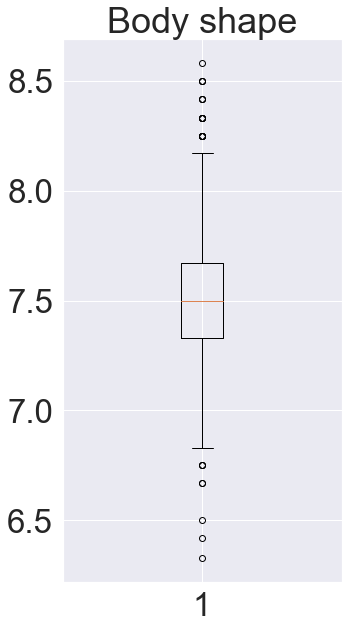

In [169]:
plt.figure(figsize=(5,10))
plt.title('Body shape')
plt.boxplot(data.Body)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c0619730>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c0619df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c06193d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c06284f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c0628850>],
 'means': []}

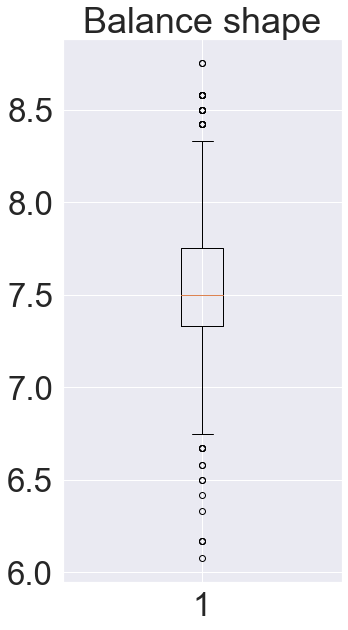

In [170]:
plt.figure(figsize=(5,10))
plt.title('Balance shape')
plt.boxplot(data.Balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c0670e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c0681580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c0670b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c0681a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c0681dc0>],
 'means': []}

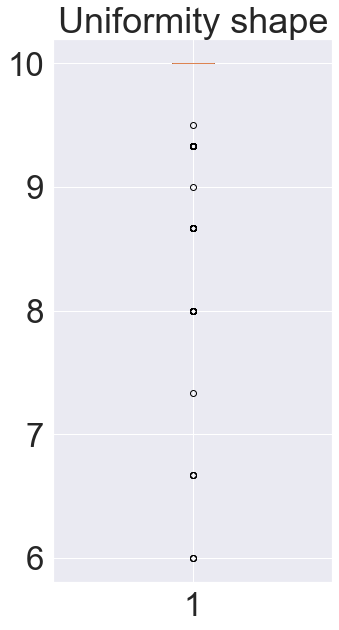

In [171]:
plt.figure(figsize=(5,10))
plt.title('Uniformity shape')
plt.boxplot(data.Uniformity)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c18d6280>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c18d6940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c18c7f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c18e1040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c18e13a0>],
 'means': []}

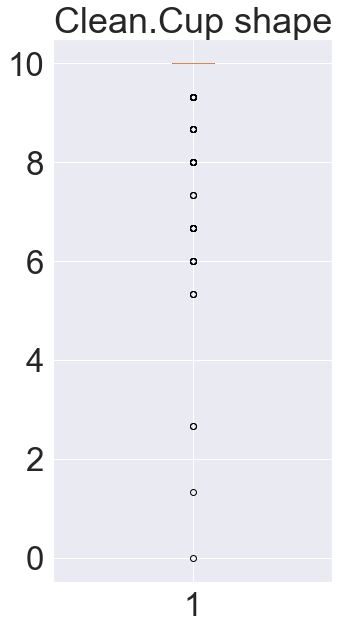

In [172]:
#클린컵이란 커피의 첫맛부터 끝맛까지 얼마나 부정적인 향이 덜 나는가에 대한 긍정지표
plt.figure(figsize=(5,10))
plt.title('Clean.Cup shape')
plt.boxplot(data['Clean.Cup'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c1924f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c1935520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c1924cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c1935bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c1935ee0>],
 'means': []}

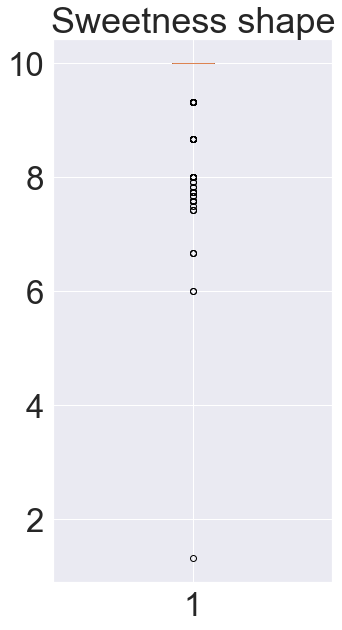

In [173]:
plt.figure(figsize=(5,10))
plt.title('Sweetness shape')
plt.boxplot(data['Sweetness'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c19874c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c1987b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c1987130>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c1991280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c19915e0>],
 'means': []}

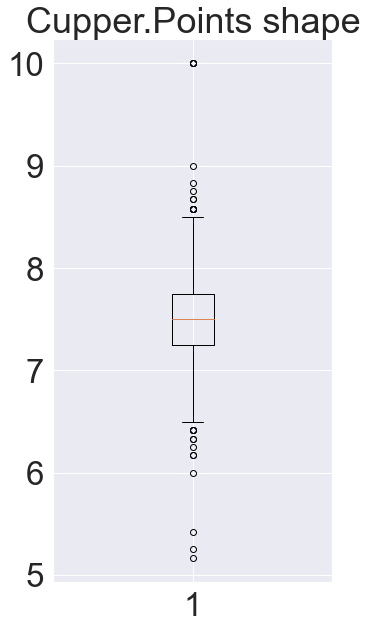

In [174]:
plt.figure(figsize=(5,10))
plt.title('Cupper.Points shape')
plt.boxplot(data['Cupper.Points'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c19e70a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c19e7700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c19d7d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c19e7dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c19f4160>],
 'means': []}

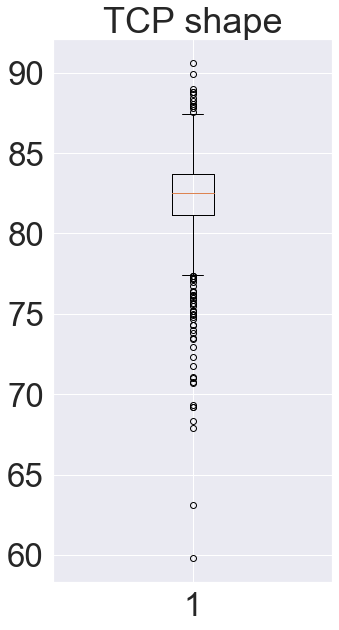

In [175]:
plt.figure(figsize=(5,10))
plt.title('TCP shape')
plt.boxplot(data['Total.Cup.Points'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c199e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c19fe610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c1a35f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c199ee20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c1a51190>],
 'means': []}

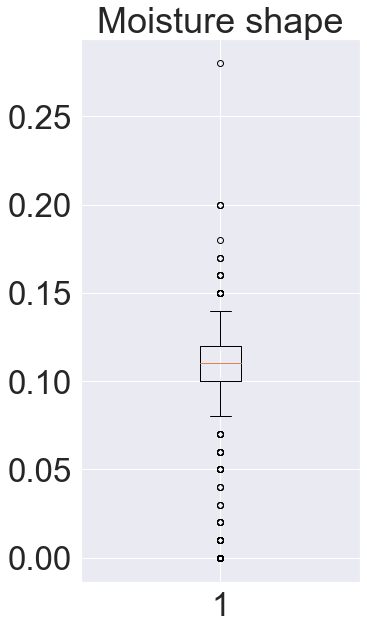

In [176]:
plt.figure(figsize=(5,10))
plt.title('Moisture shape')
plt.boxplot(data['Moisture'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c1a93be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c1aa3310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c1a93820>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c1aa39a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c1aa3cd0>],
 'means': []}

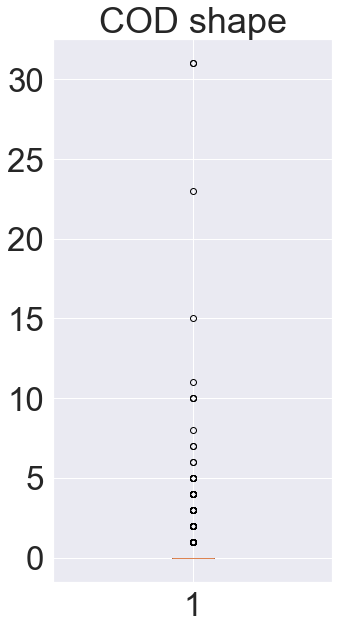

In [177]:
plt.figure(figsize=(5,10))
plt.title('COD shape')
plt.boxplot(data['Category.One.Defects'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c1af3bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c1afe2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c1af3850>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c1afe970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c1afecd0>],
 'means': []}

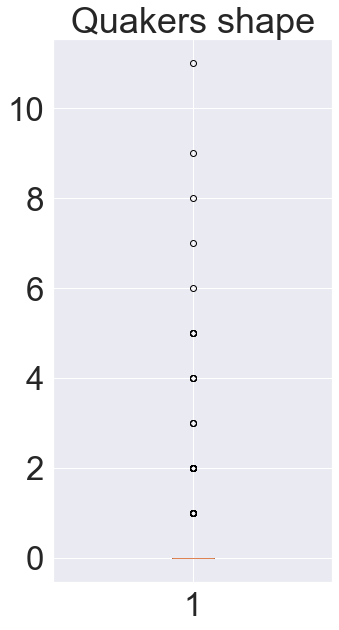

In [178]:
plt.figure(figsize=(5,10))
plt.title('Quakers shape')
plt.boxplot(data['Quakers'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c1b50940>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c1b50fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c1b505e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c1b5d5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c1b5d850>],
 'means': []}

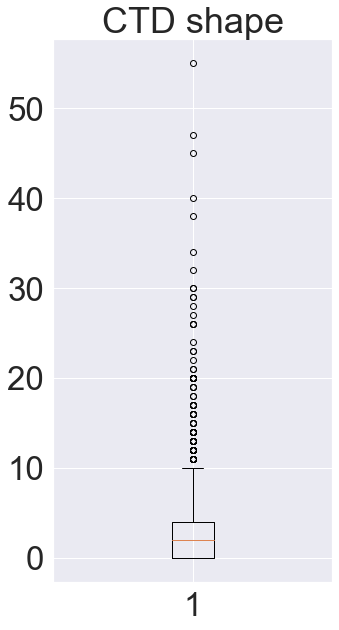

In [179]:
plt.figure(figsize=(5,10))
plt.title('CTD shape')
plt.boxplot(data['Category.Two.Defects'])

# 다변량 분석을 위한 차원축소

## 후보 종속변수들의 정규성 확인

In [180]:
data.columns

Index(['Species', 'Country.of.Origin', 'Harvest.Year', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects', 'altitude_mean_meters'],
      dtype='object')

In [181]:
col_y=['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects']

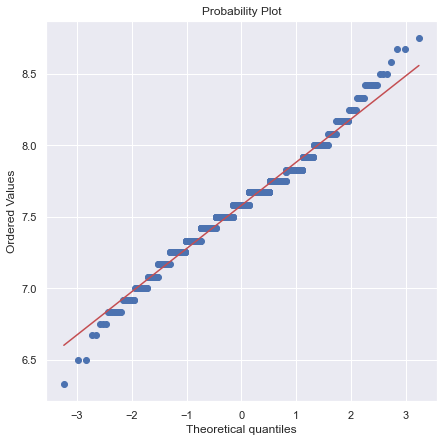

In [182]:
import scipy.stats as stats
plt.figure(figsize=(7,7))
sns.set(font_scale = 1)
a=stats.probplot(data.Aroma,dist=stats.norm,plot=plt)
plt.show()

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([6.17, 6.33, 6.33, ..., 8.67, 8.67, 8.83])),
 (0.33004049084160186, 7.529271012006862, 0.9877553547418955))

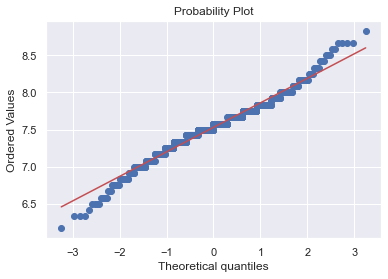

In [183]:
stats.probplot(data.Flavor,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([6.17, 6.17, 6.17, ..., 8.58, 8.58, 8.67])),
 (0.33980570213580147, 7.403979416809604, 0.9903481781862334))

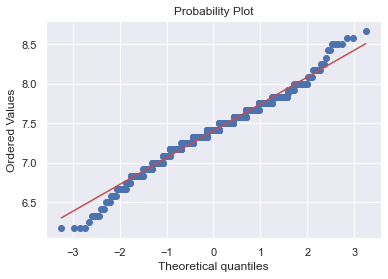

In [184]:
stats.probplot(data.Aftertaste,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([5.25, 6.08, 6.25, ..., 8.5 , 8.58, 8.75])),
 (0.31641322536694955, 7.538293310463121, 0.9848960524988153))

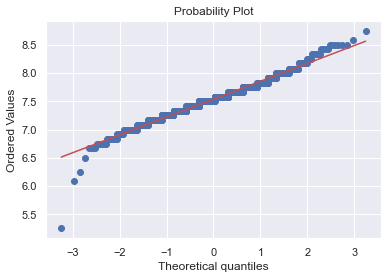

In [185]:
stats.probplot(data.Acidity,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([6.33, 6.42, 6.5 , ..., 8.5 , 8.5 , 8.58])),
 (0.2827657698006932, 7.519442538593481, 0.9922320260734911))

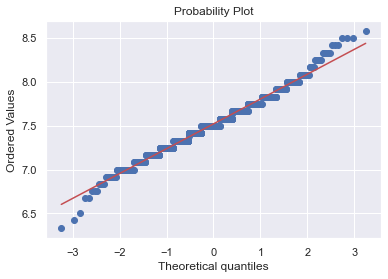

In [186]:
stats.probplot(data.Body,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([6.08, 6.17, 6.17, ..., 8.58, 8.75, 8.75])),
 (0.34763234383816183, 7.517049742710121, 0.9897827309685939))

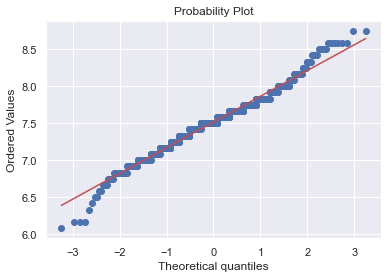

In [187]:
stats.probplot(data.Balance,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 6.,  6.,  6., ..., 10., 10., 10.])),
 (0.25296891042350417, 9.871037735849058, 0.5676658709254959))

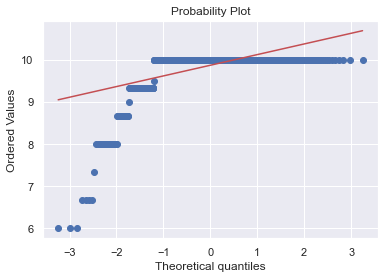

In [188]:
stats.probplot(data.Uniformity,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 0.  ,  1.33,  2.67, ..., 10.  , 10.  , 10.  ])),
 (0.32739933122239, 9.854691252144082, 0.4489173077786231))

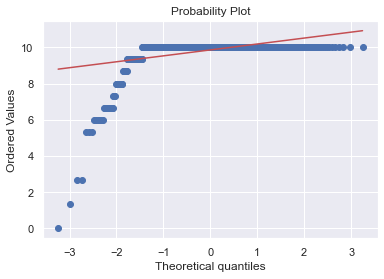

In [189]:
stats.probplot(data['Clean.Cup'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 1.33,  6.  ,  6.  , ..., 10.  , 10.  , 10.  ])),
 (0.25107526462030916, 9.883559176672383, 0.4824926847613719))

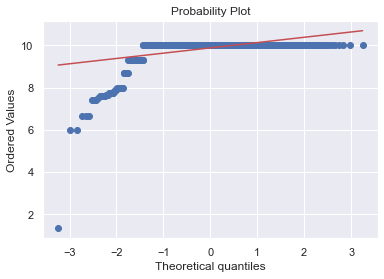

In [190]:
stats.probplot(data['Sweetness'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 5.17,  5.25,  5.42, ..., 10.  , 10.  , 10.  ])),
 (0.4173501329191202, 7.504768439108061, 0.968694532450237))

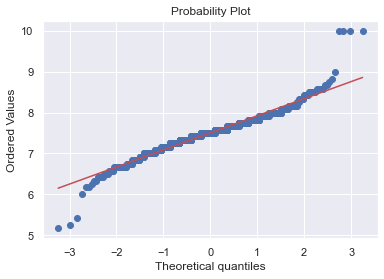

In [191]:
stats.probplot(data['Cupper.Points'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([59.83, 63.08, 67.92, ..., 89.  , 89.92, 90.58])),
 (2.4654057916342094, 82.20139794168097, 0.9296976131489347))

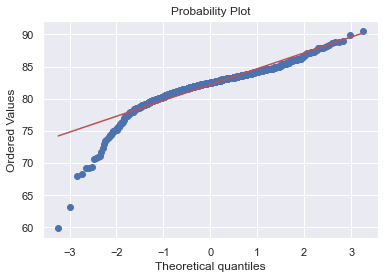

In [192]:
stats.probplot(data['Total.Cup.Points'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([0.  , 0.  , 0.  , ..., 0.2 , 0.2 , 0.28])),
 (0.03914159741169889, 0.09205831903945112, 0.8512557432738067))

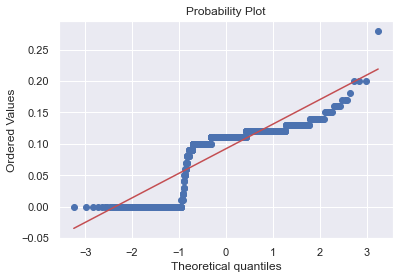

In [193]:
stats.probplot(data['Moisture'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 0,  0,  0, ..., 23, 31, 31], dtype=int64)),
 (0.7889297659837192, 0.36449399656946846, 0.4341239943714202))

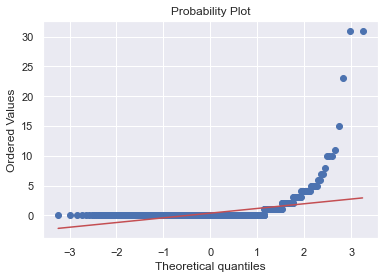

In [194]:
stats.probplot(data['Category.One.Defects'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 0.,  0.,  0., ...,  8.,  9., 11.])),
 (0.3388889070400565, 0.15008576329331055, 0.44441022015344456))

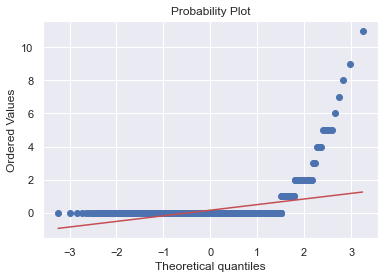

In [195]:
stats.probplot(data['Quakers'],dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([ 0,  0,  0, ..., 45, 47, 55], dtype=int64)),
 (4.317074166608416, 3.592624356775301, 0.7913389352604377))

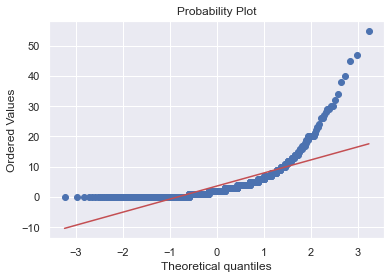

In [196]:
stats.probplot(data['Category.Two.Defects'],dist=stats.norm,plot=plt)

C:\Users\ecopl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Category.Two.Defects', ylabel='Density'>

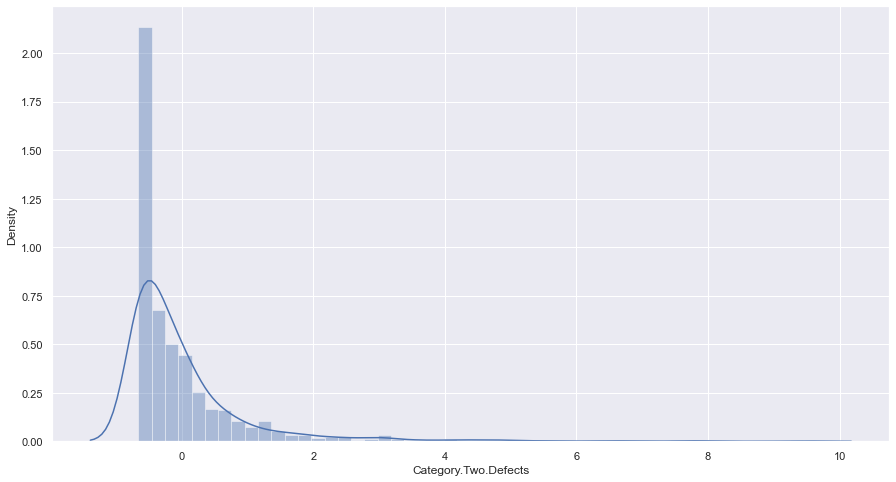

In [290]:
sns.distplot(data['Category.Two.Defects'])

In [197]:
#정규성 만족하지 못하는 변수들도 커피의 퀄리티라는 최종 목표에 영향이 큰 변수들이라 생각하여 정규성 띄게 변형시킬 방법 논의
#TCP, CP는 그자체로 체점자의 주관적인 종합접수란 성격을 띄므로 제외하고 진행하기로 결정

In [198]:
#kpca

In [199]:
#모든 비정규형 변수 한번에 적용

In [200]:
data_2=data.copy()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()   
scaler = MinMaxScaler(feature_range=(0.01,1))   
scaled_values = scaler.fit_transform(data_2[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects']])

data_2[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects']]=scaled_values

In [201]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf',gamma=30 )
skernpca1 = scikit_kpca.fit_transform(data_2[['Uniformity', 'Clean.Cup', 'Sweetness','Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects']])

In [202]:
kpcaDf = pd.DataFrame(data=skernpca1, columns = ['pc1','pc2'])

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-0.4311833 , -0.4311833 , -0.4311833 , ...,  0.94194656,
          0.94194656,  0.94194656])),
 (0.42707203610459715, 5.184821899459921e-16, 0.8997143708939035))

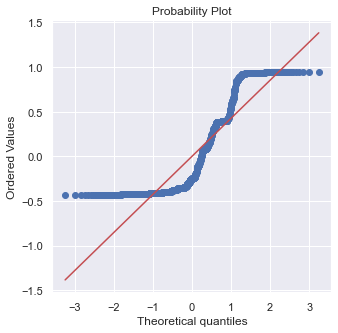

In [203]:
import scipy.stats as stats
plt.figure(figsize=(5,5))
stats.probplot(kpcaDf.pc1,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-0.33194064, -0.33194064, -0.33194064, ...,  0.68947533,
          0.69237285,  0.69719591])),
 (0.25159969816972766, 3.903962370943633e-16, 0.9621310244315574))

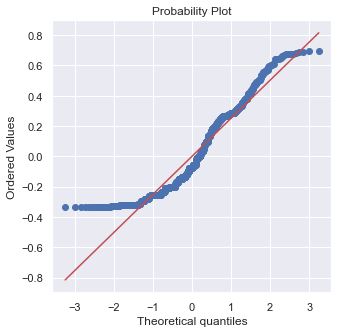

In [204]:
import scipy.stats as stats
plt.figure(figsize=(5,5))
stats.probplot(kpcaDf.pc2,dist=stats.norm,plot=plt)

In [205]:
#같은 성격 또는 비슷한 양상 보이는 변수끼리 진행

In [206]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=1, kernel='poly',gamma=0.001 )
skernpca1 = scikit_kpca.fit_transform(data_2[['Uniformity', 'Clean.Cup', 'Sweetness']])
scikit_kpca = KernelPCA(n_components=1, kernel='cosine',gamma=10)
skernpca2 = scikit_kpca.fit_transform(data_2[['Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects']])
kpcaDf1 = pd.DataFrame(data=skernpca1, columns = ['pc1'])
kpcaDf2 = pd.DataFrame(data=skernpca2, columns = ['pc1'])

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-0.0020299 , -0.0020299 , -0.0020299 , ...,  0.05540424,
          0.05540424,  0.06026156])),
 (0.0038614012718059957, 3.468484173280894e-14, 0.5977787198242678))

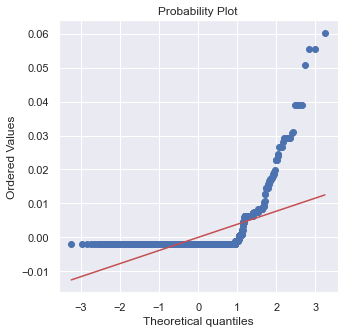

In [207]:
import scipy.stats as stats
plt.figure(figsize=(5,5))
stats.probplot(kpcaDf1.pc1,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-0.31609381, -0.31158945, -0.30765343, ...,  1.01751288,
          1.01908318,  1.03021312])),
 (0.3394436027302063, -1.476086044043042e-17, 0.8528675533096891))

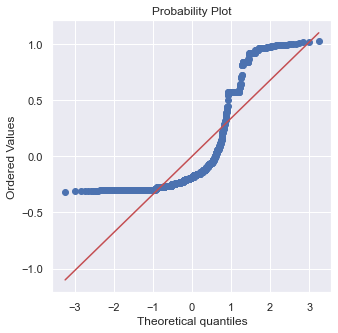

In [208]:
import scipy.stats as stats
plt.figure(figsize=(5,5))
stats.probplot(kpcaDf2.pc1,dist=stats.norm,plot=plt)

In [209]:
#해당 변수들의 선형결합으로 시도

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c3861550>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c3861c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c38611f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c386c340>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c386c6a0>],
 'means': []}

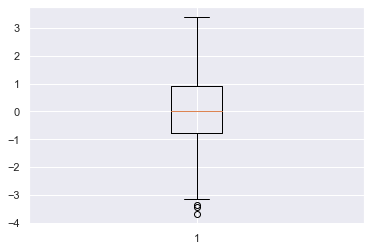

In [210]:
y_1=np.log(data['Uniformity']+data['Clean.Cup']+data['Sweetness'])-np.log(data['Moisture']*100+1)-np.log(data['Quakers']+data['Category.One.Defects']+data['Category.Two.Defects']+1)
plt.boxplot(y_1)

(array([  3.,   1.,  11.,  19.,  22.,  48.,  73.,  95., 132., 154.,  89.,
         86., 104., 137.,  25.,  22.,  40.,   6.,  27.,  72.]),
 array([-3.70052018, -3.3454343 , -2.99034843, -2.63526255, -2.28017667,
        -1.92509079, -1.57000491, -1.21491903, -0.85983316, -0.50474728,
        -0.1496614 ,  0.20542448,  0.56051036,  0.91559623,  1.27068211,
         1.62576799,  1.98085387,  2.33593975,  2.69102563,  3.0461115 ,
         3.40119738]),
 <BarContainer object of 20 artists>)

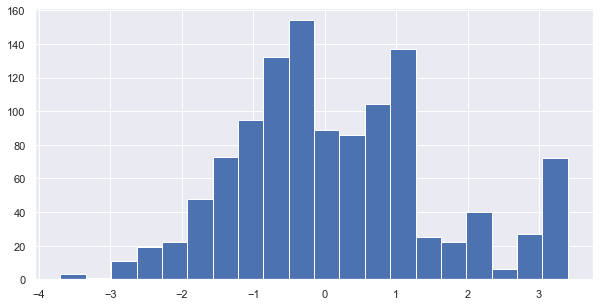

In [211]:
plt.figure(figsize=(10,5))
plt.hist(y_1,bins=20)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-3.70052018, -3.43691546, -3.35125271, ...,  3.40119738,
          3.40119738,  3.40119738])),
 (1.4029094773990822, 0.16813793702337623, 0.9833655197494002))

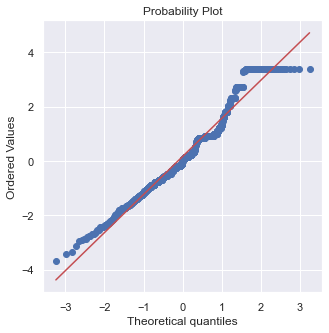

In [212]:
y_1=np.squeeze(y_1)
plt.figure(figsize=(5,5))
stats.probplot(y_1,dist=stats.norm,plot=plt)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c39a4970>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c39b1070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c39a4610>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c39b1730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c39b1a90>],
 'means': []}

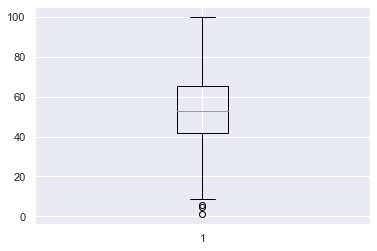

In [213]:
scaler = MinMaxScaler(feature_range=(1,100))
y_1_mm=scaler.fit_transform(np.array(y_1).reshape(-1,1))

plt.boxplot(y_1_mm)

(array([  3.,   1.,  11.,  19.,  22.,  48.,  73.,  95., 132., 154.,  89.,
         86., 104., 137.,  25.,  22.,  40.,   6.,  27.,  72.]),
 array([  1.  ,   5.95,  10.9 ,  15.85,  20.8 ,  25.75,  30.7 ,  35.65,
         40.6 ,  45.55,  50.5 ,  55.45,  60.4 ,  65.35,  70.3 ,  75.25,
         80.2 ,  85.15,  90.1 ,  95.05, 100.  ]),
 <BarContainer object of 20 artists>)

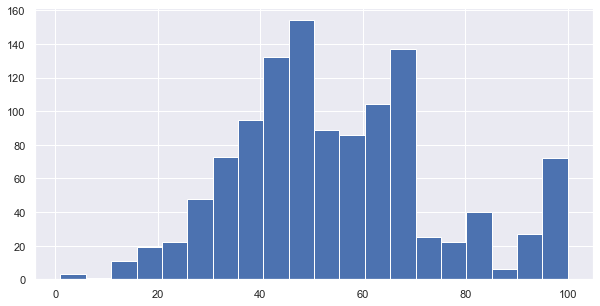

In [214]:
plt.figure(figsize=(10,5))
plt.hist(y_1_mm,bins=20)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([  1.        ,   4.67472613,   5.8688898 , ..., 100.        ,
         100.        , 100.        ])),
 (19.55696449692452, 54.93021481865678, 0.9833655197494001))

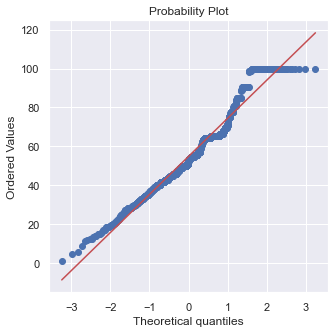

In [215]:
y_1_mm=np.squeeze(y_1_mm)
plt.figure(figsize=(5,5))
stats.probplot(y_1_mm,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([0.        , 0.66975617, 0.76855595, ..., 2.        , 2.        ,
         2.        ])),
 (0.1716970611602656, 1.7079072384231622, 0.957156513383604))

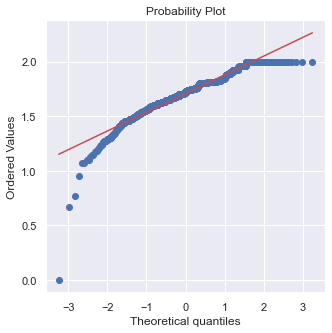

In [216]:
plt.figure(figsize=(5,5))
stats.probplot(np.log10(y_1_mm),dist=stats.norm,plot=plt)

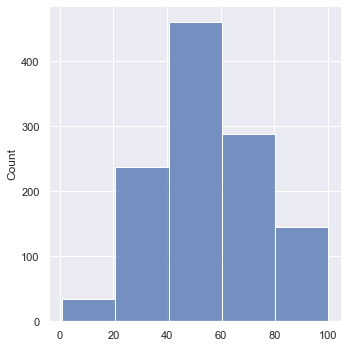

In [307]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.displot(y_1_mm,bins=5)
plt.show()

In [217]:
data['Stability']=y_1_mm
data['Stability_log']=np.log10(y_1_mm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
scaled_values = scaler.fit_transform(data[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects','Stability','Stability_log']])

data[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean.Cup', 'Sweetness', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects','Stability','Stability_log']]=scaled_values

In [218]:
np.round(data.describe(),2)

Aroma   Flavor  Aftertaste  Acidity     Body  Balance  Uniformity  \
count  1166.00  1166.00     1166.00  1166.00  1166.00  1166.00     1166.00   
mean      0.00     0.00        0.00     0.00     0.00    -0.00        0.00   
std       1.00     1.00        1.00     1.00     1.00     1.00        1.00   
min      -4.11    -4.08       -3.61    -7.14    -4.18    -4.10       -8.71   
25%      -0.52    -0.60       -0.45    -0.65    -0.67    -0.53        0.29   
50%       0.00     0.15        0.05    -0.12    -0.07    -0.05        0.29   
75%       0.56     0.66        0.51     0.66     0.53     0.66        0.29   
max       3.85     3.90        3.70     3.78     3.73     3.52        0.29   

       Clean.Cup  Sweetness  Cupper.Points  Total.Cup.Points  Moisture  \
count    1166.00    1166.00        1166.00           1166.00   1166.00   
mean        0.00       0.00           7.50             82.20     -0.00   
std         1.00       1.00           0.43              2.65      1.00   
min       -13.55     -16.48           5.17             59.83     -2.01   
25%         0.20       0.22           7.25             81.17      0.17   
50%         0.20       0.22           7.50             82.50      0.39   
75%         0.20       0.22           7.75             83.67      0.61   
max         0.20       0.22          10.00             90.58      4.10   

       Category.One.Defects  Quakers  Category.Two.Defects  \
count                1166.0  1166.00               1166.00   
mean                   -0.0    -0.00                  0.00   
std                     1.0     1.00                  1.00   
min                    -0.2    -0.20                 -0.66   
25%                    -0.2    -0.20                 -0.66   
50%                    -0.2    -0.20                 -0.29   
75%                    -0.2    -0.20                  0.07   
max                    16.9    14.26                  9.45   

       altitude_mean_meters  Stability  Stability_log  
count               1166.00    1166.00        1166.00  
mean                1234.11      -0.00          -0.00  
std                  534.76       1.00           1.00  
min                    1.00      -2.72          -9.54  
25%                  950.00      -0.66          -0.48  
50%                 1296.00      -0.11           0.08  
75%                 1600.00       0.53           0.60  
max                 3850.00       2.27           1.63

In [219]:
data_Y=pd.DataFrame(data[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Stability']].values, columns=[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Stability'])

In [220]:
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.datasets import load_diabetes

pca1 = PCA()
pca1.fit(data_Y.values)
exp_var_cumul = np.cumsum(pca1.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [221]:
data_Y=pd.DataFrame(data[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Stability_log']].values, columns=[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Stability_log'])

In [222]:
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.datasets import load_diabetes

pca2 = PCA()
pca2.fit(data_Y.values)
exp_var_cumul = np.cumsum(pca2.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [223]:
data_Y=pd.DataFrame(data[[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Stability']].values, columns=[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Stability'])

In [224]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2) 
printcipalComponents = pca1.fit_transform(data_Y.values)
principalDf1 = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])
principalDf1

pc1       pc2
0     8.550503 -0.914253
1     7.848780 -1.277171
2     6.578018 -1.254865
3     6.437577 -1.306249
4     6.787117 -1.038690
...        ...       ...
1161  0.302226 -0.119031
1162  0.481458  1.678001
1163  0.405079  2.103516
1164  0.352207  2.109561
1165 -1.315385  0.969805

[1166 rows x 2 columns]

In [225]:
np.round(principalDf1.corr(),5)

pc1  pc2
pc1  1.0  0.0
pc2  0.0  1.0

In [226]:
#오리지널 변수-PCcomps loading matrix
pca1_loading=pd.DataFrame(np.round(pca1.components_.T,3),columns=['pc1','pc2'],index=[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
        'Stability'])
pca1_loading

pc1    pc2
Aroma       0.388 -0.093
Flavor      0.429 -0.100
Aftertaste  0.426 -0.032
Acidity     0.388 -0.120
Body        0.387 -0.043
Balance     0.403  0.027
Stability   0.148  0.982

<AxesSubplot:>

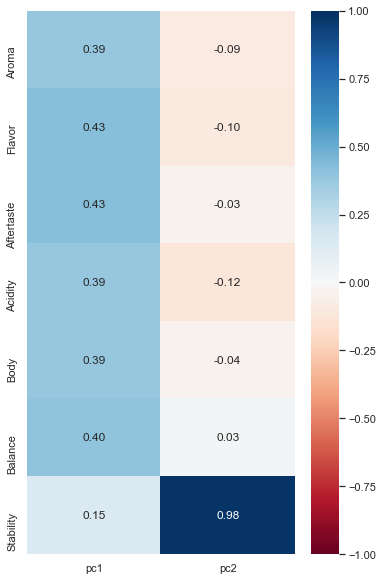

In [227]:
plt.figure(figsize=(6,10))
sns.heatmap(pca1_loading, cmap="RdBu",vmin=-1,vmax=1,center=0 ,annot=True, fmt='.2f')

In [228]:
from sklearn.decomposition import PCA
pca1_1 = PCA(n_components=3) 
printcipalComponents = pca1_1.fit_transform(data_Y.values)
principalDf1_1 = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2','pc3'])
principalDf1_1

pc1       pc2       pc3
0     8.550503 -0.914253 -0.414335
1     7.848780 -1.277171 -0.545541
2     6.578018 -1.254865  0.768000
3     6.437577 -1.306249  0.560726
4     6.787117 -1.038690 -0.502599
...        ...       ...       ...
1161  0.302226 -0.119031  0.146876
1162  0.481458  1.678001 -0.226042
1163  0.405079  2.103516 -0.435389
1164  0.352207  2.109561 -1.123999
1165 -1.315385  0.969805  0.244916

[1166 rows x 3 columns]

In [229]:
print(pca1_1.explained_variance_)
print(pca1_1.explained_variance_ratio_)

[4.62267072 0.92876849 0.42202177]
[0.65981517 0.13256742 0.06023712]


In [230]:
#오리지널 변수-PCcomps loading matrix
pca1_1_loading=pd.DataFrame(np.round(pca1_1.components_.T,3),columns=['pc1','pc2','pc3'],index=[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
        'Stability'])
pca1_1_loading

pc1    pc2    pc3
Aroma       0.388 -0.093 -0.609
Flavor      0.429 -0.100 -0.209
Aftertaste  0.426 -0.032 -0.059
Acidity     0.388 -0.120 -0.096
Body        0.387 -0.043  0.664
Balance     0.403  0.027  0.354
Stability   0.148  0.982 -0.073

<AxesSubplot:>

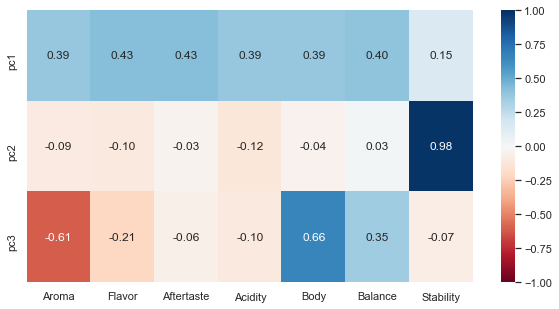

In [231]:
plt.figure(figsize=(10,5))
sns.heatmap(pca1_1_loading.T, cmap="RdBu",vmin=-1,vmax=1,center=0 ,annot=True, fmt='.2f')

In [232]:
from sklearn.decomposition import PCA
pca1_2 = PCA(n_components=4) 
printcipalComponents = pca1_2.fit_transform(data_Y.values)
principalDf1_2 = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2','pc3','pc4'])
principalDf1_2

pc1       pc2       pc3       pc4
0     8.550503 -0.914253 -0.414335 -0.421734
1     7.848780 -1.277171 -0.545541  0.108141
2     6.578018 -1.254865  0.768000 -0.360480
3     6.437577 -1.306249  0.560726 -0.470297
4     6.787117 -1.038690 -0.502599 -0.073532
...        ...       ...       ...       ...
1161  0.302226 -0.119031  0.146876  0.235188
1162  0.481458  1.678001 -0.226042  0.606182
1163  0.405079  2.103516 -0.435389 -0.970421
1164  0.352207  2.109561 -1.123999  0.543844
1165 -1.315385  0.969805  0.244916 -0.379852

[1166 rows x 4 columns]

In [233]:
#오리지널 변수-PCcomps loading matrix
pca1_2_loading=pd.DataFrame(np.round(pca1_2.components_.T,3),columns=['pc1','pc2','pc3','pc4'],index=[ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
        'Stability'])
pca1_2_loading

pc1    pc2    pc3    pc4
Aroma       0.388 -0.093 -0.609  0.426
Flavor      0.429 -0.100 -0.209 -0.006
Aftertaste  0.426 -0.032 -0.059  0.066
Acidity     0.388 -0.120 -0.096 -0.855
Body        0.387 -0.043  0.664  0.132
Balance     0.403  0.027  0.354  0.247
Stability   0.148  0.982 -0.073 -0.063

<AxesSubplot:>

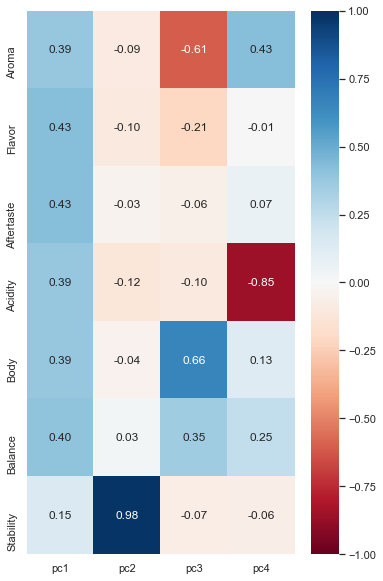

In [234]:
plt.figure(figsize=(6,10))
sns.heatmap(pca1_2_loading, cmap="RdBu",vmin=-1,vmax=1,center=0 ,annot=True, fmt='.2f')

In [235]:
pca1_2.explained_variance_ratio_

array([0.65981517, 0.13256742, 0.06023712, 0.05196621])

In [236]:
data['PC1']=principalDf1_1.pc1
data['PC2']=principalDf1_1.pc2
data['PC3']=principalDf1_1.pc3


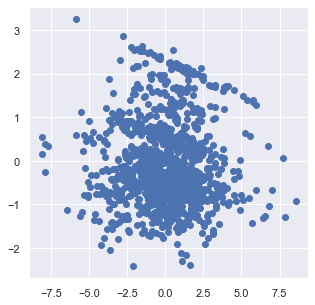

In [237]:
plt.figure(figsize=(5,5))
plt.scatter(data.PC1,data.PC2)

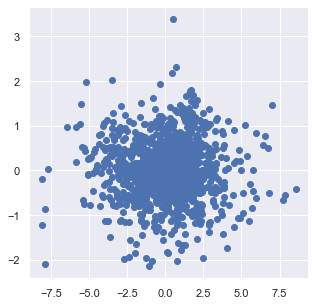

In [238]:
plt.figure(figsize=(5,5))
plt.scatter(data.PC1,data.PC3)

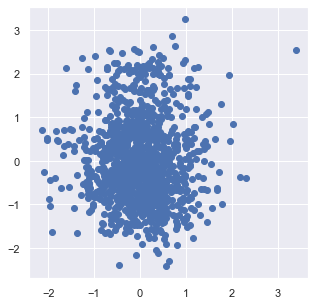

In [239]:
plt.figure(figsize=(5,5))
plt.scatter(data.PC3,data.PC2)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-8.09036139, -8.05113661, -7.88234237, ...,  7.719471  ,
          7.84878034,  8.55050348])),
 (2.139874112583464, 5.216027465307964e-16, 0.9932808986737517))

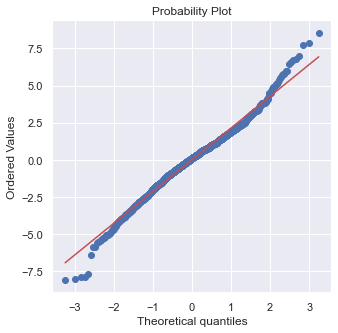

In [240]:
plt.figure(figsize=(5,5))
stats.probplot(data.PC1,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-2.41009104, -2.37728135, -2.30391981, ...,  2.64091346,
          2.85496978,  3.25795606])),
 (0.9527696773313881, 2.322413629778087e-16, 0.9866532004400866))

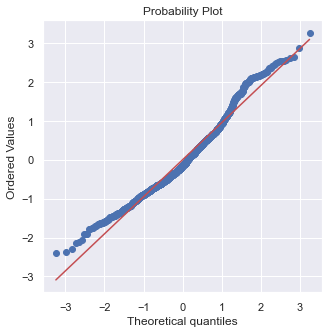

In [241]:
plt.figure(figsize=(5,5))
stats.probplot(data.PC2,dist=stats.norm,plot=plt)

((array([-3.24160692, -2.97972935, -2.83380349, ...,  2.83380349,
          2.97972935,  3.24160692]),
  array([-2.13805053, -2.09977011, -2.03662716, ...,  2.1755975 ,
          2.30690163,  3.38835569])),
 (0.647462228923298, 1.0907068140256343e-16, 0.9946661694090684))

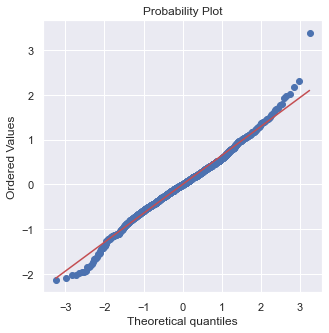

In [242]:
plt.figure(figsize=(5,5))
stats.probplot(data.PC3,dist=stats.norm,plot=plt)

In [243]:
data.rename(columns={'Processing.Method' : 'Processing_Method'},inplace=True)
data.rename(columns={'Country.of.Origin' : 'Country_of_Origin'},inplace=True)
data.rename(columns={'Cupper.Points' : 'Cupper_points'},inplace=True)

In [244]:
from statsmodels.multivariate.manova import MANOVA
print(MANOVA.from_formula('PC1+PC2+PC3~ Processing_Method',data=data).mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.9708 3.0000 1159.0000 11.6150 0.0000
          Pillai's trace 0.0292 3.0000 1159.0000 11.6150 0.0000
  Hotelling-Lawley trace 0.0301 3.0000 1159.0000 11.6150 0.0000
     Roy's greatest root 0.0301 3.0000 1159.0000 11.6150 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
   Processing_Method    Value   Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9528 12.0000 3066.7173  4.7125 0.0000
         Pillai's trace 0.0475 12.0000 3483.0000  4.6684 0.

In [245]:
#data.to_csv("coffee_bean_PCA_completed_220526.csv",index=False)

In [246]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

In [247]:
#data=pd.read_csv("coffee_bean_PCA_completed_220526.csv")
#data

In [248]:
#PC들의 loading 값들을 보고 각 PC들에 명칭 부여 PC1:기본풍미 PC2: 원두완성도 PC3:대중성
data.rename(columns={'PC1':'base_zest', 'PC2':'beans_perfection','PC3':'popularity'},inplace=True)

In [249]:
#만들어진 3개의 변수를 직관적 점수화 하기위해 0~100으로 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,100))
scaled_PCs=scaler.fit_transform(data[['base_zest','beans_perfection','popularity']])
data[['base_zest','beans_perfection','popularity']]=scaled_PCs

In [250]:
weight=pca1_1.explained_variance_ratio_/ np.sum(pca1_1.explained_variance_ratio_)
weight

array([0.77386807, 0.15548247, 0.07064946])

In [251]:
data['new_score']=np.sum((weight*data[['base_zest','beans_perfection','popularity']]) ,axis=1)

(array([  4.,   1.,   1.,  10.,  18.,  34.,  43.,  82., 112., 179., 198.,
        167., 146.,  86.,  44.,  16.,   7.,   9.,   7.,   2.]),
 array([ 6.9331625 , 10.77118902, 14.60921553, 18.44724204, 22.28526856,
        26.12329507, 29.96132158, 33.79934809, 37.63737461, 41.47540112,
        45.31342763, 49.15145415, 52.98948066, 56.82750717, 60.66553369,
        64.5035602 , 68.34158671, 72.17961322, 76.01763974, 79.85566625,
        83.69369276]),
 <BarContainer object of 20 artists>)

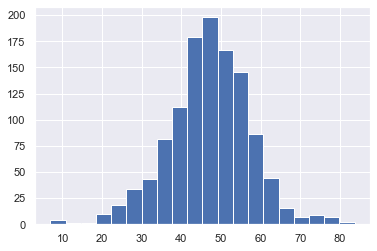

In [252]:
plt.hist(data.new_score,bins=20)

In [253]:
#PCs로 cupper.points를 예측
from statsmodels.formula.api import ols
model1 = ols('Cupper_points ~ base_zest *  beans_perfection * popularity',data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cupper_points   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          5.10e-210
Time:                        15:45:14   Log-Likelihood:                -171.18
No. Observations:                1166   AIC:                             358.4
Df Residuals:                    1158   BIC:                             398.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 5.6901      0.293     19.424      0.000       5.115       6.265
base_zest                                 0.0356      0.006      6.308      0.000       0.025       0.047
beans_perfection                          0.0185      0.007      2.790      0.005       0.005       0.031
base_zest:beans_perfection               -0.0003      0.000     -2.452      0.014      -0.001   -6.31e-05
popularity                                0.0091      0.007      1.337      0.181      -0.004       0.022
base_zest:popularity                     -0.0002      0.000     -1.153      0.249      -0.000       0.000
beans_perfection:popularity              -0.0003      0.000     -2.130      0.033      -0.001   -2.56e-05
base_zest:beans_perfection:popularity  5.233e-06   3.01e-06      1.741      0.082   -6.63e-07    1.11e-05
==============================================================================
Omnibus:                      717.542   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108588.710
Skew:                           1.817   Prob(JB):                         0.00
Kurtosis:                      50.137   Cond. No.                     3.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
data.Cupper_points

0       8.75
1       8.58
2       8.67
3       8.58
4       8.33
        ... 
1161    7.50
1162    7.50
1163    7.58
1164    7.33
1165    7.17
Name: Cupper_points, Length: 1166, dtype: float64

In [255]:
#스케일링 후 모델 적합 시도
scaler=StandardScaler()
scaled_v=scaler.fit_transform(data[[ 'base_zest' , 'beans_perfection' , 'popularity']])
lr_df=pd.DataFrame(scaled_v,columns=[ 'base_zest' , 'beans_perfection' , 'popularity'])
lr_df['Cupper_points']=data.Cupper_points
model2 = ols('Cupper_points ~ base_zest * beans_perfection *  popularity',data=lr_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cupper_points   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sun, 05 Jun 2022   Prob (F-statistic):          5.10e-210
Time:                        15:45:14   Log-Likelihood:                -171.18
No. Observations:                1166   AIC:                             358.4
Df Residuals:                    1158   BIC:                             398.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 7.5051      0.008    911.163      0.000       7.489       7.521
base_zest                                 0.3217      0.008     38.837      0.000       0.305       0.338
beans_perfection                          0.0071      0.008      0.851      0.395      -0.009       0.023
base_zest:beans_perfection               -0.0248      0.008     -2.970      0.003      -0.041      -0.008
popularity                               -0.0154      0.008     -1.860      0.063      -0.032       0.001
base_zest:popularity                      0.0105      0.007      1.435      0.152      -0.004       0.025
beans_perfection:popularity              -0.0140      0.008     -1.753      0.080      -0.030       0.002
base_zest:beans_perfection:popularity     0.0135      0.008      1.741      0.082      -0.002       0.029
==============================================================================
Omnibus:                      717.542   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108588.710
Skew:                           1.817   Prob(JB):                         0.00
Kurtosis:                      50.137   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
data.sort_values(by='new_score',ascending=False).iloc[range(0,50),:]

Species       Country_of_Origin            Harvest.Year  \
0     Arabica                Ethiopia                    2014   
6     Arabica                Ethiopia                  10-Mar   
5     Arabica                Ethiopia                  10-Mar   
12    Arabica                Ethiopia                  10-Mar   
1     Arabica                Ethiopia                    2014   
13    Arabica           United States                    2014   
10    Arabica           United States                    2014   
9     Arabica           United States                    2014   
18    Arabica           United States                    2014   
2     Arabica                Ethiopia                    2014   
4     Arabica                  Brazil                    2013   
14    Arabica               Indonesia              May-August   
11    Arabica  United States (Hawaii)  Sept 2009 - April 2010   
15    Arabica                Ethiopia               2009/2010   
3     Arabica                Ethiopia                    2014   
21    Arabica           United States                    2014   
27    Arabica                  Taiwan                    2015   
34    Arabica           United States                    2014   
68    Arabica              Costa Rica                    2014   
17    Arabica                Ethiopia                    2014   
41    Arabica                  Uganda                    2014   
221   Arabica                Thailand                    2012   
8     Arabica                Ethiopia                    2014   
30    Arabica              Costa Rica               2015/2016   
7     Arabica                Ethiopia                    2014   
24    Arabica                Ethiopia               2009/2010   
22    Arabica                Ethiopia                    2013   
48    Arabica                Colombia                    2013   
54    Arabica        Papua New Guinea                    2012   
16    Arabica                   China                    2015   
46    Arabica  United States (Hawaii)               Fall 2009   
1144  Robusta                   India                    2015   
79    Arabica                Colombia                    2015   
19    Arabica              Costa Rica                    2014   
20    Arabica                  Mexico                    2012   
45    Arabica                Ethiopia               2009/2010   
23    Arabica                  Brazil                    2011   
1147  Robusta                   India                    2012   
65    Arabica             El Salvador             2009 / 2010   
1143  Robusta                   India                    2017   
621   Arabica                  Brazil               2015/2016   
37    Arabica                  Brazil                    2010   
415   Arabica                Ethiopia      August to December   
129   Arabica                Colombia                    2013   
44    Arabica                  Uganda                    2012   
70    Arabica                   Kenya                    2012   
36    Arabica                  Brazil                    2010   
1148  Robusta                   India                    2014   
25    Arabica                  Uganda                    2013   
99    Arabica                  Taiwan                    2016   

              Processing_Method     Aroma    Flavor  Aftertaste   Acidity  \
0                  Washed / Wet  3.590729  3.902339    3.698742  3.780848   
6                 Natural / Dry  3.590729  3.422320    3.435802  2.751160   
5                 Natural / Dry  2.208200  2.402280    3.202078  2.751160   
12                Natural / Dry  2.208200  2.402280    3.202078  2.220715   
1                  Washed / Wet  3.854068  3.422320    3.202078  3.250403   
13                 Washed / Wet  1.385267  2.912300    3.435802  1.971093   
10                 Washed / Wet  1.648606  3.422320    2.705415  2.751160   
9                  Washed / Wet  2.208200  2.672291    2.237967  2.470336 

<ipython-input-257-192608a02c79>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, ''),
 Text(20.0, 0, '')]

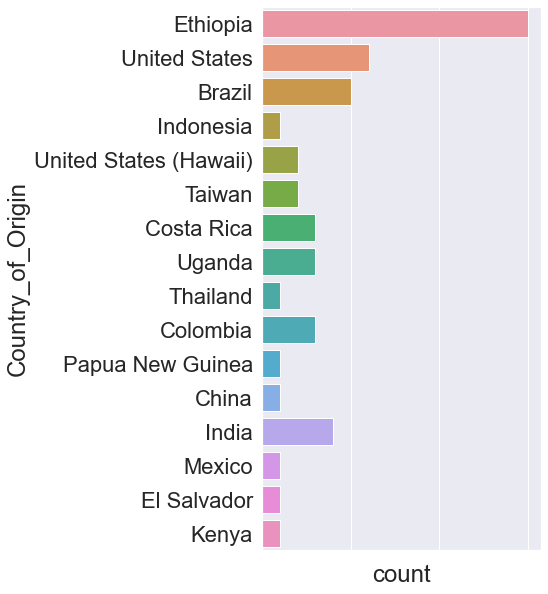

In [257]:
plt.figure(figsize=(5,10))
sns.set(font_scale=2)
ax=sns.countplot(y=data.sort_values(by='new_score',ascending=False).iloc[range(0,50),:]['Country_of_Origin'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)

In [258]:
data_1=data.copy()

In [259]:
#altitude 변형 
data_1['alt_level']=np.where(data_1.altitude_mean_meters<=850,0,
                        np.where(data_1.altitude_mean_meters<=1700,1,
                                np.where(data_1.altitude_mean_meters<=2550,2,
                                        np.where(data_1.altitude_mean_meters<=3400,3,
                                                np.where(data_1.altitude_mean_meters<4250,4,-1)))))

In [260]:
#커피의 생산 환경에 큰 영향을 준다고 알려진 온도를 국가별로 수치화할 계획,
#나라별 평균기온 & 고도를 활용하여 변수 생성
#->떄마다 기온이 다를텐데 한가지 수치로 가능한가?-> 일반적인 재배 기간이 3~4년이기 때문에 시기에 따른 차이는 무시해도 된다고 판단.
#즉 평균 기온 이용 가능.
#variable생산기온 = 평균기온 - 고도에 따른 온도의 패널티

#https://ko.wikipedia.org/wiki/%EC%97%B0%EA%B0%84_%ED%8F%89%EA%B7%A0_%EA%B8%B0%EC%98%A8%EC%97%90_%EB%94%B0%EB%A5%B8_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D

In [261]:
data['Country_of_Origin'].unique()

array(['Ethiopia', 'Brazil', 'United States', 'United States (Hawaii)',
       'Indonesia', 'China', 'Costa Rica', 'Mexico', 'Uganda', 'Honduras',
       'Taiwan', 'Tanzania, United Republic Of', 'Kenya', 'Thailand',
       'Colombia', 'Panama', 'Guatemala', 'Papua New Guinea',
       'El Salvador', 'Nicaragua', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Cote d?Ivoire', 'Peru', 'India'], dtype=object)

In [262]:
data_1['ave_temp']=np.where(data['Country_of_Origin']=='Ethiopia', 22.20,
        np.where(data['Country_of_Origin']=='Brazil', 24.95,
                np.where(data['Country_of_Origin']=='United States','8.55',
                        np.where(data['Country_of_Origin']=='United States (Hawaii)',29,
                                np.where(data['Country_of_Origin']=='Indonesia',25.85,
                                        np.where(data['Country_of_Origin']=='China',10.25,
                                                np.where(data['Country_of_Origin']=='Costa Rica',24.8,
                                                        np.where(data['Country_of_Origin']=='Mexico',21,
                                                                np.where(data['Country_of_Origin']=='Uganda',22.8,
                                                                        np.where(data['Country_of_Origin']=='Honduras',23.5,
                                                                                np.where(data['Country_of_Origin']=='Taiwan',26.3,
                                                                                        np.where(data['Country_of_Origin']=='Tanzania, United Republic Of',22.35,
                                                                                                np.where(data['Country_of_Origin']=='Kenya',24.75,
                                                                                                        np.where(data['Country_of_Origin']=='Thailand',26.3,
                                                                                                                np.where(data['Country_of_Origin']=='Colombia',24.5,
                                                                                                                        np.where(data['Country_of_Origin']=='Panama',25.4,
                                                                                                                                np.where(data['Country_of_Origin']=='Guatemala',23.45,
                                                                                                                                        np.where(data['Country_of_Origin']=='Papua New Guinea',25.25,
                                                                                                                                                np.where(data['Country_of_Origin']=='El Salvador',24.45,
                                                                                                                                                np.where(data['Country_of_Origin']=='Nicaragua',24.9,
                                                                                                                                                np.where(data['Country_of_Origin']=='Ecuador',21.85,
                                                                                                                                                np.where(data['Country_of_Origin']=='United States (Puerto Rico)',27.0,
                                                                                                                                                np.where(data['Country_of_Origin']=='Haiti',24.9,
                                                                                                                                                np.where(data['Country_of_Origin']=='Burundi',19.8,
                                                                                                                                                np.where(data['Country_of_Origin']=='Vietnam',24.45,
                                                                                                                                                np.where(data['Country_of_Origin']=='Philippines',25.85,
                                                                                                                                                np.where(data['Country_of_Origin']=='Rwanda',17.85,
                                                                                                                                                np.where(data['Country_of_Origin']=='Malawi',21.9,
                                                                                                                                                np.where(data['Country_of_Origin']=='Laos',22.8,
                                                                                                                                                np.where(data['Country_of_Origin']=='Zambia',21.4,
                                                                                                                                                np.where(data['Country_of_Origin']=='Myanmar',13.05,
                                                                                                                                                np.where(data['Country_of_Origin']=='Cote d?Ivoire',26.35,
                                                                                                                                                np.where(data['Country_of_Origin']=='Peru',19.6,
                                                                                                                                                np.where(data['Country_of_Origin']=='India',23.65,0))))))))))))))))))))))))))))))))))

In [263]:
data_1.ave_temp.unique()

array(['22.2', '24.95', '8.55', '29.0', '25.85', '10.25', '24.8', '21.0',
       '22.8', '23.5', '26.3', '22.35', '24.75', '24.5', '25.4', '23.45',
       '25.25', '24.45', '24.9', '21.85', '27.0', '19.8', '17.85', '21.9',
       '21.4', '13.05', '26.35', '19.6', '23.65'], dtype=object)

In [264]:
data_1

Species Country_of_Origin Harvest.Year Processing_Method     Aroma  \
0     Arabica          Ethiopia         2014      Washed / Wet  3.590729   
1     Arabica          Ethiopia         2014      Washed / Wet  3.854068   
2     Arabica          Ethiopia         2014     Natural / Dry  1.944862   
3     Arabica          Ethiopia         2014      Washed / Wet  2.208200   
4     Arabica            Brazil         2013     Natural / Dry  3.294473   
...       ...               ...          ...               ...       ...   
1161  Robusta            Uganda         2013      Washed / Wet  0.562333   
1162  Robusta             India         2014     Natural / Dry  0.298995   
1163  Robusta             India         2013     Natural / Dry  0.002738   
1164  Robusta     United States         2012     Natural / Dry  1.121928   
1165  Robusta     United States         2014     Natural / Dry -0.820195   

        Flavor  Aftertaste   Acidity      Body   Balance  ...  \
0     3.902339    3.698742  3.780848  3.449177  2.577149  ...   
1     3.422320    3.202078  3.250403  3.167771  2.577149  ...   
2     3.152310    2.968354  2.751160  3.449177  2.091945  ...   
3     2.912300    2.471691  3.000782  3.167771  2.320276  ...   
4     2.672291    2.968354  3.000782  2.569785  2.320276  ...   
...        ...         ...       ...       ...       ...  ...   
1161 -0.327826   -0.216135  0.130136  0.529596  0.179669  ...   
1162  0.422203    0.280529 -0.649931  0.213015 -0.048662  ...   
1163 -0.327826    0.046805  0.910203 -0.349796 -0.048662  ...   
1164 -0.087816    0.046805 -0.369107 -0.349796 -0.276994  ...   
1165 -0.597836   -0.683582 -0.369107 -0.068390 -0.990529  ...   

      Category.Two.Defects  altitude_mean_meters  Stability  Stability_log  \
0                -0.660147                2075.0   0.469450       0.558403   
1                -0.476397                2075.0  -0.017592       0.162818   
2                -0.292646                2000.0  -0.246252      -0.047774   
3                -0.292646                2075.0  -0.302494      -0.102499   
4                -0.476397                1175.0   0.038650       0.211932   
...                    ...                   ...        ...            ...   
1161             -0.476397                1200.0  -0.074401       0.112179   
1162             -0.476397                 750.0   1.721493       1.351750   
1163             -0.660147                 750.0   2.208535       1.601672   
1164             -0.660147                3000.0   2.195343       1.595231   
1165              0.442357                 795.0   0.806029       0.798394   

       base_zest  beans_perfection  popularity  new_score  alt_level  ave_temp  
0     100.000000         26.390706   31.190524  83.693693          2      22.2  
1      95.783133         19.987831   28.816371  79.267127          2      22.2  
2      88.146736         20.381373   52.584814  75.097979          2      22.2  
3      87.302783         19.474821   48.834199  74.038939          2      22.2  
4      89.403273         24.195303   29.593394  75.039041          1     24.95  
...          ...               ...         ...        ...        ...       ...  
1161   50.433603         40.420621   41.345617  48.234698          1      22.8  
1162   51.510659         72.125229   34.597685  53.520971          0     23.65  
1163   51.051674         79.632493   30.809560  54.065396          0     23.65  
1164   50.733953         79.739144   18.349200  52.955786          3      8.55  
1165   40.712887         59.630693   43.119645  43.824310          0      8.55  

[1166 rows x 28 columns]

In [265]:
data_1.ave_temp.astype('float')-(data_1.altitude_mean_meters/100*0.6)

0        9.75
1        9.75
2       10.20
3        9.75
4       17.90
        ...  
1161    15.60
1162    19.15
1163    19.15
1164    -9.45
1165     3.78
Length: 1166, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c63614c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c6361bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c6361160>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c636a2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c636a610>],
 'means': []}

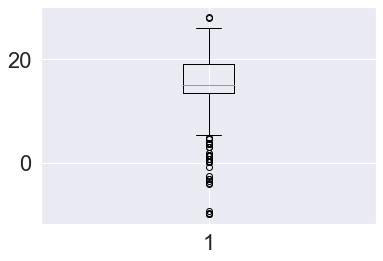

In [266]:
plt.boxplot(data_1.ave_temp.astype('float')-(data_1.altitude_mean_meters/100*0.6))

In [267]:
data_1['product_temp']=data_1.ave_temp.astype('float')-(data_1.altitude_mean_meters/100*0.6)

In [268]:
data_1

Species Country_of_Origin Harvest.Year Processing_Method     Aroma  \
0     Arabica          Ethiopia         2014      Washed / Wet  3.590729   
1     Arabica          Ethiopia         2014      Washed / Wet  3.854068   
2     Arabica          Ethiopia         2014     Natural / Dry  1.944862   
3     Arabica          Ethiopia         2014      Washed / Wet  2.208200   
4     Arabica            Brazil         2013     Natural / Dry  3.294473   
...       ...               ...          ...               ...       ...   
1161  Robusta            Uganda         2013      Washed / Wet  0.562333   
1162  Robusta             India         2014     Natural / Dry  0.298995   
1163  Robusta             India         2013     Natural / Dry  0.002738   
1164  Robusta     United States         2012     Natural / Dry  1.121928   
1165  Robusta     United States         2014     Natural / Dry -0.820195   

        Flavor  Aftertaste   Acidity      Body   Balance  ...  \
0     3.902339    3.698742  3.780848  3.449177  2.577149  ...   
1     3.422320    3.202078  3.250403  3.167771  2.577149  ...   
2     3.152310    2.968354  2.751160  3.449177  2.091945  ...   
3     2.912300    2.471691  3.000782  3.167771  2.320276  ...   
4     2.672291    2.968354  3.000782  2.569785  2.320276  ...   
...        ...         ...       ...       ...       ...  ...   
1161 -0.327826   -0.216135  0.130136  0.529596  0.179669  ...   
1162  0.422203    0.280529 -0.649931  0.213015 -0.048662  ...   
1163 -0.327826    0.046805  0.910203 -0.349796 -0.048662  ...   
1164 -0.087816    0.046805 -0.369107 -0.349796 -0.276994  ...   
1165 -0.597836   -0.683582 -0.369107 -0.068390 -0.990529  ...   

      altitude_mean_meters  Stability  Stability_log   base_zest  \
0                   2075.0   0.469450       0.558403  100.000000   
1                   2075.0  -0.017592       0.162818   95.783133   
2                   2000.0  -0.246252      -0.047774   88.146736   
3                   2075.0  -0.302494      -0.102499   87.302783   
4                   1175.0   0.038650       0.211932   89.403273   
...                    ...        ...            ...         ...   
1161                1200.0  -0.074401       0.112179   50.433603   
1162                 750.0   1.721493       1.351750   51.510659   
1163                 750.0   2.208535       1.601672   51.051674   
1164                3000.0   2.195343       1.595231   50.733953   
1165                 795.0   0.806029       0.798394   40.712887   

      beans_perfection  popularity  new_score  alt_level  ave_temp  \
0            26.390706   31.190524  83.693693          2      22.2   
1            19.987831   28.816371  79.267127          2      22.2   
2            20.381373   52.584814  75.097979          2      22.2   
3            19.474821   48.834199  74.038939          2      22.2   
4            24.195303   29.593394  75.039041          1     24.95   
...                ...         ...        ...        ...       ...   
1161         40.420621   41.345617  48.234698          1      22.8   
1162         72.125229   34.597685  53.520971          0     23.65   
1163         79.632493   30.809560  54.065396          0     23.65   
1164         79.739144   18.349200  52.955786          3      8.55   
1165         59.630693   43.119645  43.824310          0      8.55   

      product_temp  
0             9.75  
1             9.75  
2            10.20  
3             9.75  
4            17.90  
...            ...  
1161         15.60  
1162         19.15  
1163         19.15  
1164         -9.45  
1165          3.78  

[1166 rows x 29 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3c63b1550>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3c63b1c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3c63b11c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3c63bb310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3c63bb670>],
 'means': []}

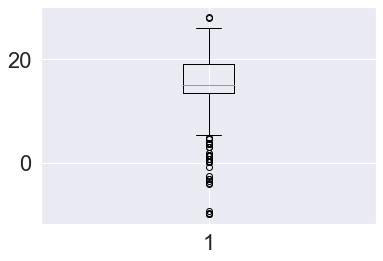

In [269]:
plt.boxplot(data_1.product_temp)

<ipython-input-270-f7d22d13c7c6>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0.0, 0, ''), Text(10.0, 0, ''), Text(20.0, 0, ''), Text(30.0, 0, '')]

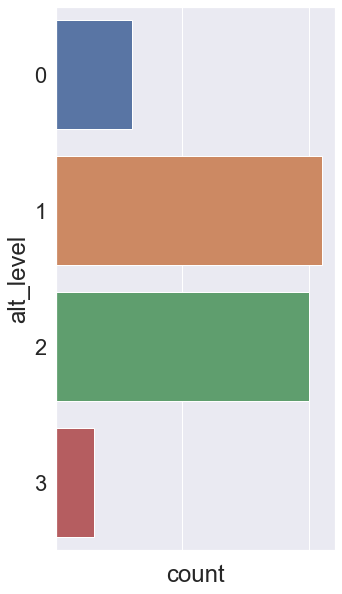

In [270]:
plt.figure(figsize=(5,10))
sns.set(font_scale=2)
ax=sns.countplot(y=data_1.sort_values(by='new_score',ascending=False).iloc[range(0,50),:]['alt_level'])
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)

In [271]:
data_1.ave_temp=data_1.ave_temp.astype('float')
data_1[['altitude_mean_meters','alt_level','ave_temp','product_temp','new_score']].corr()

altitude_mean_meters  alt_level  ave_temp  product_temp  \
altitude_mean_meters              1.000000   0.900793 -0.216950     -0.814074   
alt_level                         0.900793   1.000000 -0.163507     -0.714322   
ave_temp                         -0.216950  -0.163507  1.000000      0.743542   
product_temp                     -0.814074  -0.714322  0.743542      1.000000   
new_score                         0.172041   0.195831  0.072337     -0.074814   

                      new_score  
altitude_mean_meters   0.172041  
alt_level              0.195831  
ave_temp               0.072337  
product_temp          -0.074814  
new_score              1.000000

In [272]:
from statsmodels.formula.api import ols
model3 = ols('new_score ~ alt_level * product_temp * ave_temp',data=data_1).fit()

In [273]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_score   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     23.49
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           5.62e-30
Time:                        15:45:15   Log-Likelihood:                -4304.4
No. Observations:                1166   AIC:                             8625.
Df Residuals:                    1158   BIC:                             8665.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          66.0268      6.850      9.638      0.000      52.586      79.467
alt_level                          -6.0498      4.414     -1.371      0.171     -14.709       2.610
product_temp                       -4.1740      0.516     -8.095      0.000      -5.186      -3.162
alt_level:product_temp              0.8592      0.303      2.833      0.005       0.264       1.454
ave_temp                           -0.8076      0.365     -2.213      0.027      -1.524      -0.092
alt_level:ave_temp                  0.3632      0.208      1.746      0.081      -0.045       0.771
product_temp:ave_temp               0.1670      0.019      8.603      0.000       0.129       0.205
alt_level:product_temp:ave_temp    -0.0344      0.013     -2.597      0.010      -0.060      -0.008
==============================================================================
Omnibus:                       41.447   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.354
Skew:                          -0.226   Prob(JB):                     1.31e-18
Kurtosis:                       4.221   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
model4 = ols('base_zest ~ alt_level * ave_temp * product_temp',data=data_1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              base_zest   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     15.60
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.23e-19
Time:                        15:45:15   Log-Likelihood:                -4585.0
No. Observations:                1166   AIC:                             9186.
Df Residuals:                    1158   BIC:                             9227.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          66.3841      8.715      7.618      0.000      49.286      83.482
alt_level                          -5.8000      5.615     -1.033      0.302     -16.816       5.216
ave_temp                           -0.6315      0.464     -1.360      0.174      -1.542       0.279
alt_level:ave_temp                  0.3281      0.265      1.240      0.215      -0.191       0.847
product_temp                       -4.1139      0.656     -6.272      0.000      -5.401      -2.827
alt_level:product_temp              1.0051      0.386      2.606      0.009       0.248       1.762
ave_temp:product_temp               0.1562      0.025      6.325      0.000       0.108       0.205
alt_level:ave_temp:product_temp    -0.0378      0.017     -2.241      0.025      -0.071      -0.005
==============================================================================
Omnibus:                       41.416   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.685
Skew:                          -0.164   Prob(JB):                     2.75e-21
Kurtosis:                       4.357   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [275]:
model4_1 = ols('Cupper_points ~ alt_level * ave_temp * product_temp',data=data_1).fit()
model4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cupper_points   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.14
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           4.87e-15
Time:                        15:45:15   Log-Likelihood:                -628.55
No. Observations:                1166   AIC:                             1273.
Df Residuals:                    1158   BIC:                             1314.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           8.1059      0.293     27.682      0.000       7.531       8.680
alt_level                          -0.1485      0.189     -0.787      0.431      -0.519       0.222
ave_temp                           -0.0292      0.016     -1.873      0.061      -0.060       0.001
alt_level:ave_temp                  0.0106      0.009      1.194      0.233      -0.007       0.028
product_temp                       -0.1291      0.022     -5.856      0.000      -0.172      -0.086
alt_level:product_temp              0.0488      0.013      3.766      0.000       0.023       0.074
ave_temp:product_temp               0.0053      0.001      6.371      0.000       0.004       0.007
alt_level:ave_temp:product_temp    -0.0019      0.001     -3.437      0.001      -0.003      -0.001
==============================================================================
Omnibus:                      159.654   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1751.493
Skew:                           0.151   Prob(JB):                         0.00
Kurtosis:                       8.997   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

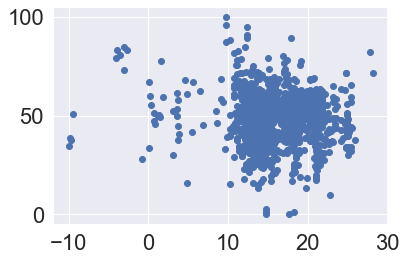

In [276]:
import matplotlib.pyplot as plt
plt.scatter(data_1.product_temp,(data.base_zest) )

In [277]:
model5 = ols('beans_perfection ~ alt_level * ave_temp * product_temp',data=data_1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       beans_perfection   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     30.07
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           2.36e-38
Time:                        15:45:16   Log-Likelihood:                -4860.3
No. Observations:                1166   AIC:                             9737.
Df Residuals:                    1158   BIC:                             9777.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          77.6999     11.036      7.041      0.000      56.048      99.352
alt_level                         -11.4679      7.110     -1.613      0.107     -25.418       2.482
ave_temp                           -1.8299      0.588     -3.113      0.002      -2.983      -0.676
alt_level:ave_temp                  0.6731      0.335      2.009      0.045       0.016       1.330
product_temp                       -6.4980      0.831     -7.823      0.000      -8.128      -4.868
alt_level:product_temp              0.3755      0.488      0.769      0.442      -0.583       1.334
ave_temp:product_temp               0.2899      0.031      9.272      0.000       0.229       0.351
alt_level:ave_temp:product_temp    -0.0256      0.021     -1.200      0.230      -0.068       0.016
==============================================================================
Omnibus:                       66.698   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.062
Skew:                           0.602   Prob(JB):                     1.85e-17
Kurtosis:                       3.372   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

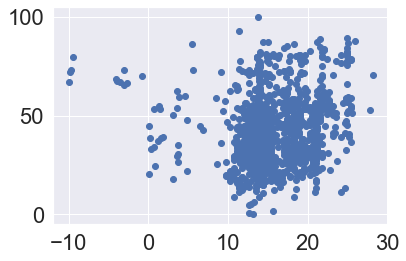

In [278]:
plt.scatter(data_1.product_temp,data_1.beans_perfection)

In [279]:
model6 = ols('popularity ~ alt_level * ave_temp * product_temp',data=data_1).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.778
Date:                Sun, 05 Jun 2022   Prob (F-statistic):             0.0879
Time:                        15:45:16   Log-Likelihood:                -4521.1
No. Observations:                1166   AIC:                             9058.
Df Residuals:                    1158   BIC:                             9099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          36.4237      8.250      4.415      0.000      20.237      52.610
alt_level                           3.1382      5.315      0.590      0.555      -7.290      13.567
ave_temp                           -0.4871      0.439     -1.108      0.268      -1.349       0.375
alt_level:ave_temp                  0.0657      0.250      0.262      0.793      -0.426       0.557
product_temp                        0.2825      0.621      0.455      0.649      -0.936       1.501
alt_level:product_temp              0.3255      0.365      0.891      0.373      -0.391       1.042
ave_temp:product_temp               0.0149      0.023      0.635      0.525      -0.031       0.061
alt_level:ave_temp:product_temp    -0.0169      0.016     -1.058      0.290      -0.048       0.014
==============================================================================
Omnibus:                       33.794   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.568
Skew:                           0.071   Prob(JB):                     1.43e-17
Kurtosis:                       4.255   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [280]:
print(MANOVA.from_formula('base_zest+beans_perfection+popularity~ Species + Country_of_Origin + Processing_Method',data=data).mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1812 3.0000 1125.0000 1694.0747 0.0000
         Pillai's trace 0.8188 3.0000 1125.0000 1694.0747 0.0000
 Hotelling-Lawley trace 4.5175 3.0000 1125.0000 1694.0747 0.0000
    Roy's greatest root 4.5175 3.0000 1125.0000 1694.0747 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Species         Value  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.9966 3.0000 1125.0000  1.2862 0.2777
           Pillai's trace 0.0034 3.0000 1125.

[Text(0, 0, 'Ethiopia'),
 Text(1, 0, 'Brazil'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'United States (Hawaii)'),
 Text(4, 0, 'Indonesia'),
 Text(5, 0, 'China'),
 Text(6, 0, 'Costa Rica'),
 Text(7, 0, 'Mexico'),
 Text(8, 0, 'Uganda'),
 Text(9, 0, 'Honduras'),
 Text(10, 0, 'Taiwan'),
 Text(11, 0, 'Tanzania, United Republic Of'),
 Text(12, 0, 'Kenya'),
 Text(13, 0, 'Thailand'),
 Text(14, 0, 'Colombia'),
 Text(15, 0, 'Panama'),
 Text(16, 0, 'Guatemala'),
 Text(17, 0, 'Papua New Guinea'),
 Text(18, 0, 'El Salvador'),
 Text(19, 0, 'Nicaragua'),
 Text(20, 0, 'Ecuador'),
 Text(21, 0, 'United States (Puerto Rico)'),
 Text(22, 0, 'Haiti'),
 Text(23, 0, 'Burundi'),
 Text(24, 0, 'Vietnam'),
 Text(25, 0, 'Philippines'),
 Text(26, 0, 'Rwanda'),
 Text(27, 0, 'Malawi'),
 Text(28, 0, 'Laos'),
 Text(29, 0, 'Zambia'),
 Text(30, 0, 'Myanmar'),
 Text(31, 0, 'Cote d?Ivoire'),
 Text(32, 0, 'Peru'),
 Text(33, 0, 'India')]

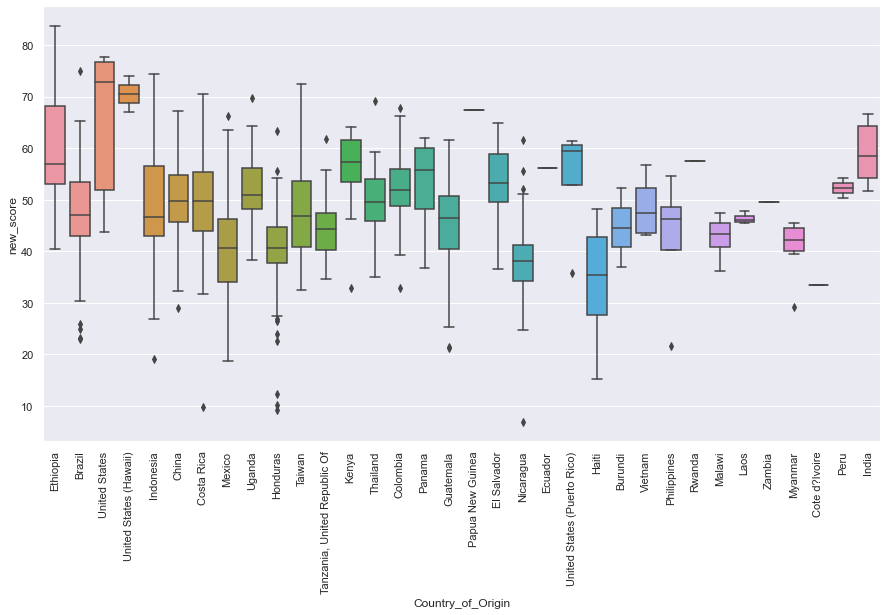

In [281]:
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.boxplot(y=data.new_score, x=data.Country_of_Origin)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

[Text(0, 0, 'Ethiopia'),
 Text(1, 0, 'Brazil'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'United States (Hawaii)'),
 Text(4, 0, 'Indonesia'),
 Text(5, 0, 'China'),
 Text(6, 0, 'Costa Rica'),
 Text(7, 0, 'Mexico'),
 Text(8, 0, 'Uganda'),
 Text(9, 0, 'Honduras'),
 Text(10, 0, 'Taiwan'),
 Text(11, 0, 'Tanzania, United Republic Of'),
 Text(12, 0, 'Kenya'),
 Text(13, 0, 'Thailand'),
 Text(14, 0, 'Colombia'),
 Text(15, 0, 'Panama'),
 Text(16, 0, 'Guatemala'),
 Text(17, 0, 'Papua New Guinea'),
 Text(18, 0, 'El Salvador'),
 Text(19, 0, 'Nicaragua'),
 Text(20, 0, 'Ecuador'),
 Text(21, 0, 'United States (Puerto Rico)'),
 Text(22, 0, 'Haiti'),
 Text(23, 0, 'Burundi'),
 Text(24, 0, 'Vietnam'),
 Text(25, 0, 'Philippines'),
 Text(26, 0, 'Rwanda'),
 Text(27, 0, 'Malawi'),
 Text(28, 0, 'Laos'),
 Text(29, 0, 'Zambia'),
 Text(30, 0, 'Myanmar'),
 Text(31, 0, 'Cote d?Ivoire'),
 Text(32, 0, 'Peru'),
 Text(33, 0, 'India')]

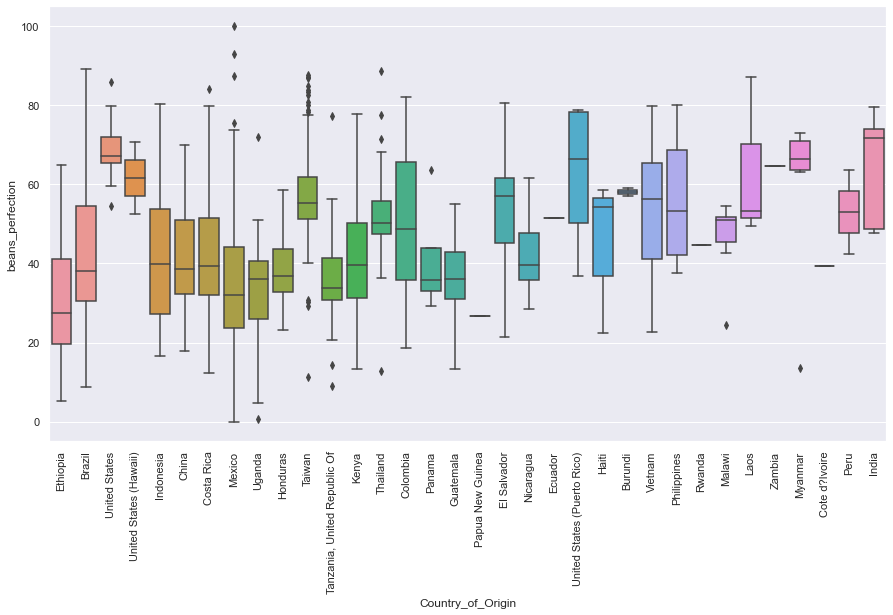

In [282]:
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.boxplot(y=data.beans_perfection, x=data.Country_of_Origin)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## 참고문헌 링크 정리
https://www.stokedroasters.com/blogs/news/coffee-guide-altitudes-affect-on-beans
https://www.baristainstitute.com/blog/jori-korhonen/january-2020/coffee-processing-methods-drying-washing-or-honey
https://www.researchgate.net/publication/228470404_Primary_coffee_processing_in_Ethiopia_patterns_constrains_and_determinants
https://www.newfoodmagazine.com/article/28006/process-coffee-production-seed-cup/
https://ko.wikipedia.org/wiki/%EC%97%B0%EA%B0%84_%ED%8F%89%EA%B7%A0_%EA%B8%B0%EC%98%A8%EC%97%90_%EB%94%B0%EB%A5%B8_%EB%82%98%EB%9D%BC_%EB%AA%A9%EB%A1%9D
https://www.boomtowncoffee.com/stories/what-is-cupping
http://www.coffeebins.co.kr/bbs/content.php?co_id=beans03
https://perfectdailygrind.com/2015/12/how-does-altitude-affect-coffees-flavour-profile-2-must-see-videos/
https://www.chosun.com/site/data/html_dir/2009/12/31/2009123102654.html
https://www.coffeemagazine.co.za/blog/9/6129/coffee-basics-what-is-a-quaker
